In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

# Make sure that we're in the root directory of the project
# We can check it by verifying the existence of the `src` directory below
while "src" not in os.listdir():
    os.chdir("..")

# Set the style of the plots
markers = ["o", "s", "D", "v", "p", "P", "X", "h", "H", "d"]
colors_discrete = sns.color_palette("tab10")
colors_continuous = sns.color_palette("viridis")
linestyles = ["-", "--", "-.", ":", "-", "--", "-.", ":"]

# Do not hide any columns
pd.set_option("display.max_columns", None)
sns.set_theme(style="whitegrid", font_scale=1)

In [ ]:
results_path = "kdd/01_12"

betarob_results_path = f"{results_path}/betarce/betarce.feather"
robx_results_path = f"{results_path}/robx/robx.feather"
just_base_results_path = f"{results_path}/just_base/just_base.feather"
k_sweep_results_path = f"{results_path}/ksweep/ksweep.feather"
betarob_params_results_path = f"{results_path}/brce_params/brce_params.feather"
images_dir = f"{results_path}/images"
os.makedirs(images_dir, exist_ok=True)

In [ ]:
# import yaml


# def process_results(directiory: str):
#     results_list = []

#     # When .yaml file is found, load all .csv files in {path}/results/
#     if os.path.isfile(f"{directiory}/config.yml"):
#         with open(f"{directiory}/config.yml") as file:
#             try:
#                 config = yaml.load(file, Loader=yaml.FullLoader)
#             except Exception as e:
#                 print(f"Error loading config file in {directiory}")
#                 print(e)
#                 return []

#         # Load all .csv files in {path}/results/
#         for file in os.listdir(f"{directiory}/results"):
#             if file.endswith(".csv"):
#                 try:
#                     df = pd.read_csv(f"{directiory}/results/{file}")
#                     df["config"] = config
#                     df["robust_cf_method"] = config["experiments_setup"][
#                         "robust_cf_method"
#                     ]
#                     results_list.append(df)
#                 except Exception as e:
#                     print(f"Error loading {file} in {directiory}")
#                     print(e)

#     # Else recursively call process_results on all subdirectories
#     else:
#         if os.path.isdir(directiory):
#             for subdirectory in os.listdir(directiory):
#                 results_list += process_results(f"{directiory}/{subdirectory}")
#         else:
#             print(f"No config file found in {directiory}")

#     return results_list


# def get_results_df(results_list):
#     results_df = pd.concat(results_list)
#     results_df = results_df.reset_index(drop=True)
#     return results_df

In [ ]:
# betarce_df = pd.concat(process_results(betarob_results_path)).reset_index(drop=True)
# betarce_df['base_cf_method'].value_counts()
# SAVE_SPOT = 'kdd/01_12/betarce'
# os.makedirs(SAVE_SPOT, exist_ok=True)
# betarce_df.to_feather(f'{SAVE_SPOT}/betarce.feather')

# just_base_df = pd.concat(process_results(just_base_results_path)).reset_index(drop=True)
# just_base_df['base_cf_method'].value_counts(dropna=False)
# SAVE_SPOT = 'kdd/01_12/just_base'
# os.makedirs(SAVE_SPOT, exist_ok=True)
# just_base_df.to_feather(f'{SAVE_SPOT}/just_base.feather')

# robx_df = pd.concat(process_results(robx_results_path)).reset_index(drop=True)
# robx_df['base_cf_method'].value_counts()
# SAVE_SPOT = 'kdd/01_12/robx'
# os.makedirs(SAVE_SPOT, exist_ok=True)
# robx_df.to_feather(f'{SAVE_SPOT}/robx.feather')

# ksweep_df = pd.concat(process_results(k_sweep_results_path)).reset_index(drop=True)
# ksweep_df['base_cf_method'].value_counts()
# SAVE_SPOT = 'kdd/01_12/ksweep'
# os.makedirs(SAVE_SPOT, exist_ok=True)
# ksweep_df.to_feather(f'{SAVE_SPOT}/ksweep.feather')

# brce_params_df = pd.concat(process_results(betarob_params_results_path)).reset_index(drop=True)
# brce_params_df['base_cf_method'].value_counts()
# SAVE_SPOT = 'kdd/01_12/brce_params'
# os.makedirs(SAVE_SPOT, exist_ok=True)
# brce_params_df.to_feather(f'{SAVE_SPOT}/brce_params.feather')



In [7]:
betarce_df = pd.read_feather(betarob_results_path)
betarce_df["this_is_generalization"] = (
    betarce_df["experiment_generalization_type"] != betarce_df["experiment_type"]
)
# raw_df['generalization_type'][raw_df['this_is_generalization'] == False] = 'Original'
betarce_df["generalization_type"] = betarce_df[
    ["this_is_generalization", "experiment_generalization_type"]
].apply(lambda x: "g_" + x[1] if x[0] else "Original", axis=1)
g_c = betarce_df["this_is_generalization"].value_counts(dropna=False)
d_c = betarce_df["delta_robustness"].value_counts()

print(g_c)
print(d_c)

True     224931
False    171008
Name: this_is_generalization, dtype: int64
0.8    198224
0.9    197715
Name: delta_robustness, dtype: int64


In [ ]:
ksweep_df = pd.read_feather(k_sweep_results_path)
robx_df = pd.read_feather(robx_results_path)
just_base_df = pd.read_feather(just_base_results_path)
brce_params_df = pd.read_feather(betarob_params_results_path)

# Print counts =
print(f"betarce_df: {betarce_df.shape[0]}")
print(f"ksweep_df: {ksweep_df.shape[0]}")
print(f"robx_df: {robx_df.shape[0]}")
print(f"just_base_df: {just_base_df.shape[0]}")
print(f"brce_params_df: {brce_params_df.shape[0]}")

betarce_df: 395939
ksweep_df: 238106
robx_df: 907200
just_base_df: 2559600
brce_params_df: 898423


<html>
<p style="background-color: red; text-align: center;"><b>Generalization</b></p>
</html>

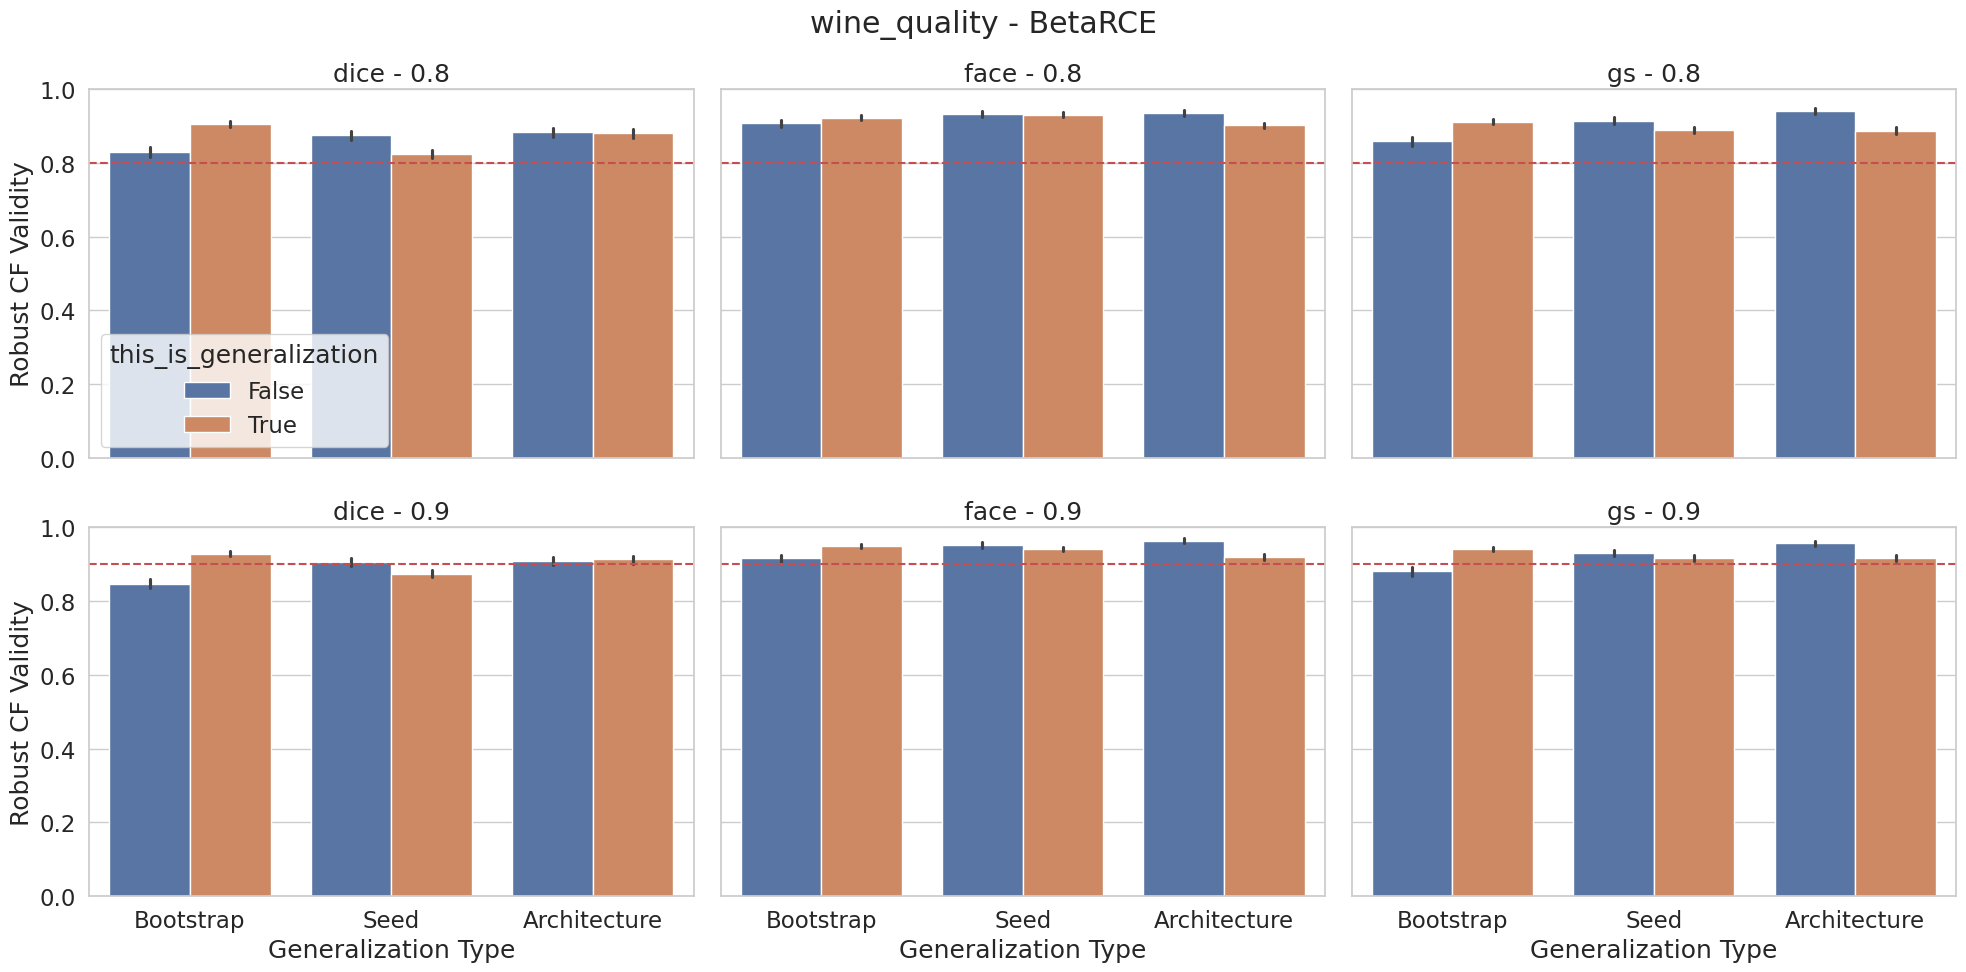

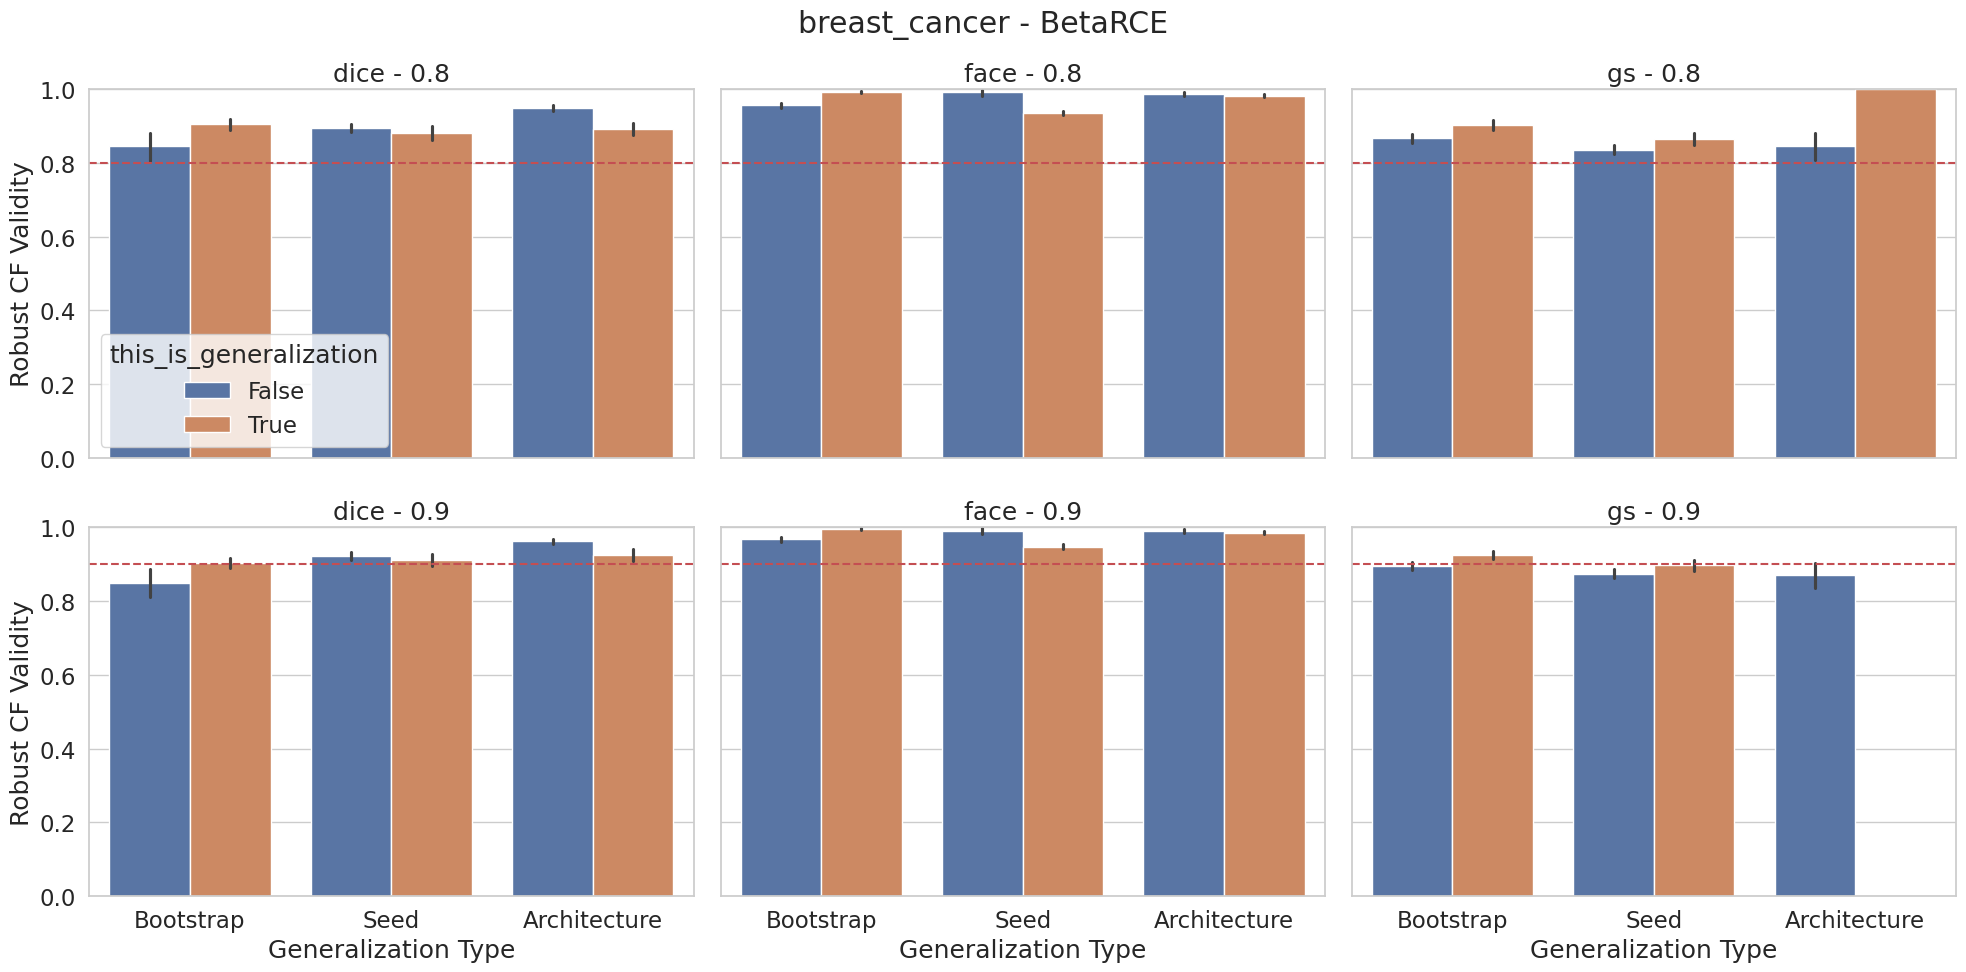

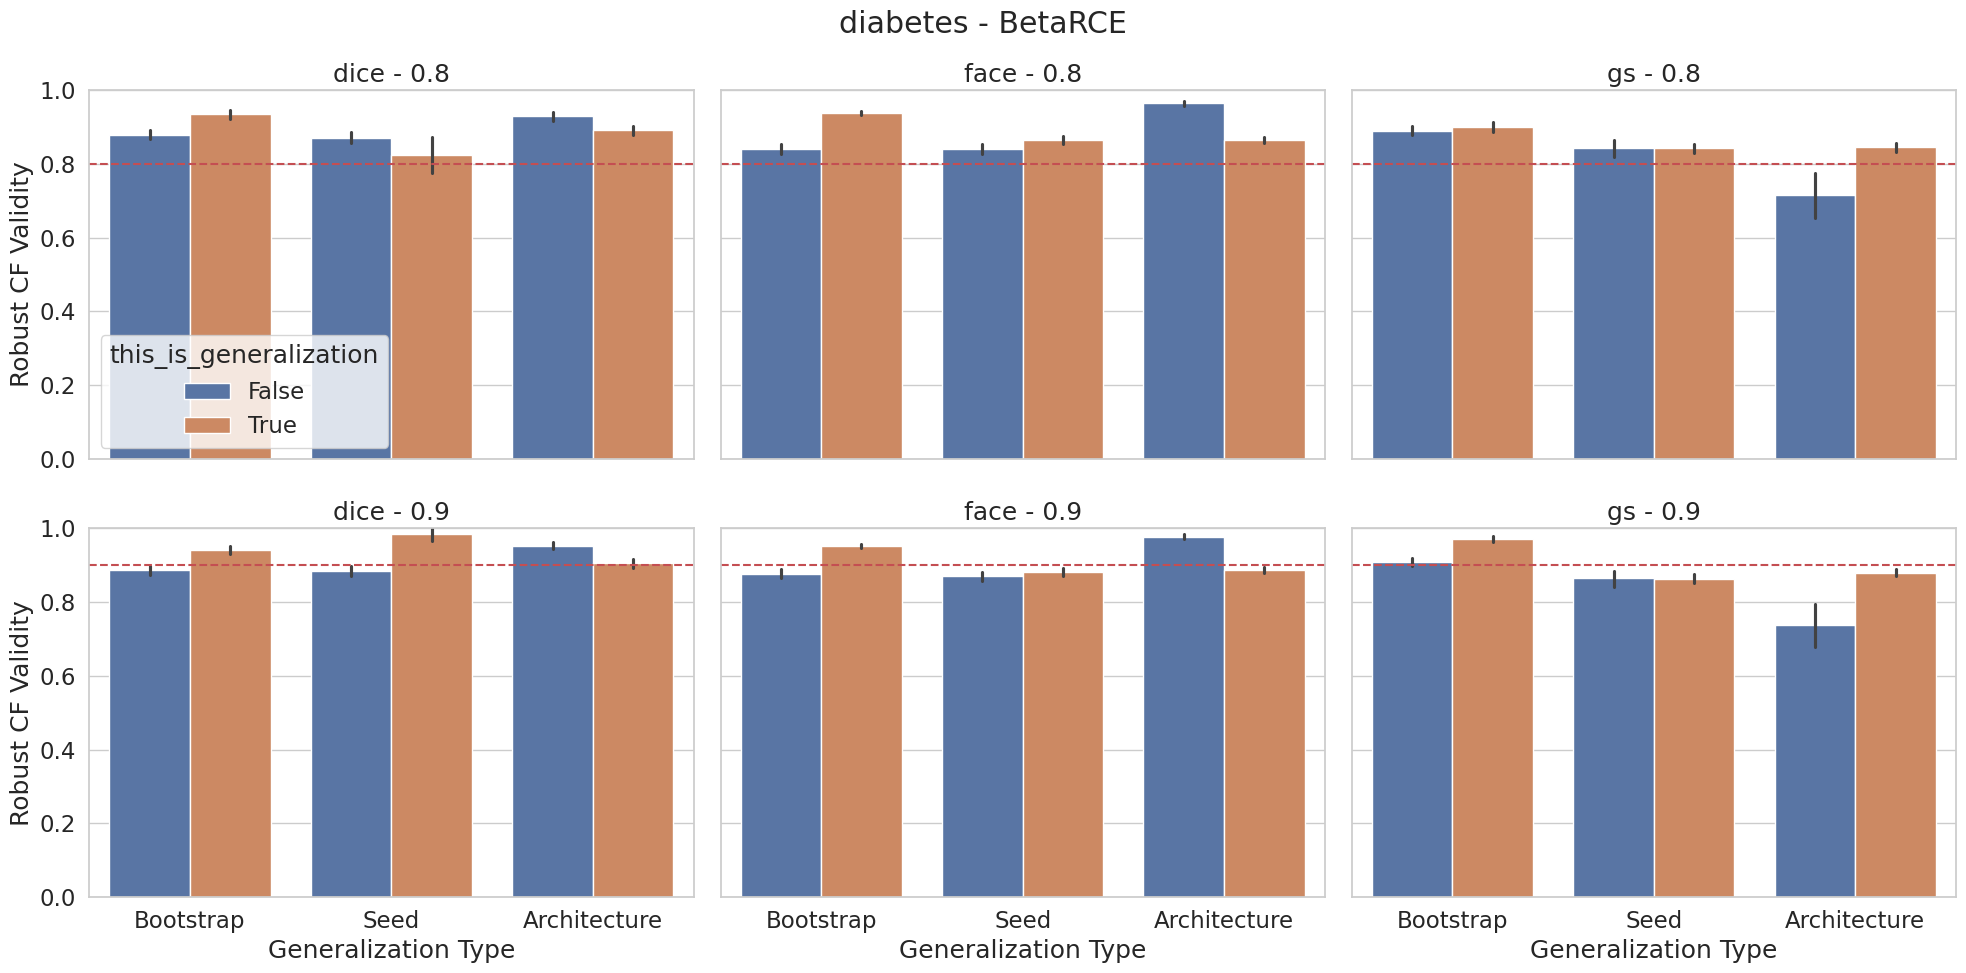

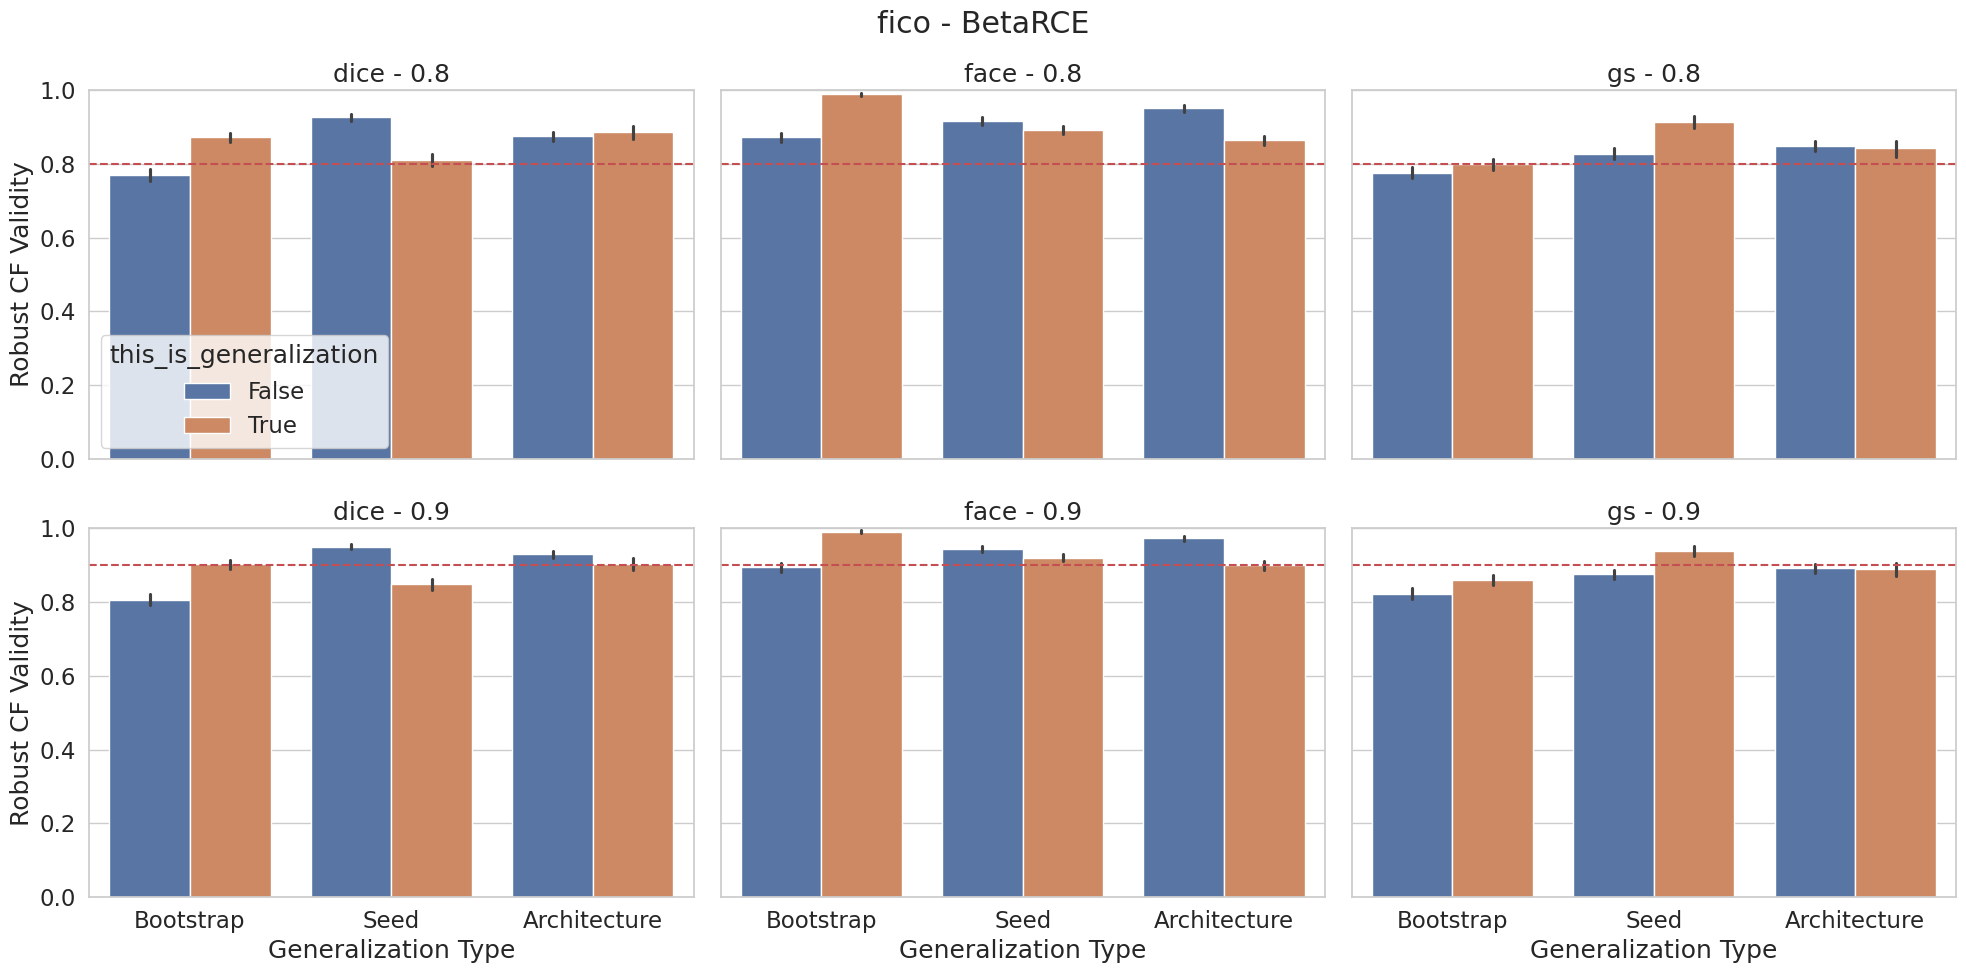

In [ ]:
generalization_subdir = "generalization"
just_save = True
os.makedirs(f"{images_dir}/{generalization_subdir}", exist_ok=True)

agg_by = [
    "experiment_type",
    "experiment_generalization_type",
    "this_is_generalization",
    "base_cf_method",
    "delta_robustness",
]
agg_df = (
    betarce_df.groupby(agg_by)
    .agg(
        n=("robust_counterfactual_validity_model2", "count"),
        mean_robust_cf_validity=("robust_counterfactual_validity_model2", "mean"),
        std_robust_cf_validity=("robust_counterfactual_validity_model2", "std"),
        mean_base_cf_validity=("base_counterfactual_validity_model2", "mean"),
        std_base_cf_validity=("base_counterfactual_validity_model2", "std"),
    )
    .reset_index()
)

sns.set_theme(style="whitegrid", font_scale=1.5)

cols = sorted(betarce_df["base_cf_method"].unique())
rows = sorted(betarce_df["delta_robustness"].unique())
x = "experiment_type"
markers = "this_is_generalization"
y = "robust_counterfactual_validity_model2"
hue = "this_is_generalization"


for dataset in betarce_df["dataset_name"].unique():
    dataset_filtered_df = betarce_df[betarce_df["dataset_name"] == dataset]

    fig, ax = plt.subplots(
        len(rows), len(cols), figsize=(20, 10), sharex=True, sharey=True
    )

    for i, row in enumerate(rows):
        for j, col in enumerate(cols):
            df = dataset_filtered_df[
                (dataset_filtered_df["base_cf_method"] == col)
                & (dataset_filtered_df["delta_robustness"] == row)
            ]
            sns.barplot(
                data=df,
                x=x,
                y=y,
                hue=hue,
                ax=ax[i, j],
                legend=True if i == 0 and j == 0 else False,
            )

            # Draw a horizontal line at delta_robustness
            ax[i, j].axhline(row, color="r", linestyle="--")

            ax[i, j].set_title(f"{col} - {row}")
            ax[i, j].set_ylim(0, 1)
            ax[i, j].set_ylabel("Robust CF Validity")
            ax[i, j].set_xlabel("Generalization Type")

    plt.suptitle(f"{dataset} - BetaRCE")
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.savefig(
        f"{images_dir}/{generalization_subdir}/{dataset}_betarce.png",
        dpi=300,
        bbox_inches="tight",
    )
    if not just_save:
        plt.show()

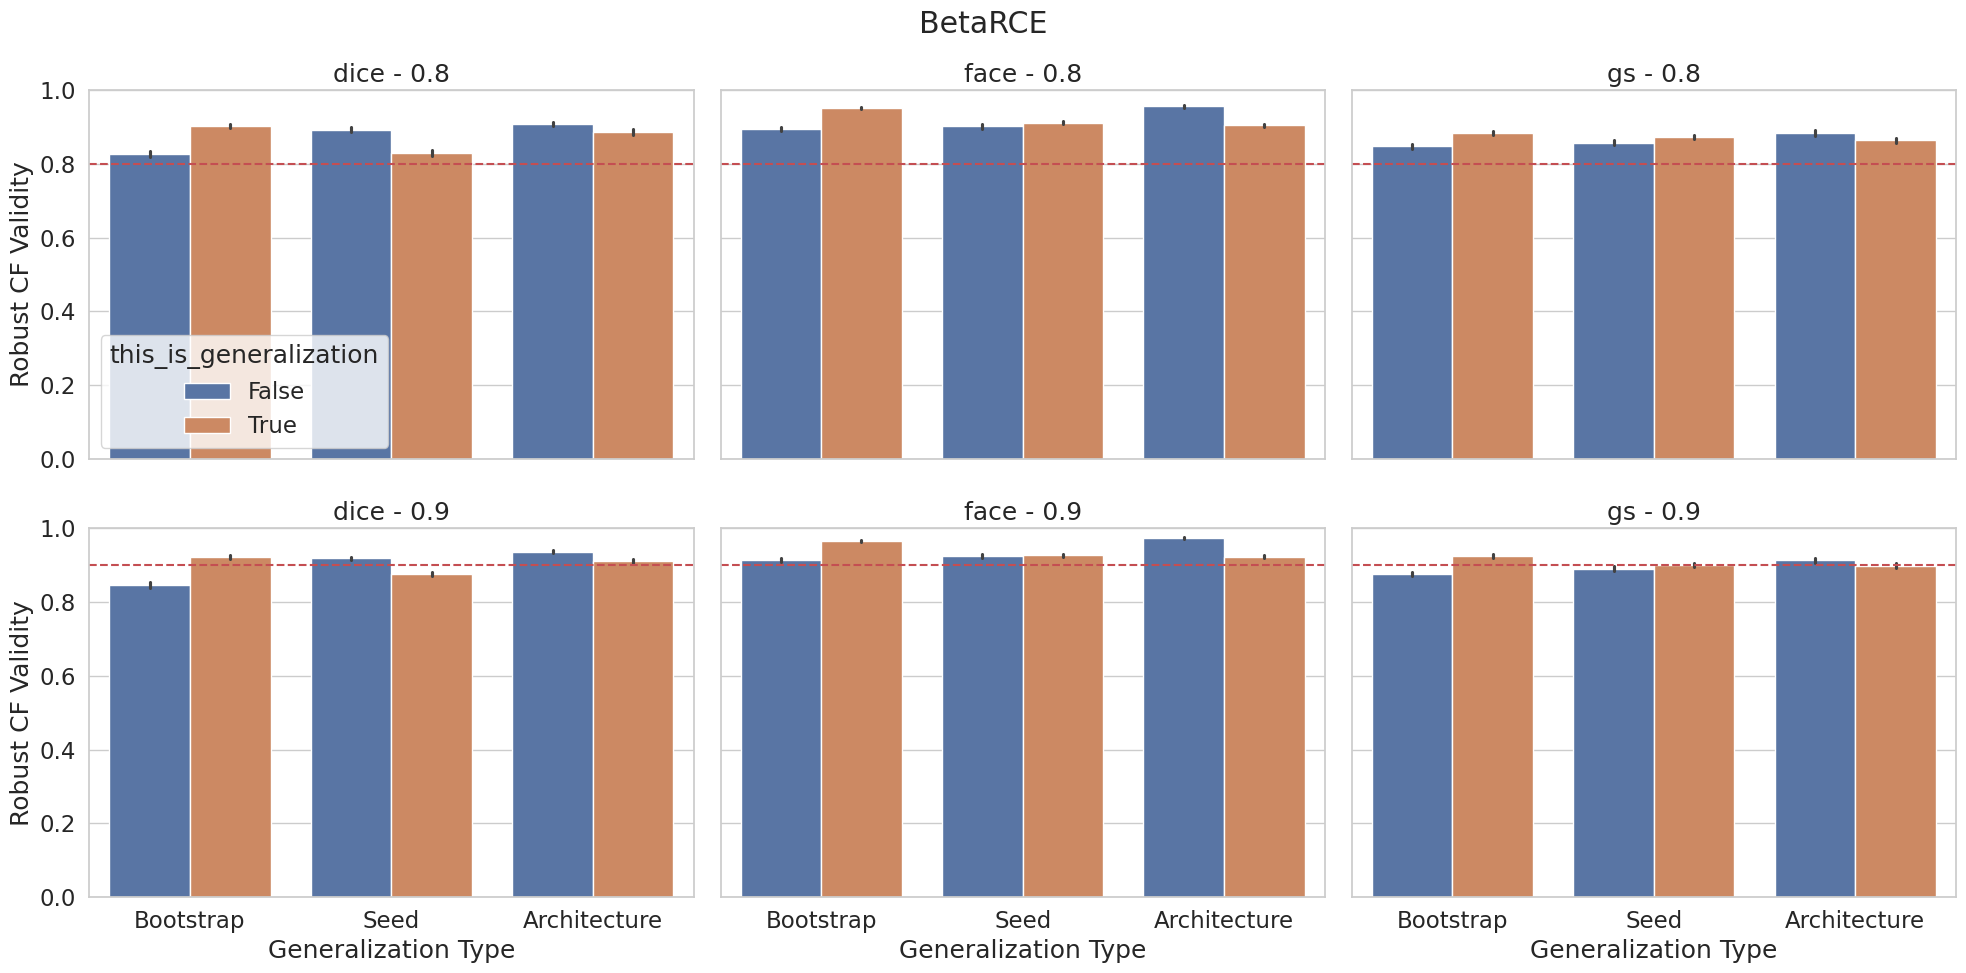

In [ ]:
agg_by = [
    "experiment_type",
    "experiment_generalization_type",
    "this_is_generalization",
    "base_cf_method",
    "delta_robustness",
]
agg_df = (
    betarce_df.groupby(agg_by)
    .agg(
        n=("robust_counterfactual_validity_model2", "count"),
        mean_robust_cf_validity=("robust_counterfactual_validity_model2", "mean"),
        std_robust_cf_validity=("robust_counterfactual_validity_model2", "std"),
        mean_base_cf_validity=("base_counterfactual_validity_model2", "mean"),
        std_base_cf_validity=("base_counterfactual_validity_model2", "std"),
    )
    .reset_index()
)

sns.set_theme(style="whitegrid", font_scale=1.5)

cols = sorted(betarce_df["base_cf_method"].unique())
rows = sorted(betarce_df["delta_robustness"].unique())
x = "experiment_type"
markers = "this_is_generalization"
y = "robust_counterfactual_validity_model2"
hue = "this_is_generalization"

fig, ax = plt.subplots(len(rows), len(cols), figsize=(20, 10), sharex=True, sharey=True)

for i, row in enumerate(rows):
    for j, col in enumerate(cols):
        df = betarce_df[
            (betarce_df["base_cf_method"] == col)
            & (betarce_df["delta_robustness"] == row)
        ]
        sns.barplot(
            data=df,
            x=x,
            y=y,
            hue=hue,
            ax=ax[i, j],
            legend=True if i == 0 and j == 0 else False,
        )

        # Draw a horizontal line at delta_robustness
        ax[i, j].axhline(row, color="r", linestyle="--")

        ax[i, j].set_title(f"{col} - {row}")
        ax[i, j].set_ylim(0, 1)
        ax[i, j].set_ylabel("Robust CF Validity")
        ax[i, j].set_xlabel("Generalization Type")

plt.suptitle("BetaRCE")
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig(
    f"{images_dir}/{generalization_subdir}/betarce.png", dpi=300, bbox_inches="tight"
)
plt.show()

In [18]:
agg_df = agg_df.rename(
    columns={
        "experiment_type": "Original",
        "experiment_generalization_type": "Generalization",
    }
)

In [ ]:
_agg_df = agg_df[agg_df["delta_robustness"] == 0.9]

for base_method in _agg_df["base_cf_method"].unique():
    __agg_df = _agg_df[_agg_df["base_cf_method"] == base_method]
    __agg_df = __agg_df[
        [
            "Original",
            "Generalization",
            "mean_robust_cf_validity",
            "std_robust_cf_validity",
            "n",
        ]
    ]

    print(__agg_df)

    means = __agg_df.pivot(
        index="Original", columns="Generalization", values="mean_robust_cf_validity"
    ).round(3)
    stds = __agg_df.pivot(
        index="Original", columns="Generalization", values="std_robust_cf_validity"
    ).round(3)
    cis = (1.96 * stds / np.sqrt(__agg_df["n"].values[0])).round(3)

    # Join them so each cell is mean \pm std
    means = means.astype(str)
    cis = cis.astype(str)
    generalization_results: pd.DataFrame = means + " ± " + cis

    # Convert to LaTeX
    generalization_results = generalization_results.to_latex(
        escape=False,
        column_format="l" + "c" * generalization_results.shape[1],
        caption=f"Generalization analysis aggregated over all datasets for $\delta = 0.9$ and {base_method} as the base CFE generation method.",
        label=f"app:tab:generalization-{base_method}",
        bold_rows=True,
    )
    print(generalization_results)
    # Save to file
    with open(
        f"{images_dir}/{generalization_subdir}/generalization_results_{base_method}.tex",
        "w",
    ) as file:
        file.write(generalization_results)

        Original Generalization  mean_robust_cf_validity  \
1   Architecture   Architecture                 0.936566   
7   Architecture      Bootstrap                 0.874545   
13  Architecture           Seed                 0.929973   
19     Bootstrap   Architecture                 0.927333   
25     Bootstrap      Bootstrap                 0.846809   
31     Bootstrap           Seed                 0.913015   
37          Seed   Architecture                 0.928824   
43          Seed      Bootstrap                 0.804537   
49          Seed           Seed                 0.918056   

    std_robust_cf_validity      n  
1                 0.243755   9900  
7                 0.331301   2471  
13                0.255219   4841  
19                0.259610   6000  
25                0.360193   8460  
31                0.281844   4541  
37                0.257145   5100  
43                0.396609   3791  
49                0.274294  10080  
\begin{table}
\centering
\caption{Gener

/tmp/ipykernel_15298/182413571.py:31: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  generalization_results = generalization_results.to_latex(
/tmp/ipykernel_15298/182413571.py:31: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  generalization_results = generalization_results.to_latex(
/tmp/ipykernel_15298/182413571.py:31: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The

<html>
<p style="background-color: red; text-align: center;"><b>Basic tables</b></p>
</html>

In [20]:
just_base_df[["base_cf_method", "dataset_name"]].value_counts().sort_index()

# Pivot table
agg_by = ["dataset_name", "base_cf_method"]
agg_df = (
    just_base_df.groupby(agg_by)
    .agg(
        n=("base_counterfactual_validity_model2", "count"),
        validity=("base_counterfactual_validity", "mean"),
        validity_std=("base_counterfactual_validity", "std"),
        robustness=("base_counterfactual_validity_model2", "mean"),
        robustness_std=("base_counterfactual_validity_model2", "std"),
        proximityL1=("base_counterfactual_proximityL1", "mean"),
        proximityL1_std=("base_counterfactual_proximityL1", "std"),
    )
    .reset_index()
)
agg_df.round(2)

dataset_name base_cf_method       n  validity  validity_std  robustness  \
0   breast_cancer           dice  218700      1.00          0.00        0.55   
1   breast_cancer           face   40500      1.00          0.00        0.90   
2   breast_cancer             gs    8100      1.00          0.00        0.52   
3   breast_cancer            rbr  218700      0.39          0.49        0.36   
4   breast_cancer           roar  145800      0.39          0.49        0.38   
5        diabetes           dice  216900      1.00          0.00        0.77   
6        diabetes           face   40260      1.00          0.00        0.76   
7        diabetes             gs    7200      1.00          0.00        0.64   
8        diabetes            rbr  212400      0.62          0.49        0.59   
9        diabetes           roar  145800      0.34          0.48        0.35   
10           fico           dice  218700      1.00          0.00        0.58   
11           fico           face   48600      1.00          0.00        0.75   
12           fico             gs    8100      1.00          0.00        0.52   
13           fico            rbr  218700      0.80          0.40        0.69   
14           fico           roar  145800      0.38          0.49        0.36   
15   wine_quality           dice  218700      1.00          0.00        0.75   
16   wine_quality           face   48390      1.00          0.00        0.77   
17   wine_quality             gs    8100      1.00          0.00        0.53   
18   wine_quality            rbr  218700      0.76          0.43        0.75   
19   wine_quality           roar  145800      0.77          0.42        0.74   

    robustness_std  proximityL1  proximityL1_std  
0             0.50         1.62             0.93  
1             0.30         3.43             1.41  
2             0.50         3.09             1.92  
3             0.48         2.65             1.28  
4             0.49         9.27             9.79  
5             0.42         0.87             0.40  
6             0.43         0.85             0.32  
7             0.48         0.60             0.42  
8             0.49         0.72             0.30  
9             0.48         5.53             6.31  
10            0.49         1.24             0.74  
11            0.43         2.23             0.66  
12            0.50         1.95             1.38  
13            0.46         1.66             0.69  
14            0.48         9.13             9.90  
15            0.43         0.67             0.40  
16            0.42         0.53             0.24  
17            0.50         0.29             0.23  
18            0.43         0.51             0.21  
19            0.44         8.39             7.91

In [21]:
robust_params_map = {
    "robx": ["beta_confidence", "delta_robustness"],
    "betarob": ["beta_confidence", "delta_robustness"],
}
base_params_map = {
    "dice": ["proximity_weight", "diversity_weight", "sparsity_weight"],
    "face": ["mode", "fraction"],
    "roar": ["delta_max", "lr", "norm"],
    "rbr": ["perturb_radius", "delta_plus", "sigma"],
    "gs": ["max_iter", "n_search_samples", "p_norm", "step", "target_proba"],
}

just_base_df["sigma"].value_counts(dropna=False)

NaN    1684800
0.5     291600
1.5     291600
1.0     291600
Name: sigma, dtype: int64

In [22]:
just_base_df["base_cf_hp_name"] = [None] * len(just_base_df)

for base_method, params in base_params_map.items():
    for row in just_base_df.itertuples():
        if row.base_cf_method == base_method:
            hp_name = base_method + "-".join(
                [f"{param}={getattr(row, param)}" for param in params]
            )
            just_base_df.at[row.Index, "base_cf_hp_name"] = hp_name

just_base_df["base_cf_hp_name"].value_counts(dropna=False)

just_base_df[["base_cf_hp_name", "dataset_name"]].value_counts().sort_index()

base_cf_hp_name                                                       dataset_name 
diceproximity_weight=0.05-diversity_weight=0.05-sparsity_weight=0.05  breast_cancer    8100
                                                                      diabetes         8100
                                                                      fico             8100
                                                                      wine_quality     8100
diceproximity_weight=0.05-diversity_weight=0.05-sparsity_weight=0.1   breast_cancer    8100
                                                                                       ... 
roardelta_max=0.1-lr=0.1-norm=1.0                                     wine_quality     8100
roardelta_max=0.1-lr=0.1-norm=2.0                                     breast_cancer    8100
                                                                      diabetes         8100
                                                                      fico             8

In [24]:
# Pivot table
agg_by = ["dataset_name", "base_cf_method", "base_cf_hp_name"]
base_agg_df = (
    just_base_df.groupby(agg_by)
    .agg(
        n=("base_counterfactual_validity_model2", "count"),
        vailidity=("base_counterfactual_validity", "mean"),
        validity_std=("base_counterfactual_validity", "std"),
        robustness=("base_counterfactual_validity_model2", "mean"),
        robustness_std=("base_counterfactual_validity_model2", "std"),
        proximityL1=("base_counterfactual_proximityL1", "mean"),
        proximityL1_std=("base_counterfactual_proximityL1", "std"),
        proximityL2=("base_counterfactual_proximityL2", "mean"),
        proximityL2_std=("base_counterfactual_proximityL2", "std"),
        plausibility=("base_counterfactual_plausibility", "mean"),
        plausibility_std=("base_counterfactual_plausibility", "std"),
        dpow=("base_counterfactual_discriminative_power", "mean"),
        dpow_std=("base_counterfactual_discriminative_power", "std"),
    )
    .reset_index()
)

# Select top 1 mean_base_cf_validity out base_cf_method
base_agg_df = (
    base_agg_df.sort_values("robustness", ascending=False)
    .groupby(["dataset_name", "base_cf_method"])
    .head(1)
    .sort_values("dataset_name")
)

base_agg_df.round(2).head(3)

dataset_name base_cf_method  \
29  breast_cancer           face   
33  breast_cancer             gs   
4   breast_cancer           dice   

                                      base_cf_hp_name     n  vailidity  \
29                      facemode=epsilon-fraction=0.5  8100        1.0   
33  gsmax_iter=100.0-n_search_samples=100.0-p_norm...  8100        1.0   
4   diceproximity_weight=0.05-diversity_weight=0.1...  8100        1.0   

    validity_std  robustness  robustness_std  proximityL1  proximityL1_std  \
29           0.0        0.91            0.28         3.29             1.36   
33           0.0        0.52            0.50         3.09             1.92   
4            0.0        0.55            0.50         1.63             0.93   

    proximityL2  proximityL2_std  plausibility  plausibility_std  dpow  \
29         0.75             0.31          0.42              0.13  0.63   
33         0.70             0.43          0.85              0.37  0.23   
4          1.02             0.34          1.06              0.31  0.24   

    dpow_std  
29      0.22  
33      0.22  
4       0.25

In [25]:
betarce_df["robust_cf_hp_name"] = [None] * len(betarce_df)

for robust_cf_method, params in robust_params_map.items():
    for row in betarce_df.itertuples():
        if row.robust_cf_method == robust_cf_method:
            hp_name = robust_cf_method + "-".join(
                [f"{param}={getattr(row, param)}" for param in params]
            )
            betarce_df.at[row.Index, "robust_cf_hp_name"] = hp_name

betarce_df["robust_cf_hp_name"].value_counts(dropna=False)

betarce_df[["robust_cf_hp_name", "dataset_name"]].value_counts().sort_index()

robust_cf_hp_name                                dataset_name 
betarobbeta_confidence=0.9-delta_robustness=0.8  breast_cancer    37628
                                                 diabetes         49367
                                                 fico             43325
                                                 wine_quality     67904
betarobbeta_confidence=0.9-delta_robustness=0.9  breast_cancer    37484
                                                 diabetes         49244
                                                 fico             43184
                                                 wine_quality     67803
dtype: int64

In [26]:
# Pivot table
robust_agg_by = [
    "dataset_name",
    "base_cf_method",
    "experiment_type",
    "experiment_generalization_type",
    "robust_cf_method",
    "robust_cf_hp_name",
    "delta_robustness",
    "beta_confidence",
]
robust_agg_df = (
    betarce_df.groupby(robust_agg_by)
    .agg(
        n=("base_counterfactual_validity_model2", "count"),
        vailidity=("base_counterfactual_validity", "mean"),
        validity_std=("base_counterfactual_validity", "std"),
        robustness=("robust_counterfactual_validity_model2", "mean"),
        robustness_std=("robust_counterfactual_validity_model2", "std"),
        lower_bound_beta=("lower_bound_beta", "mean"),
        lower_bound_beta_std=("lower_bound_beta", "std"),
        upper_bound_beta=("upper_bound_beta", "mean"),
        upper_bound_beta_std=("upper_bound_beta", "std"),
        proximityL1=("robust_counterfactual_proximityL1", "mean"),
        proximityL1_std=("robust_counterfactual_proximityL1", "std"),
        proximityL2=("robust_counterfactual_proximityL2", "mean"),
        proximityL2_std=("robust_counterfactual_proximityL2", "std"),
        plausibility=("robust_counterfactual_plausibility", "mean"),
        plausibility_std=("robust_counterfactual_plausibility", "std"),
        dpow=("robust_counterfactual_discriminative_power", "mean"),
        dpow_std=("robust_counterfactual_discriminative_power", "std"),
    )
    .reset_index()
)

# Select top 1
robust_agg_df = (
    robust_agg_df.sort_values("robustness", ascending=False)
    .groupby(["dataset_name", "base_cf_method", "robust_cf_method"])
    .head(1000000)
    .sort_values("dataset_name")
)
robust_agg_df.round(2).head()

dataset_name base_cf_method experiment_type  \
38  breast_cancer             gs    Architecture   
45  breast_cancer             gs       Bootstrap   
0   breast_cancer           dice    Architecture   
49  breast_cancer             gs            Seed   
44  breast_cancer             gs       Bootstrap   

   experiment_generalization_type robust_cf_method  \
38                           Seed          betarob   
45                           Seed          betarob   
0                    Architecture          betarob   
49                      Bootstrap          betarob   
44                           Seed          betarob   

                                  robust_cf_hp_name  delta_robustness  \
38  betarobbeta_confidence=0.9-delta_robustness=0.8               0.8   
45  betarobbeta_confidence=0.9-delta_robustness=0.9               0.9   
0   betarobbeta_confidence=0.9-delta_robustness=0.8               0.8   
49  betarobbeta_confidence=0.9-delta_robustness=0.9               0.9   
44  betarobbeta_confidence=0.9-delta_robustness=0.8               0.8   

    beta_confidence     n  vailidity  validity_std  robustness  \
38              0.9    60        1.0           0.0        1.00   
45              0.9   900        1.0           0.0        0.95   
0               0.9  2700        1.0           0.0        0.95   
49              0.9   750        1.0           0.0        0.94   
44              0.9   900        1.0           0.0        0.93   

    robustness_std  lower_bound_beta  lower_bound_beta_std  upper_bound_beta  \
38            0.00              0.80                  0.00              0.97   
45            0.22              0.91                  0.03              1.00   
0             0.22              0.85                  0.05              0.98   
49            0.24              0.92                  0.03              1.00   
44            0.25              0.85                  0.06              0.98   

    upper_bound_beta_std  proximityL1  proximityL1_std  proximityL2  \
38                  0.00        36.22             5.75         8.13   
45                  0.00         3.60             2.23         0.81   
0                   0.01         3.85             2.53         1.18   
49                  0.00         3.69             2.00         0.84   
44                  0.01         3.48             2.18         0.78   

    proximityL2_std  plausibility  plausibility_std  dpow  dpow_std  
38             1.30          7.70              1.31  0.98      0.06  
45             0.49          0.87              0.44  0.34      0.28  
0              0.54          1.19              0.45  0.42      0.27  
49             0.44          0.90              0.35  0.38      0.31  
44             0.48          0.86              0.42  0.32      0.27

In [27]:
robx_df["robust_cf_hp_name"] = [None] * len(robx_df)

for robust_cf_method, params in robust_params_map.items():
    for row in robx_df.itertuples():
        if row.robust_cf_method == robust_cf_method:
            hp_name = robust_cf_method + "-".join(
                [f"{param}={getattr(row, param)}" for param in params]
            )
            robx_df.at[row.Index, "robust_cf_hp_name"] = hp_name

robx_df["robust_cf_hp_name"].value_counts(dropna=False)

robx_df[["robust_cf_hp_name", "dataset_name"]].value_counts().sort_index().head()

robust_cf_hp_name                              dataset_name 
robxbeta_confidence=0.4-delta_robustness=0.01  breast_cancer    40500
                                               diabetes         40500
                                               fico             40500
                                               wine_quality     40500
robxbeta_confidence=0.5-delta_robustness=0.01  breast_cancer    40500
dtype: int64

In [28]:
# Pivot table
robx_agg_by = [
    "dataset_name",
    "base_cf_method",
    "experiment_type",
    "robust_cf_method",
    "robust_cf_hp_name",
    "delta_robustness",
    "beta_confidence",
]
robx_agg_df = (
    robx_df.groupby(robust_agg_by)
    .agg(
        n=("base_counterfactual_validity_model2", "count"),
        vailidity=("base_counterfactual_validity", "mean"),
        validity_std=("base_counterfactual_validity", "std"),
        robustness=("robust_counterfactual_validity_model2", "mean"),
        robustness_std=("robust_counterfactual_validity_model2", "std"),
        proximityL1=("robust_counterfactual_proximityL1", "mean"),
        proximityL1_std=("robust_counterfactual_proximityL1", "std"),
        proximityL2=("robust_counterfactual_proximityL2", "mean"),
        proximityL2_std=("robust_counterfactual_proximityL2", "std"),
        plausibility=("robust_counterfactual_plausibility", "mean"),
        plausibility_std=("robust_counterfactual_plausibility", "std"),
        dpow=("robust_counterfactual_discriminative_power", "mean"),
        dpow_std=("robust_counterfactual_discriminative_power", "std"),
    )
    .reset_index()
)

# Select top 1
robx_agg_df = (
    robx_agg_df.sort_values("robustness", ascending=False)
    .groupby(["dataset_name", "base_cf_method", "robust_cf_method"])
    .head(1000000)
    .sort_values(["dataset_name", "base_cf_method", "robust_cf_method"])
)
robx_agg_df.round(2).head()

dataset_name base_cf_method experiment_type  \
9   breast_cancer           dice       Bootstrap   
4   breast_cancer           dice    Architecture   
3   breast_cancer           dice    Architecture   
8   breast_cancer           dice       Bootstrap   
14  breast_cancer           dice            Seed   

   experiment_generalization_type robust_cf_method  \
9                       Bootstrap             robx   
4                    Architecture             robx   
3                    Architecture             robx   
8                       Bootstrap             robx   
14                           Seed             robx   

                                robust_cf_hp_name  delta_robustness  \
9   robxbeta_confidence=0.8-delta_robustness=0.01              0.01   
4   robxbeta_confidence=0.8-delta_robustness=0.01              0.01   
3   robxbeta_confidence=0.7-delta_robustness=0.01              0.01   
8   robxbeta_confidence=0.7-delta_robustness=0.01              0.01   
14  robxbeta_confidence=0.8-delta_robustness=0.01              0.01   

    beta_confidence     n  vailidity  validity_std  robustness  \
9               0.8  4500        1.0           0.0        0.99   
4               0.8  4500        1.0           0.0        0.99   
3               0.7  7200        1.0           0.0        0.98   
8               0.7  7200        1.0           0.0        0.98   
14              0.8  4500        1.0           0.0        0.97   

    robustness_std  proximityL1  proximityL1_std  proximityL2  \
9             0.09         3.24             1.34         0.86   
4             0.10         3.15             1.32         0.87   
3             0.14         2.85             1.28         0.86   
8             0.14         2.90             1.29         0.86   
14            0.16         3.22             1.36         0.87   

    proximityL2_std  plausibility  plausibility_std  dpow  dpow_std  
9              0.32          0.61              0.26  0.73      0.26  
4              0.32          0.63              0.30  0.71      0.29  
3              0.33          0.70              0.32  0.59      0.30  
8              0.32          0.68              0.28  0.61      0.29  
14             0.32          0.61              0.27  0.74      0.26

In [ ]:
# datasets = betarce_df['dataset_name'].unique()
# base_methods = betarce_df['base_cf_method'].unique()
# base_experiment_types = betarce_df['experiment_type'].unique()

# base_methods_jsut_base = just_base_df['base_cf_method'].unique()
# robx_methods = robx_df['robust_cf_method'].unique()


# colors = {l:c for l, c in zip([*base_experiment_types, *base_methods_jsut_base, *robx_methods], colors_discrete)}


# Z_SCORE = 1.96


# for i, dataset in enumerate(datasets):
#     fig, ax = plt.subplots(len(base_methods), len(base_experiment_types), figsize=(20, 15), sharex=True, sharey=True)

#     for j, base_method in enumerate(base_methods):
#         for k, experiment_type in enumerate(base_experiment_types):
#             df = robust_agg_df[
#                 (robust_agg_df['dataset_name'] == dataset) &
#                 (robust_agg_df['base_cf_method'] == base_method) &
#                 (robust_agg_df['experiment_type'] == experiment_type)
#             ]

#             # sort df by delta robustness
#             df = df.sort_values('delta_robustness')

#             for ex_gen_type in df['experiment_generalization_type'].unique():
#                 df_ex_gen_type = df[df['experiment_generalization_type'] == ex_gen_type]
#                 # Plot robustness vs delta_robustness
#                 # ax[j, k].plot(
#                 #     df_ex_gen_type['delta_robustness'],
#                 #     df_ex_gen_type['robustness'],
#                 #     label=ex_gen_type if ex_gen_type != experiment_type else 'Original',
#                 #     color=colors[ex_gen_type] if ex_gen_type != experiment_type else 'red',
#                 #     marker=markers[j],
#                 #     linewidth=3,
#                 # )
#                 ax[j, k].errorbar(
#                     df_ex_gen_type['delta_robustness'],
#                     df_ex_gen_type['robustness'],
#                     label=ex_gen_type if ex_gen_type != experiment_type else 'Original',
#                     color=colors[ex_gen_type] if ex_gen_type != experiment_type else 'red',
#                     linewidth=3,
#                 )
#                 # Add CI around the mean
#                 ax[j, k].fill_between(
#                     df_ex_gen_type['delta_robustness'],
#                     df_ex_gen_type['robustness'] - Z_SCORE * df_ex_gen_type['robustness_std'] / np.sqrt(df_ex_gen_type['n']),
#                     df_ex_gen_type['robustness'] + Z_SCORE * df_ex_gen_type['robustness_std'] / np.sqrt(df_ex_gen_type['n']),
#                     color=colors[ex_gen_type] if ex_gen_type != experiment_type else 'red',
#                     alpha=0.2
#                 )

#             #  x = y line
#             min_Delta = df['delta_robustness'].min()
#             max_Delta = df['delta_robustness'].max()
#             ax[j, k].plot([min_Delta, max_Delta], [min_Delta, max_Delta], 'k--', label='y=x')


#             # Add just_base_df
#             for ll, jst_base_method in enumerate(base_agg_df['base_cf_method'].unique()):
#                 df = base_agg_df[
#                     (base_agg_df['dataset_name'] == dataset) &
#                     (base_agg_df['base_cf_method'] == jst_base_method)
#                 ]

#                 if len(df) > 0:
#                     # Plot horizontally the robustness of a base method
#                     ax[j, k].axhline(df['robustness'].values[0],
#                         color=colors[jst_base_method],
#                         linestyle=linestyles[ll],
#                         label=f'{jst_base_method} - Base',
#                         linewidth=2,
#                     )

#                     # Add CI around the mean
#                     ax[j, k].fill_between(
#                         [min_Delta, max_Delta],
#                         df['robustness'].values[0] - Z_SCORE * df['robustness_std'].values[0] / np.sqrt(df['n'].values[0]),
#                         df['robustness'].values[0] + Z_SCORE * df['robustness_std'].values[0] / np.sqrt(df['n'].values[0]),
#                         color=colors[jst_base_method],
#                         alpha=0.2
#                     )

#             # Add robx
#             for ll, robx_method in enumerate(robx_agg_df['robust_cf_method'].unique()):
#                 df = robx_agg_df[
#                     (robx_agg_df['dataset_name'] == dataset) &
#                     (robx_agg_df['base_cf_method'] == base_method) &
#                     (robx_agg_df['experiment_type'] == experiment_type) &
#                     (robx_agg_df['robust_cf_method'] == robx_method)
#                 ]

#                 if len(df) > 0:
#                     # Plot horizontally the robustness of a base method
#                     ax[j, k].axhline(df['robustness'].values[0],
#                         color=colors[robx_method],
#                         linestyle=linestyles[3],
#                         label=f'{robx_method} - RobX',
#                         linewidth=2,
#                     )

#                     # Add CI around the mean
#                     ax[j, k].fill_between(
#                         [min_Delta, max_Delta],
#                         df['robustness'].values[0] - Z_SCORE * df['robustness_std'].values[0] / np.sqrt(df['n'].values[0]),
#                         df['robustness'].values[0] + Z_SCORE * df['robustness_std'].values[0] / np.sqrt(df['n'].values[0]),
#                         color=colors[robx_method],
#                         alpha=0.2
#                     )

#             ax[j, k].set_title(f'{base_method} - {experiment_type}', fontsize=10)

#             ax[j, k].set_ylabel('Emp. Robustness', fontsize=10)
#             ax[j, k].set_xlabel('Delta', fontsize=10)

#             # Add legend to the below of the plot
#             ax[j, k].legend(loc='center', bbox_to_anchor=(0.5, -0.1), ncol=4, fontsize=10)

#     plt.suptitle(f'BetaRCE -- {dataset}', fontsize=15, y=1)
#     plt.tight_layout()
#     plt.show()



In [29]:
robust_agg_df.head()

dataset_name base_cf_method experiment_type  \
38  breast_cancer             gs    Architecture   
45  breast_cancer             gs       Bootstrap   
0   breast_cancer           dice    Architecture   
49  breast_cancer             gs            Seed   
44  breast_cancer             gs       Bootstrap   

   experiment_generalization_type robust_cf_method  \
38                           Seed          betarob   
45                           Seed          betarob   
0                    Architecture          betarob   
49                      Bootstrap          betarob   
44                           Seed          betarob   

                                  robust_cf_hp_name  delta_robustness  \
38  betarobbeta_confidence=0.9-delta_robustness=0.8               0.8   
45  betarobbeta_confidence=0.9-delta_robustness=0.9               0.9   
0   betarobbeta_confidence=0.9-delta_robustness=0.8               0.8   
49  betarobbeta_confidence=0.9-delta_robustness=0.9               0.9   
44  betarobbeta_confidence=0.9-delta_robustness=0.8               0.8   

    beta_confidence     n  vailidity  validity_std  robustness  \
38              0.9    60        1.0           0.0    1.000000   
45              0.9   900        1.0           0.0    0.950000   
0               0.9  2700        1.0           0.0    0.948889   
49              0.9   750        1.0           0.0    0.937333   
44              0.9   900        1.0           0.0    0.931111   

    robustness_std  lower_bound_beta  lower_bound_beta_std  upper_bound_beta  \
38        0.000000          0.795309              0.000000          0.965351   
45        0.218066          0.912801              0.029011          0.997170   
0         0.220265          0.847824              0.052558          0.981067   
49        0.242524          0.915585              0.028917          0.997432   
44        0.253406          0.850158              0.055127          0.981361   

    upper_bound_beta_std  proximityL1  proximityL1_std  proximityL2  \
38              0.000000    36.216018         5.754445     8.126826   
45              0.002734     3.600581         2.226206     0.809531   
0               0.013576     3.845259         2.530686     1.182586   
49              0.002725     3.693635         1.995293     0.837073   
44              0.014203     3.482776         2.175378     0.782426   

    proximityL2_std  plausibility  plausibility_std      dpow  dpow_std  
38         1.301969      7.697886          1.310362  0.975000  0.057735  
45         0.492486      0.874395          0.437229  0.343185  0.280115  
0          0.538256      1.186685          0.451110  0.420198  0.269963  
49         0.441514      0.896963          0.352972  0.375378  0.313345  
44         0.479678      0.857547          0.422658  0.320963  0.274613

In [31]:
datasets = betarce_df["dataset_name"].unique()
base_methods = betarce_df["base_cf_method"].unique()
base_experiment_types = betarce_df["experiment_type"].unique()

base_methods_jsut_base = just_base_df["base_cf_method"].unique()
robx_methods = robx_df["robust_cf_method"].unique()


colors = {
    l: c
    for l, c in zip(
        [*base_experiment_types, *base_methods_jsut_base, *robx_methods],
        colors_discrete,
    )
}

Z_SCORE = 1.96

/tmp/ipykernel_1422814/2397461146.py:137: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  fig.legend(all_handles, all_labels, loc='lower center', bbox_to_anchor=(0.5, -0.1),


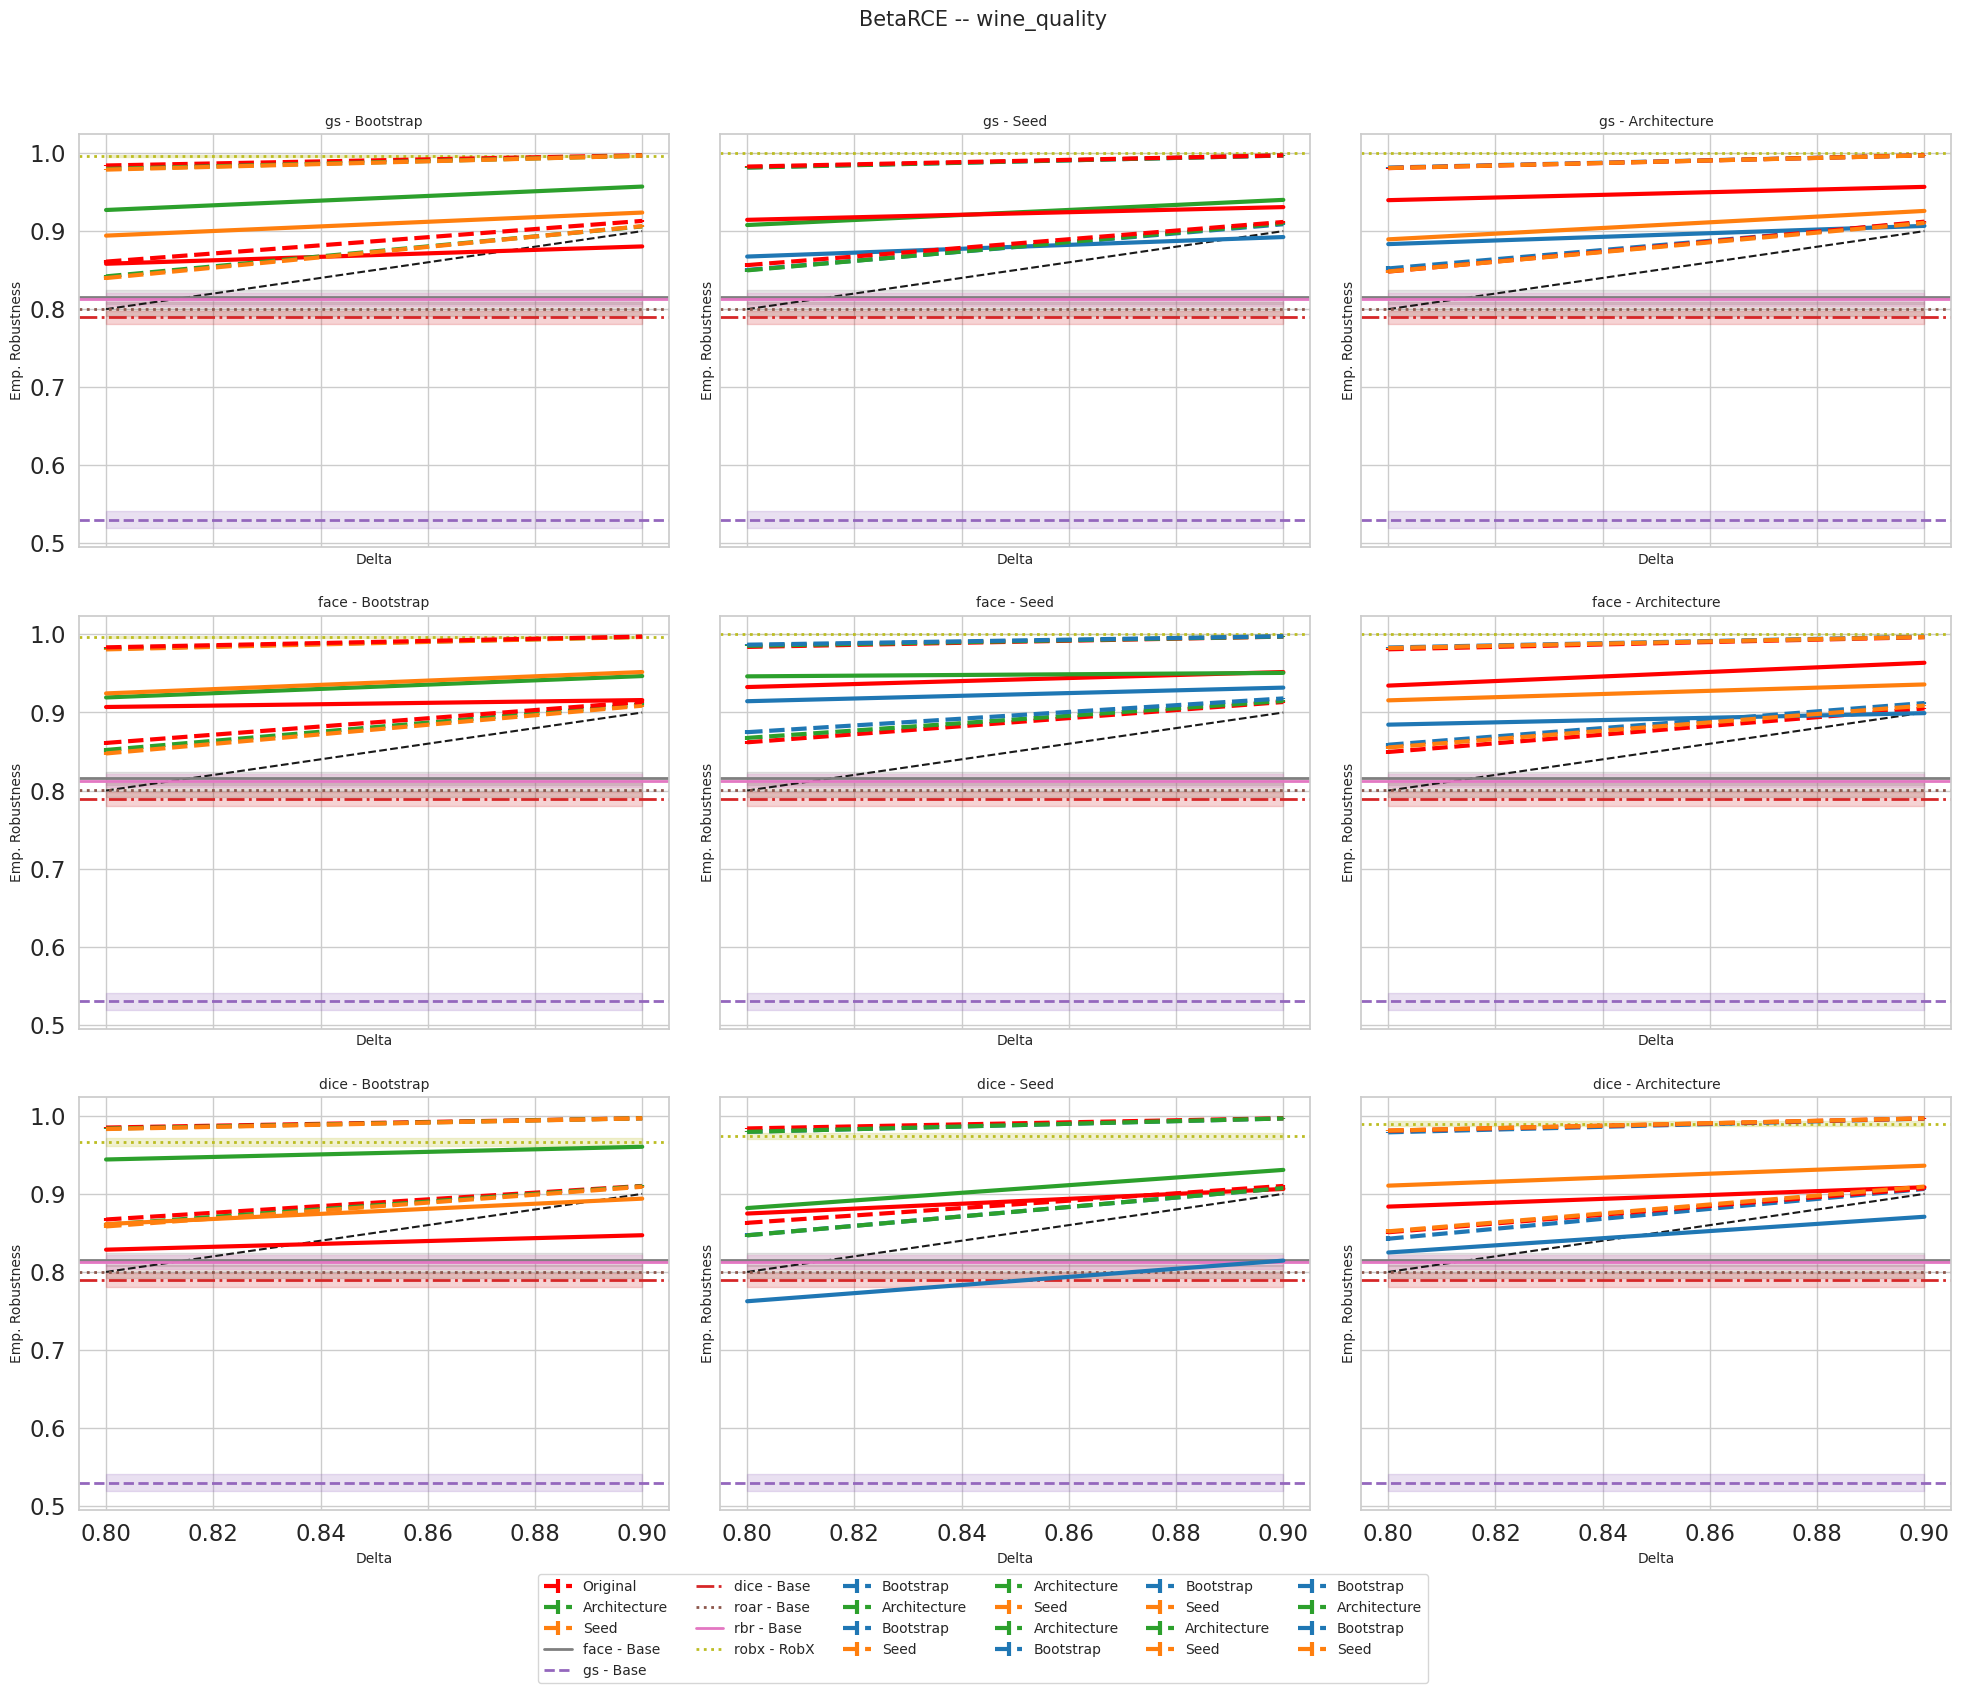

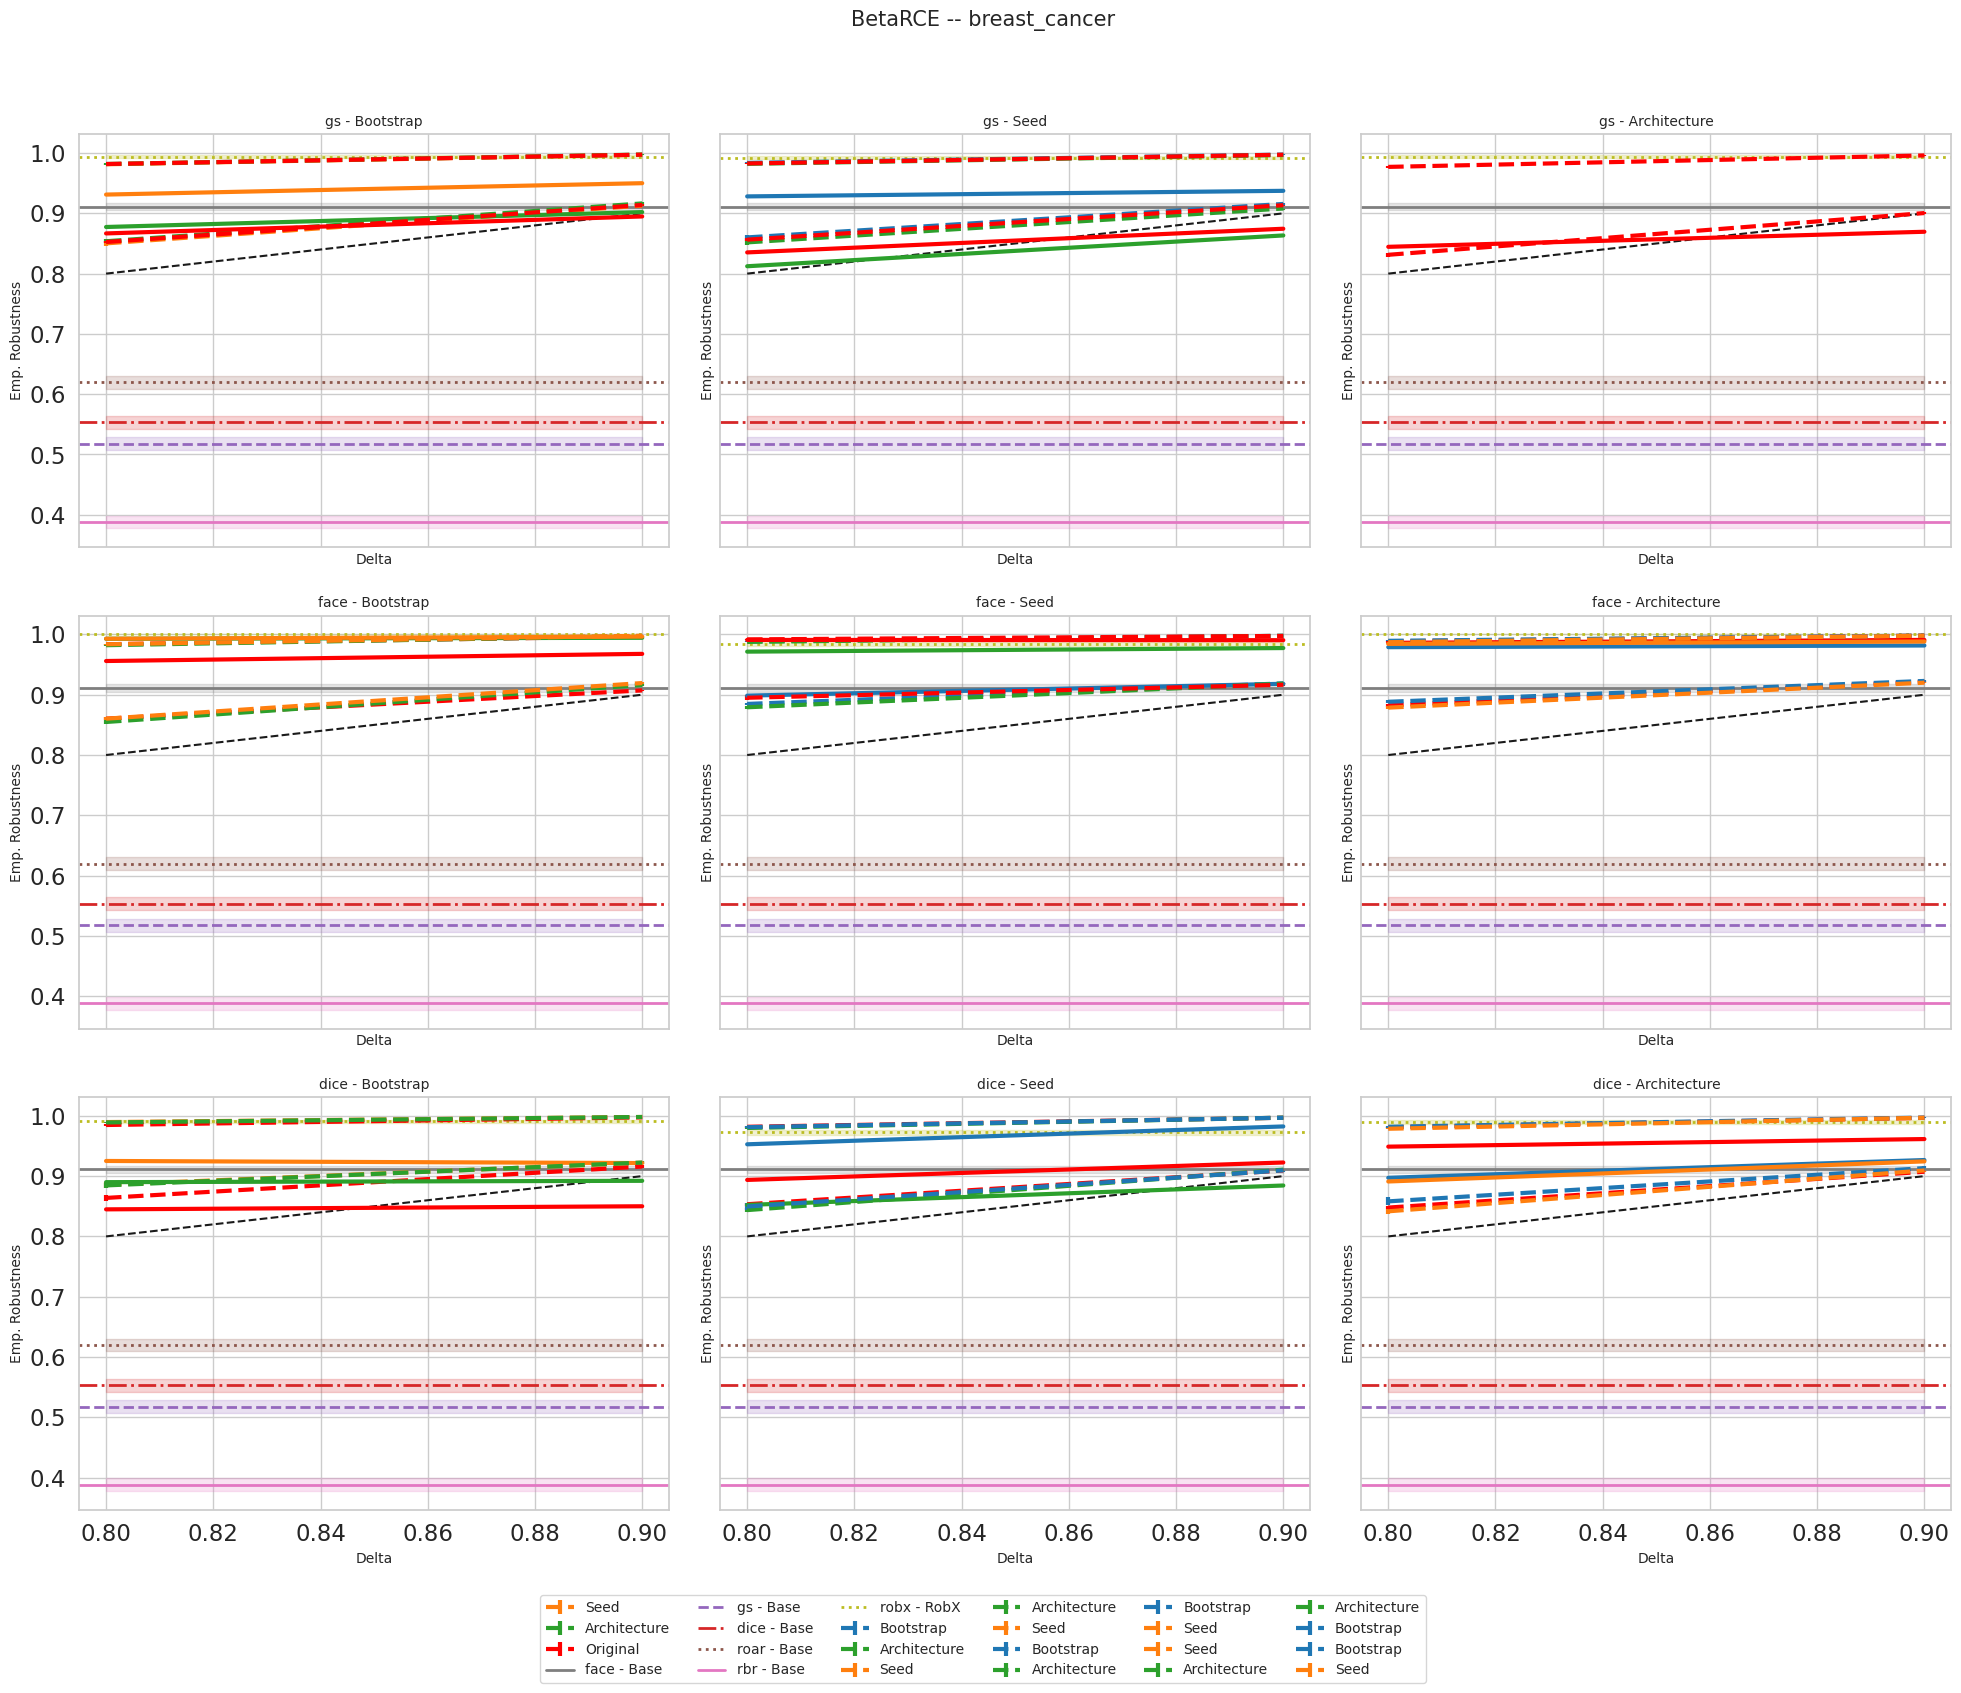

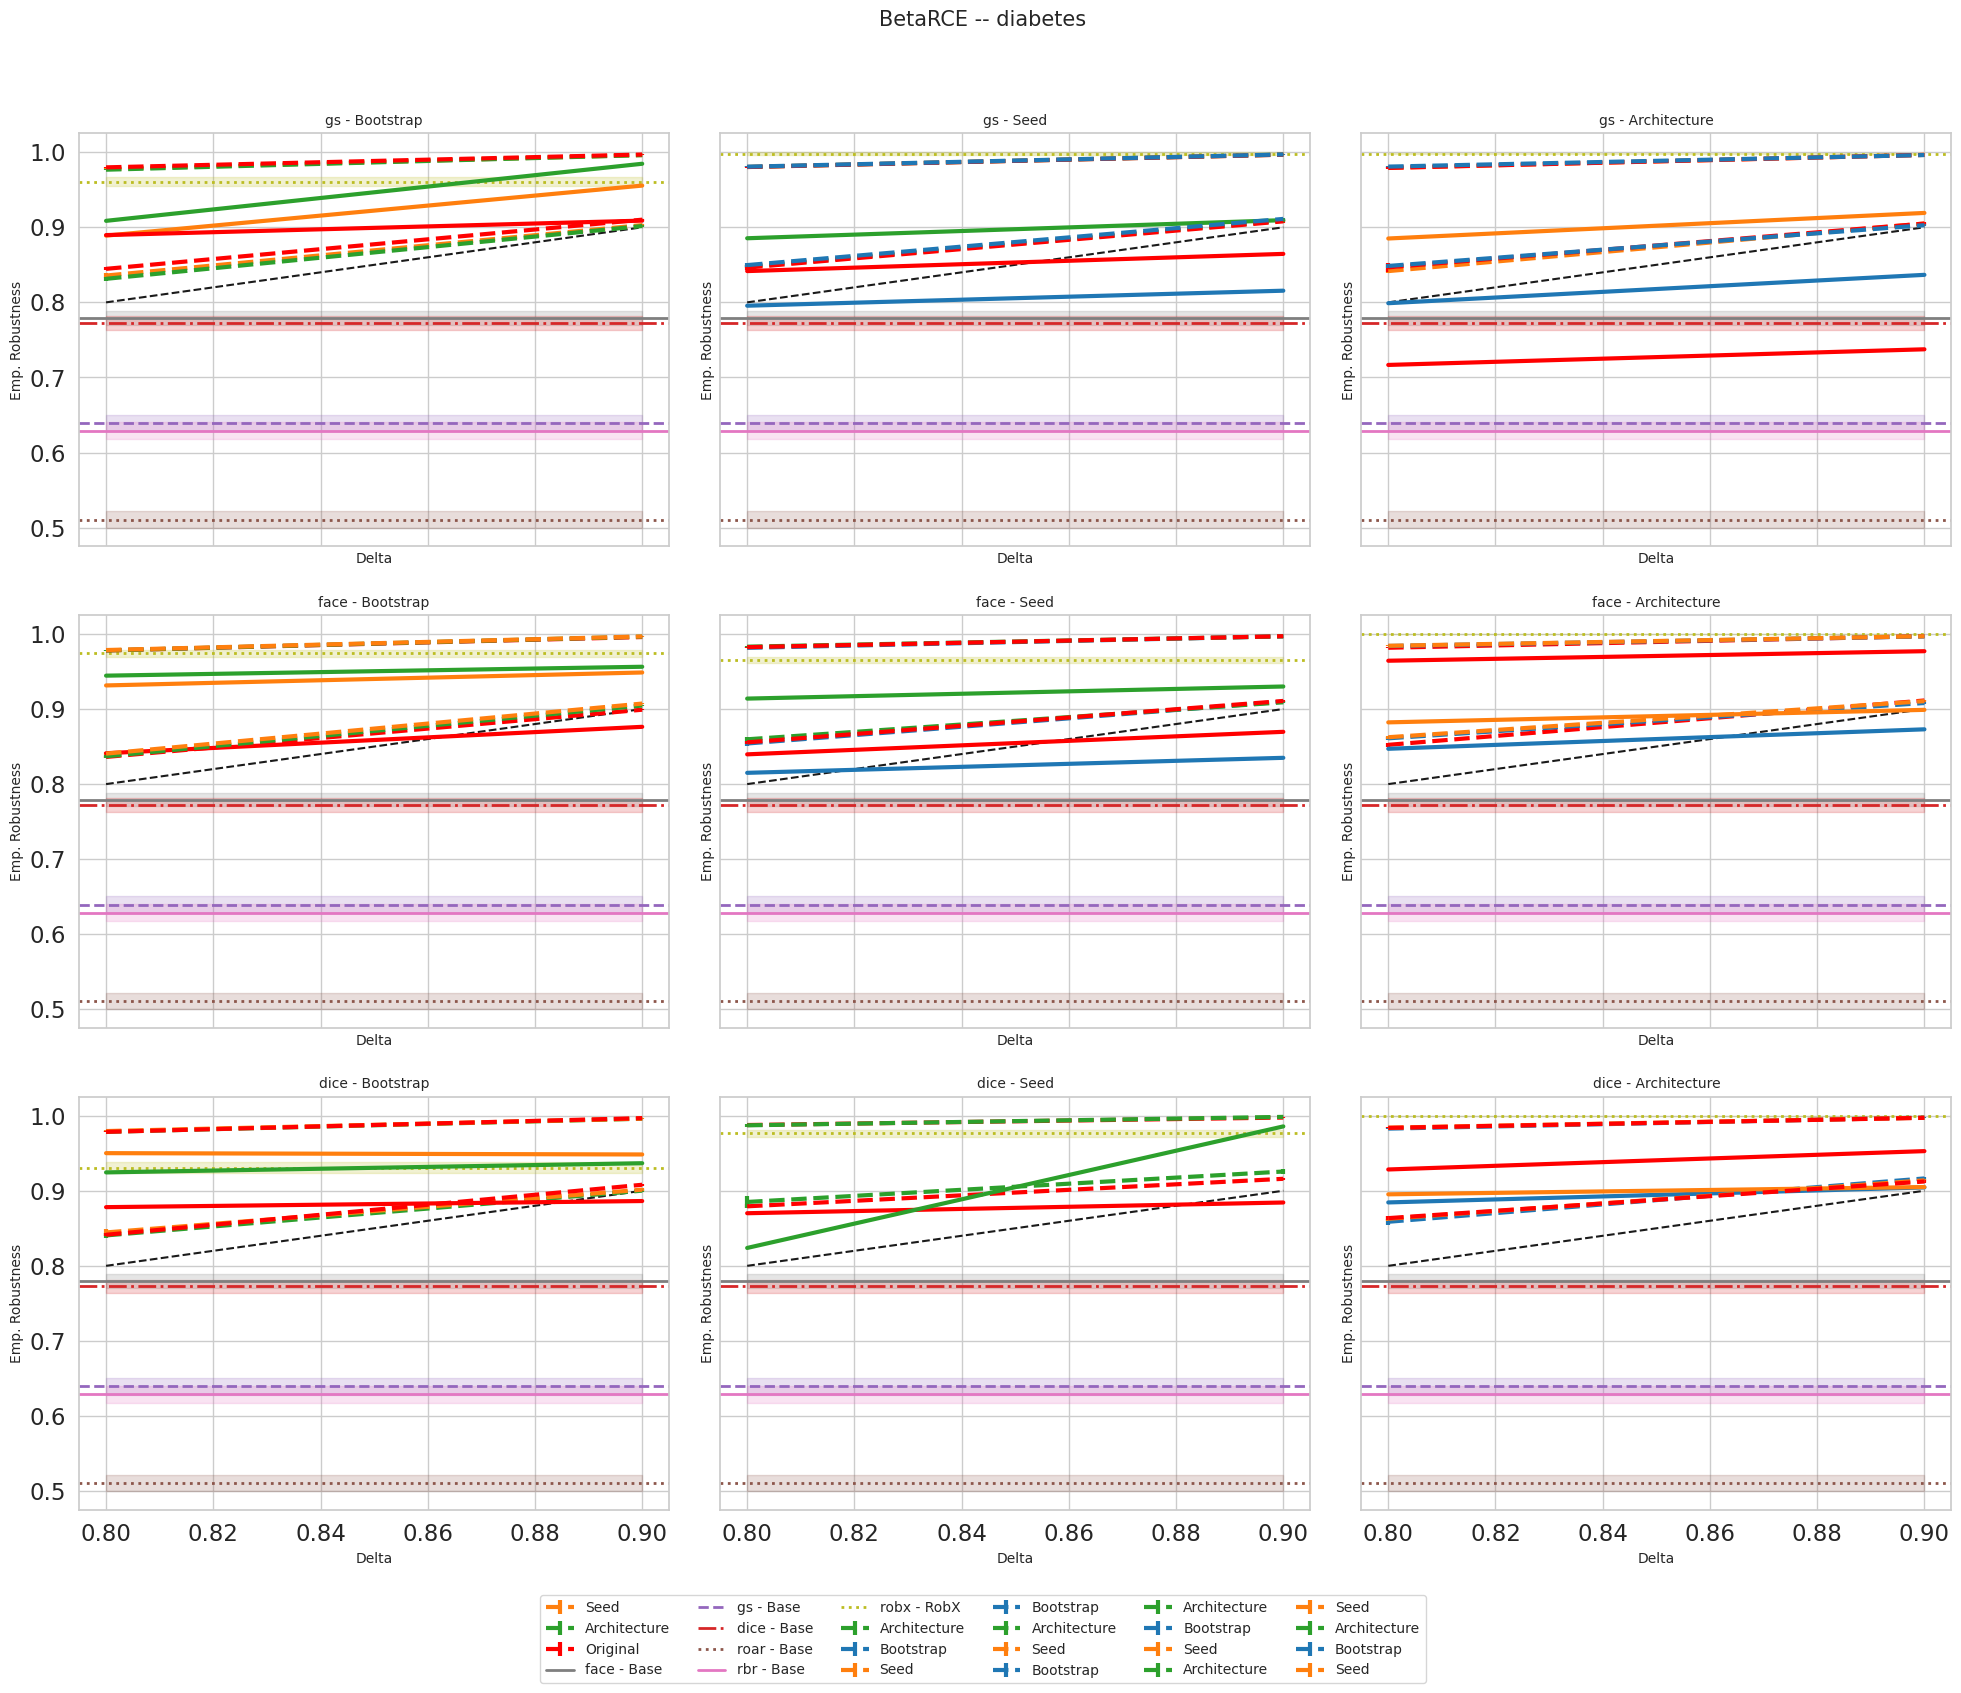

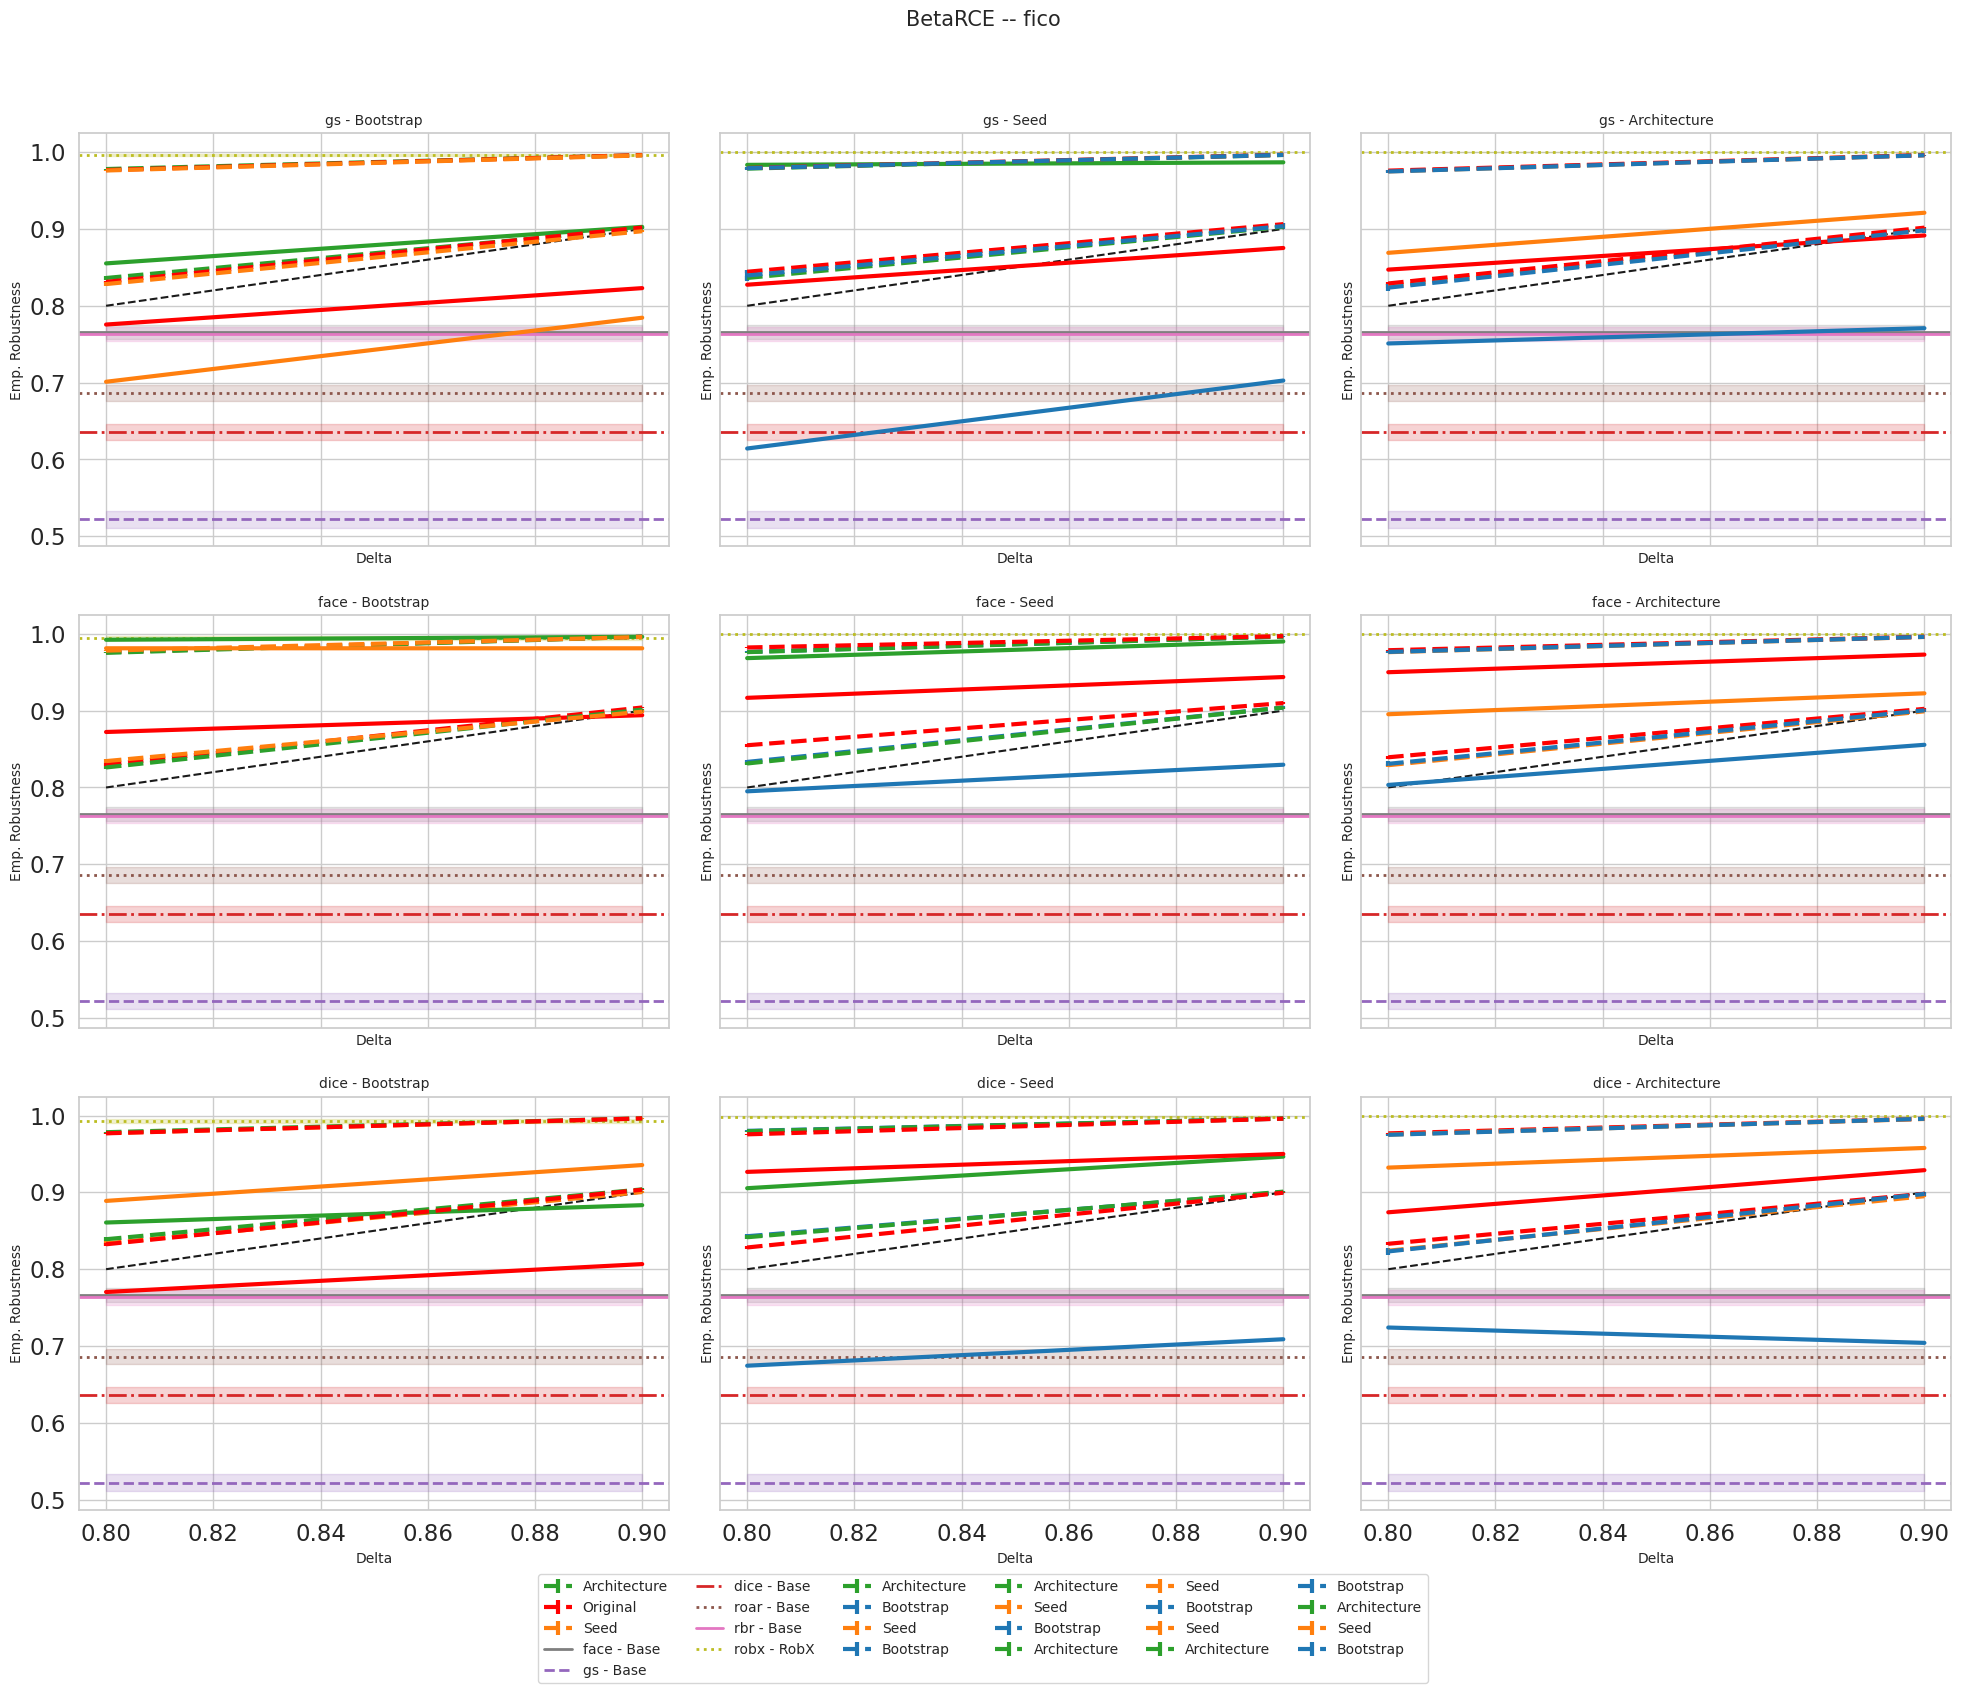

In [ ]:
# for i, dataset in enumerate(datasets):
#     fig, ax = plt.subplots(
#         len(base_methods),
#         len(base_experiment_types),
#         figsize=(20, 15),
#         sharex=True,
#         sharey=True,
#     )

#     # Create a list to store all legend handles and labels
#     all_handles = []
#     all_labels = []

#     for j, base_method in enumerate(base_methods):
#         for k, experiment_type in enumerate(base_experiment_types):
#             df = robust_agg_df[
#                 (robust_agg_df["dataset_name"] == dataset)
#                 & (robust_agg_df["base_cf_method"] == base_method)
#                 & (robust_agg_df["experiment_type"] == experiment_type)
#             ]

#             df = df.sort_values("delta_robustness")

#             for ex_gen_type in df["experiment_generalization_type"].unique():
#                 df_ex_gen_type = df[df["experiment_generalization_type"] == ex_gen_type]
#                 line = ax[j, k].errorbar(
#                     df_ex_gen_type["delta_robustness"],
#                     df_ex_gen_type["robustness"],
#                     # yerr=Z_SCORE * df_ex_gen_type['robustness_std'] / np.sqrt(df_ex_gen_type['n']),
#                     color=colors[ex_gen_type]
#                     if ex_gen_type != experiment_type
#                     else "red",
#                     linewidth=3,
#                 )

#                 # Lower bound beta
#                 line = ax[j, k].errorbar(
#                     df_ex_gen_type["delta_robustness"],
#                     df_ex_gen_type["lower_bound_beta"],
#                     yerr=Z_SCORE
#                     * df_ex_gen_type["lower_bound_beta_std"]
#                     / np.sqrt(df_ex_gen_type["n"]),
#                     color=colors[ex_gen_type]
#                     if ex_gen_type != experiment_type
#                     else "red",
#                     linestyle="--",
#                     linewidth=3,
#                 )

#                 # Upper bound beta
#                 line = ax[j, k].errorbar(
#                     df_ex_gen_type["delta_robustness"],
#                     df_ex_gen_type["upper_bound_beta"],
#                     yerr=Z_SCORE
#                     * df_ex_gen_type["upper_bound_beta_std"]
#                     / np.sqrt(df_ex_gen_type["n"]),
#                     color=colors[ex_gen_type]
#                     if ex_gen_type != experiment_type
#                     else "red",
#                     linestyle="--",
#                     linewidth=3,
#                 )

#                 # ax[j, k].fill_between(
#                 #     df_ex_gen_type['delta_robustness'],
#                 #     df_ex_gen_type['robustness'] - Z_SCORE * df_ex_gen_type['robustness_std'] / np.sqrt(df_ex_gen_type['n']),
#                 #     df_ex_gen_type['robustness'] + Z_SCORE * df_ex_gen_type['robustness_std'] / np.sqrt(df_ex_gen_type['n']),
#                 #     color=colors[ex_gen_type] if ex_gen_type != experiment_type else 'red',
#                 #     alpha=0.2
#                 # )

#                 # Add to legend only once
#                 if (
#                     ex_gen_type
#                     if ex_gen_type != experiment_type
#                     else "Original" not in all_labels
#                 ):
#                     all_handles.append(line)
#                     all_labels.append(
#                         ex_gen_type if ex_gen_type != experiment_type else "Original"
#                     )

#             min_Delta = df["delta_robustness"].min()
#             max_Delta = df["delta_robustness"].max()
#             line = ax[j, k].plot([min_Delta, max_Delta], [min_Delta, max_Delta], "k--")

#             if "y=x" not in all_labels:
#                 all_handles.append(line)
#                 all_labels.append("y=x")

#             for ll, jst_base_method in enumerate(
#                 base_agg_df["base_cf_method"].unique()
#             ):
#                 df = base_agg_df[
#                     (base_agg_df["dataset_name"] == dataset)
#                     & (base_agg_df["base_cf_method"] == jst_base_method)
#                 ]

#                 if len(df) > 0:
#                     line = ax[j, k].axhline(
#                         df["robustness"].values[0],
#                         color=colors[jst_base_method],
#                         linestyle=linestyles[ll],
#                         linewidth=2,
#                     )
#                     ax[j, k].fill_between(
#                         [min_Delta, max_Delta],
#                         df["robustness"].values[0]
#                         - Z_SCORE
#                         * df["robustness_std"].values[0]
#                         / np.sqrt(df["n"].values[0]),
#                         df["robustness"].values[0]
#                         + Z_SCORE
#                         * df["robustness_std"].values[0]
#                         / np.sqrt(df["n"].values[0]),
#                         color=colors[jst_base_method],
#                         alpha=0.2,
#                     )

#                     if f"{jst_base_method} - Base" not in all_labels:
#                         all_handles.append(line)
#                         all_labels.append(f"{jst_base_method} - Base")

#             for ll, robx_method in enumerate(robx_agg_df["robust_cf_method"].unique()):
#                 df = robx_agg_df[
#                     (robx_agg_df["dataset_name"] == dataset)
#                     & (robx_agg_df["base_cf_method"] == base_method)
#                     & (robx_agg_df["experiment_type"] == experiment_type)
#                     & (robx_agg_df["robust_cf_method"] == robx_method)
#                 ]

#                 if len(df) > 0:
#                     line = ax[j, k].axhline(
#                         df["robustness"].values[0],
#                         color=colors[robx_method],
#                         linestyle=linestyles[3],
#                         linewidth=2,
#                     )
#                     ax[j, k].fill_between(
#                         [min_Delta, max_Delta],
#                         df["robustness"].values[0]
#                         - Z_SCORE
#                         * df["robustness_std"].values[0]
#                         / np.sqrt(df["n"].values[0]),
#                         df["robustness"].values[0]
#                         + Z_SCORE
#                         * df["robustness_std"].values[0]
#                         / np.sqrt(df["n"].values[0]),
#                         color=colors[robx_method],
#                         alpha=0.2,
#                     )

#                     if f"{robx_method} - RobX" not in all_labels:
#                         all_handles.append(line)
#                         all_labels.append(f"{robx_method} - RobX")

#             ax[j, k].set_title(f"{base_method} - {experiment_type}", fontsize=10)
#             ax[j, k].set_ylabel("Emp. Robustness", fontsize=10)
#             ax[j, k].set_xlabel("Delta", fontsize=10)

#     plt.suptitle(f"BetaRCE -- {dataset}", fontsize=15, y=1.02)

#     # Create a single legend for the entire figure
#     fig.legend(
#         all_handles,
#         all_labels,
#         loc="lower center",
#         bbox_to_anchor=(0.5, -0.1),
#         ncol=min(len(all_labels), 6),
#         fontsize=10,
#     )

#     plt.tight_layout()
#     plt.subplots_adjust(bottom=0.02)  # Adjust bottom to make room for the legend
#     plt.show()

In [33]:
def create_summary_table(dataset, base_method, experiment_type):
    # Filter the data
    df = robust_agg_df[
        (robust_agg_df["dataset_name"] == dataset)
        & (robust_agg_df["base_cf_method"] == base_method)
        & (robust_agg_df["experiment_type"] == experiment_type)
    ]

    # Create a summary DataFrame
    summary = []

    # Add BetaRCE results
    for ex_gen_type in df["experiment_generalization_type"].unique():
        df_ex_gen_type = df[df["experiment_generalization_type"] == ex_gen_type]
        summary.append(
            {
                "Method": f"BetaRCE ({ex_gen_type})",
                "Robustness": f"{df_ex_gen_type['robustness'].mean():.3f} ± {Z_SCORE * df_ex_gen_type['robustness_std'].mean() / np.sqrt(df_ex_gen_type['n'].mean()):.3f}",
                "Lower Bound Beta": f"{df_ex_gen_type['lower_bound_beta'].mean():.3f} ± {Z_SCORE * df_ex_gen_type['lower_bound_beta_std'].mean() / np.sqrt(df_ex_gen_type['n'].mean()):.3f}",
                "Upper Bound Beta": f"{df_ex_gen_type['upper_bound_beta'].mean():.3f} ± {Z_SCORE * df_ex_gen_type['upper_bound_beta_std'].mean() / np.sqrt(df_ex_gen_type['n'].mean()):.3f}",
            }
        )

    # Add base method results
    base_df = base_agg_df[
        (base_agg_df["dataset_name"] == dataset)
        & (base_agg_df["base_cf_method"] == base_method)
    ]
    if len(base_df) > 0:
        summary.append(
            {
                "Method": f"{base_method} - Base",
                "Robustness": f"{base_df['robustness'].values[0]:.3f} ± {Z_SCORE * base_df['robustness_std'].values[0] / np.sqrt(base_df['n'].values[0]):.3f}",
                "Lower Bound Beta": "N/A",
                "Upper Bound Beta": "N/A",
            }
        )

    # Add RobX results
    for robx_method in robx_agg_df["robust_cf_method"].unique():
        robx_df = robx_agg_df[
            (robx_agg_df["dataset_name"] == dataset)
            & (robx_agg_df["base_cf_method"] == base_method)
            & (robx_agg_df["experiment_type"] == experiment_type)
            & (robx_agg_df["robust_cf_method"] == robx_method)
        ]
        if len(robx_df) > 0:
            summary.append(
                {
                    "Method": f"{robx_method} - RobX",
                    "Robustness": f"{robx_df['robustness'].values[0]:.3f} ± {Z_SCORE * robx_df['robustness_std'].values[0] / np.sqrt(robx_df['n'].values[0]):.3f}",
                    "Lower Bound Beta": "N/A",
                    "Upper Bound Beta": "N/A",
                }
            )

    # Create the summary DataFrame
    summary_df = pd.DataFrame(summary)

    return summary_df

In [34]:
# Create tables for each combination
for dataset in datasets:
    for base_method in base_methods:
        for experiment_type in base_experiment_types:
            summary_df = create_summary_table(dataset, base_method, experiment_type)
            print(f"\nSummary for {dataset} - {base_method} - {experiment_type}")
            print(summary_df.to_string(index=False))
            print("\n")


Summary for wine_quality - gs - Bootstrap
                Method    Robustness Lower Bound Beta Upper Bound Beta
   BetaRCE (Bootstrap) 0.869 ± 0.013    0.887 ± 0.002    0.991 ± 0.000
BetaRCE (Architecture) 0.942 ± 0.009    0.874 ± 0.001    0.988 ± 0.000
        BetaRCE (Seed) 0.909 ± 0.011    0.873 ± 0.002    0.988 ± 0.000
             gs - Base 0.530 ± 0.011              N/A              N/A
           robx - RobX 0.996 ± 0.001              N/A              N/A



Summary for wine_quality - gs - Seed
                Method    Robustness Lower Bound Beta Upper Bound Beta
   BetaRCE (Bootstrap) 0.880 ± 0.013    0.880 ± 0.002    0.989 ± 0.000
        BetaRCE (Seed) 0.923 ± 0.010    0.884 ± 0.002    0.990 ± 0.000
BetaRCE (Architecture) 0.924 ± 0.010    0.880 ± 0.002    0.989 ± 0.000
             gs - Base 0.530 ± 0.011              N/A              N/A
           robx - RobX 1.000 ± 0.000              N/A              N/A



Summary for wine_quality - gs - Architecture
                M

In [35]:
ksweep_agg_by = ["dataset_name", "base_cf_method", "experiment_type", "k_mlps_in_B"]
ksweep_agg_df = (
    ksweep_df.groupby(ksweep_agg_by)
    .agg(
        n=("base_counterfactual_validity_model2", "count"),
        vailidity=("base_counterfactual_validity", "mean"),
        validity_std=("base_counterfactual_validity", "std"),
        robustness=("robust_counterfactual_validity_model2", "mean"),
        robustness_std=("robust_counterfactual_validity_model2", "std"),
        proximityL1=("robust_counterfactual_proximityL1", "mean"),
        proximityL1_std=("robust_counterfactual_proximityL1", "std"),
        proximityL2=("robust_counterfactual_proximityL2", "mean"),
        proximityL2_std=("robust_counterfactual_proximityL2", "std"),
        plausibility=("robust_counterfactual_plausibility", "mean"),
        plausibility_std=("robust_counterfactual_plausibility", "std"),
        dpow=("robust_counterfactual_discriminative_power", "mean"),
        dpow_std=("robust_counterfactual_discriminative_power", "std"),
    )
    .reset_index()
)

ksweep_agg_df.round(2).head()

dataset_name base_cf_method experiment_type  k_mlps_in_B     n  vailidity  \
0     diabetes             gs    Architecture            8  3000        1.0   
1     diabetes             gs    Architecture           12  3000        1.0   
2     diabetes             gs    Architecture           16  4500        1.0   
3     diabetes             gs    Architecture           20  4500        1.0   
4     diabetes             gs    Architecture           24  4500        1.0   

   validity_std  robustness  robustness_std  proximityL1  proximityL1_std  \
0           0.0         NaN             NaN          NaN              NaN   
1           0.0         NaN             NaN          NaN              NaN   
2           0.0         NaN             NaN          NaN              NaN   
3           0.0        0.93            0.25         0.77             0.40   
4           0.0        0.95            0.21         0.76             0.43   

   proximityL2  proximityL2_std  plausibility  plausibility_std  dpow  \
0          NaN              NaN           NaN               NaN   NaN   
1          NaN              NaN           NaN               NaN   NaN   
2          NaN              NaN           NaN               NaN   NaN   
3         0.33             0.17          0.34              0.11  0.56   
4         0.33             0.18          0.33              0.10  0.52   

   dpow_std  
0       NaN  
1       NaN  
2       NaN  
3      0.18  
4      0.18

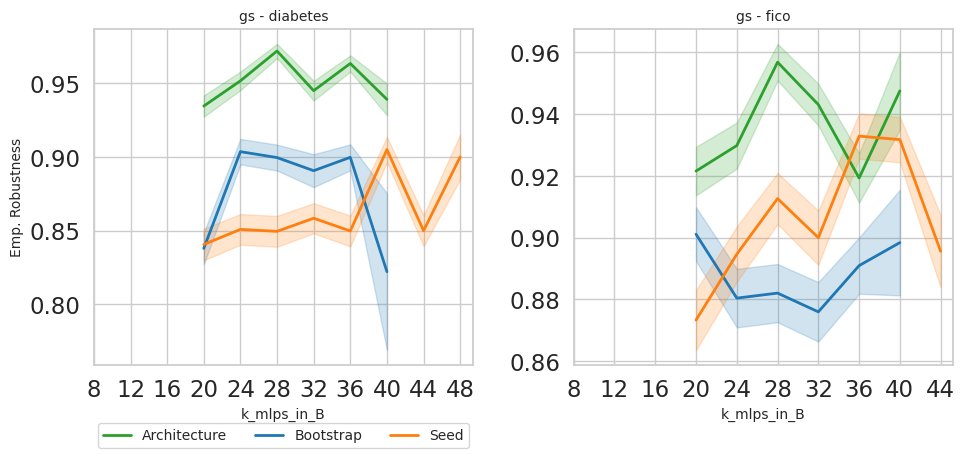

In [36]:
# Determine the number of unique base methods and datasets
base_methods = ksweep_agg_df["base_cf_method"].unique()
datasets = ksweep_agg_df["dataset_name"].unique()
n_rows = len(base_methods)
n_cols = len(datasets)

# Create a figure with subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows), squeeze=False)

for i, base_method in enumerate(base_methods):
    for j, dataset in enumerate(datasets):
        ax = axs[i, j]
        df = ksweep_agg_df[
            (ksweep_agg_df["dataset_name"] == dataset)
            & (ksweep_agg_df["base_cf_method"] == base_method)
        ]
        for experiment_type in df["experiment_type"].unique():
            df_ex = df[df["experiment_type"] == experiment_type]
            ax.errorbar(
                df_ex["k_mlps_in_B"],
                df_ex["robustness"],
                label=experiment_type,
                color=colors[experiment_type],
                linewidth=2,
            )
            ax.fill_between(
                df_ex["k_mlps_in_B"],
                df_ex["robustness"]
                - Z_SCORE * df_ex["robustness_std"] / np.sqrt(df_ex["n"]),
                df_ex["robustness"]
                + Z_SCORE * df_ex["robustness_std"] / np.sqrt(df_ex["n"]),
                color=colors[experiment_type],
                alpha=0.2,
            )

        ax.set_xticks(sorted(df["k_mlps_in_B"].unique()))
        ax.set_title(f"{base_method} - {dataset}", fontsize=10)
        if j == 0:  # Only set ylabel for the leftmost column
            ax.set_ylabel("Emp. Robustness", fontsize=10)
        if i == n_rows - 1:  # Only set xlabel for the bottom row
            ax.set_xlabel("k_mlps_in_B", fontsize=10)

        # Set legend only for the first subplot
        if i == 0 and j == 0:
            ax.legend(
                loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=4, fontsize=10
            )

plt.tight_layout()
plt.show()

In [37]:
brce_params_df_agg_by = [
    "dataset_name",
    "base_cf_method",
    "experiment_type",
    "delta_robustness",
    "beta_confidence",
]
brce_params_agg_df = (
    brce_params_df.groupby(brce_params_df_agg_by)
    .agg(
        n=("base_counterfactual_validity_model2", "count"),
        vailidity=("base_counterfactual_validity", "mean"),
        validity_std=("base_counterfactual_validity", "std"),
        robustness=("robust_counterfactual_validity_model2", "mean"),
        robustness_std=("robust_counterfactual_validity_model2", "std"),
        proximityL1=("robust_counterfactual_proximityL1", "mean"),
        proximityL1_std=("robust_counterfactual_proximityL1", "std"),
        proximityL2=("robust_counterfactual_proximityL2", "mean"),
        proximityL2_std=("robust_counterfactual_proximityL2", "std"),
        plausibility=("robust_counterfactual_plausibility", "mean"),
        plausibility_std=("robust_counterfactual_plausibility", "std"),
        dpow=("robust_counterfactual_discriminative_power", "mean"),
        dpow_std=("robust_counterfactual_discriminative_power", "std"),
    )
    .reset_index()
)

brce_params_agg_df.round(2).head()

dataset_name base_cf_method experiment_type  delta_robustness  \
0  breast_cancer           dice    Architecture               0.6   
1  breast_cancer           dice    Architecture               0.6   
2  breast_cancer           dice    Architecture               0.6   
3  breast_cancer           dice    Architecture               0.6   
4  breast_cancer           dice    Architecture               0.7   

   beta_confidence     n  vailidity  validity_std  robustness  robustness_std  \
0              0.6  1500        1.0           0.0        0.94            0.24   
1              0.7  1500        1.0           0.0        0.94            0.24   
2              0.8  1500        1.0           0.0        0.94            0.23   
3              0.9  1491        1.0           0.0        0.95            0.23   
4              0.6  1500        1.0           0.0        0.95            0.21   

   proximityL1  proximityL1_std  proximityL2  proximityL2_std  plausibility  \
0         3.13             1.88         1.12             0.39          1.12   
1         3.21             1.91         1.13             0.40          1.13   
2         3.20             1.91         1.13             0.40          1.13   
3         3.30             1.95         1.14             0.40          1.13   
4         3.39             1.97         1.15             0.40          1.14   

   plausibility_std  dpow  dpow_std  
0              0.32  0.36      0.25  
1              0.33  0.38      0.25  
2              0.33  0.37      0.25  
3              0.33  0.39      0.25  
4              0.34  0.40      0.25

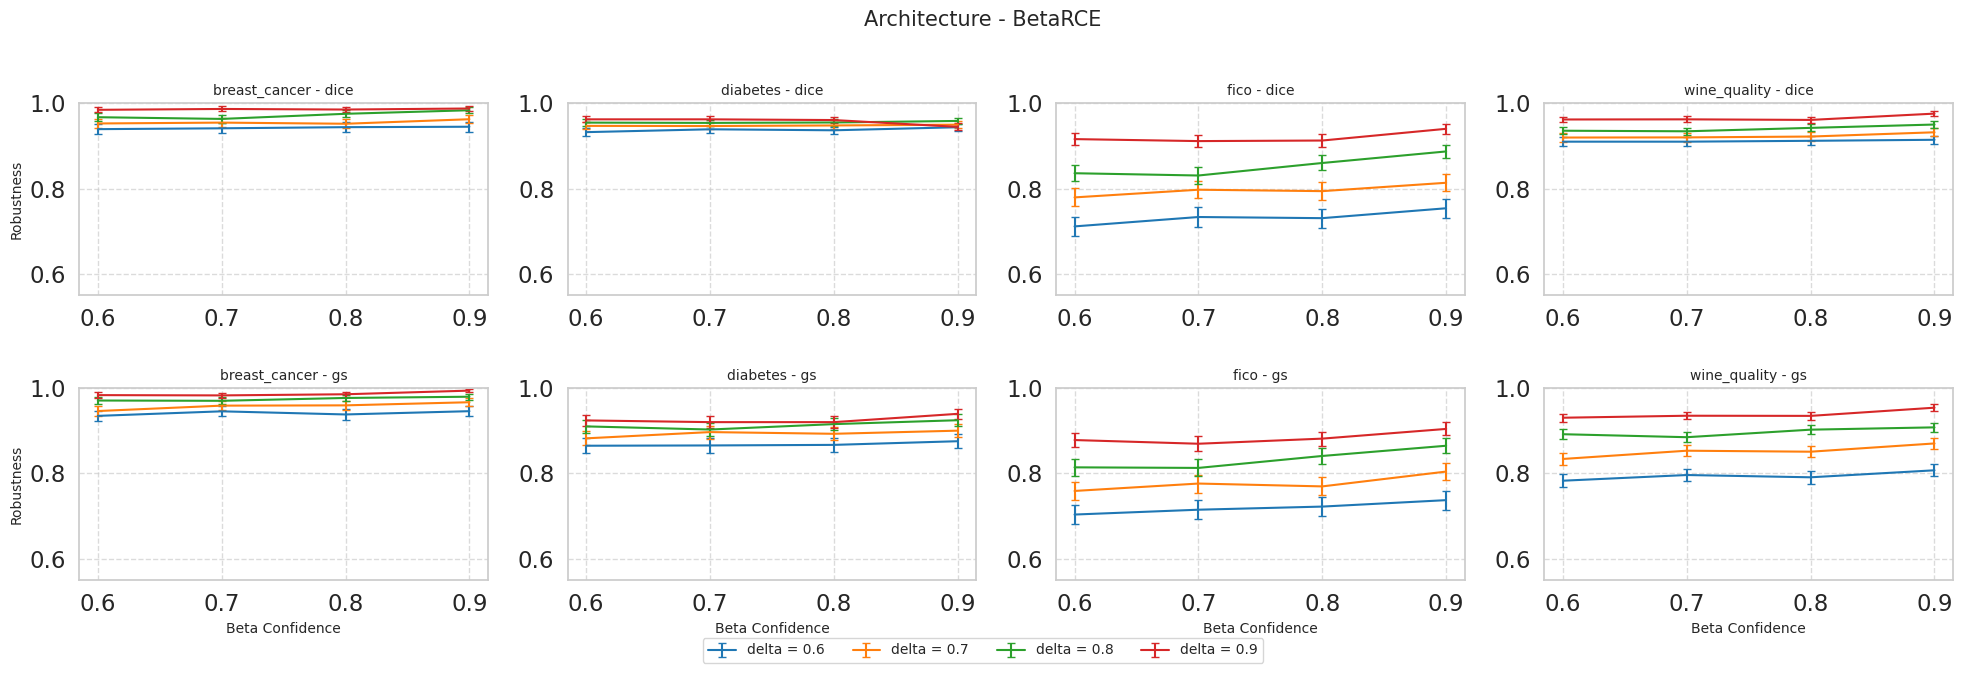

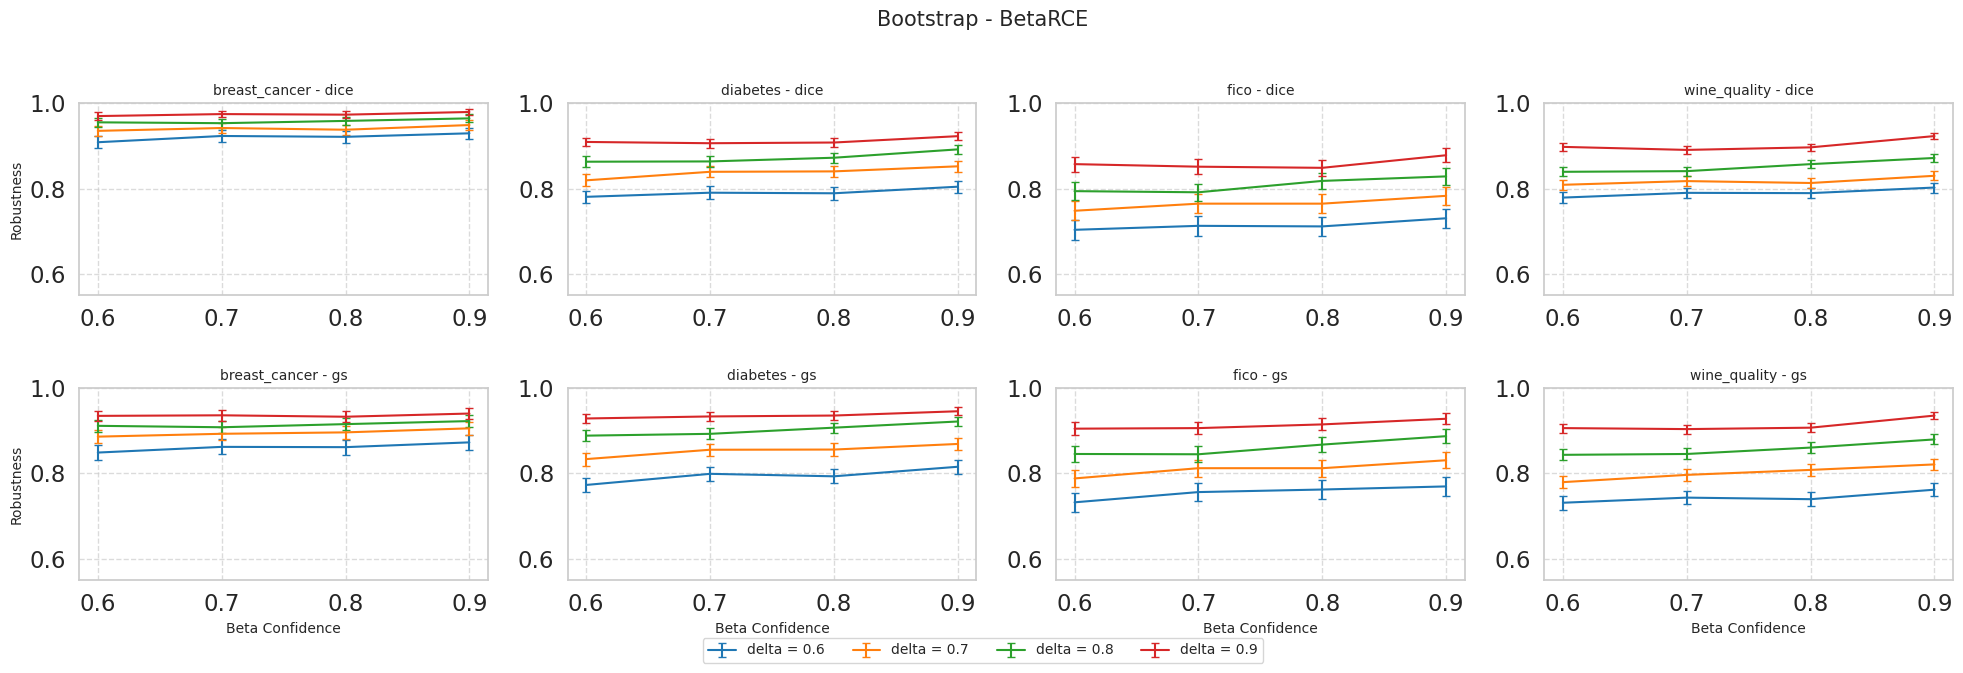

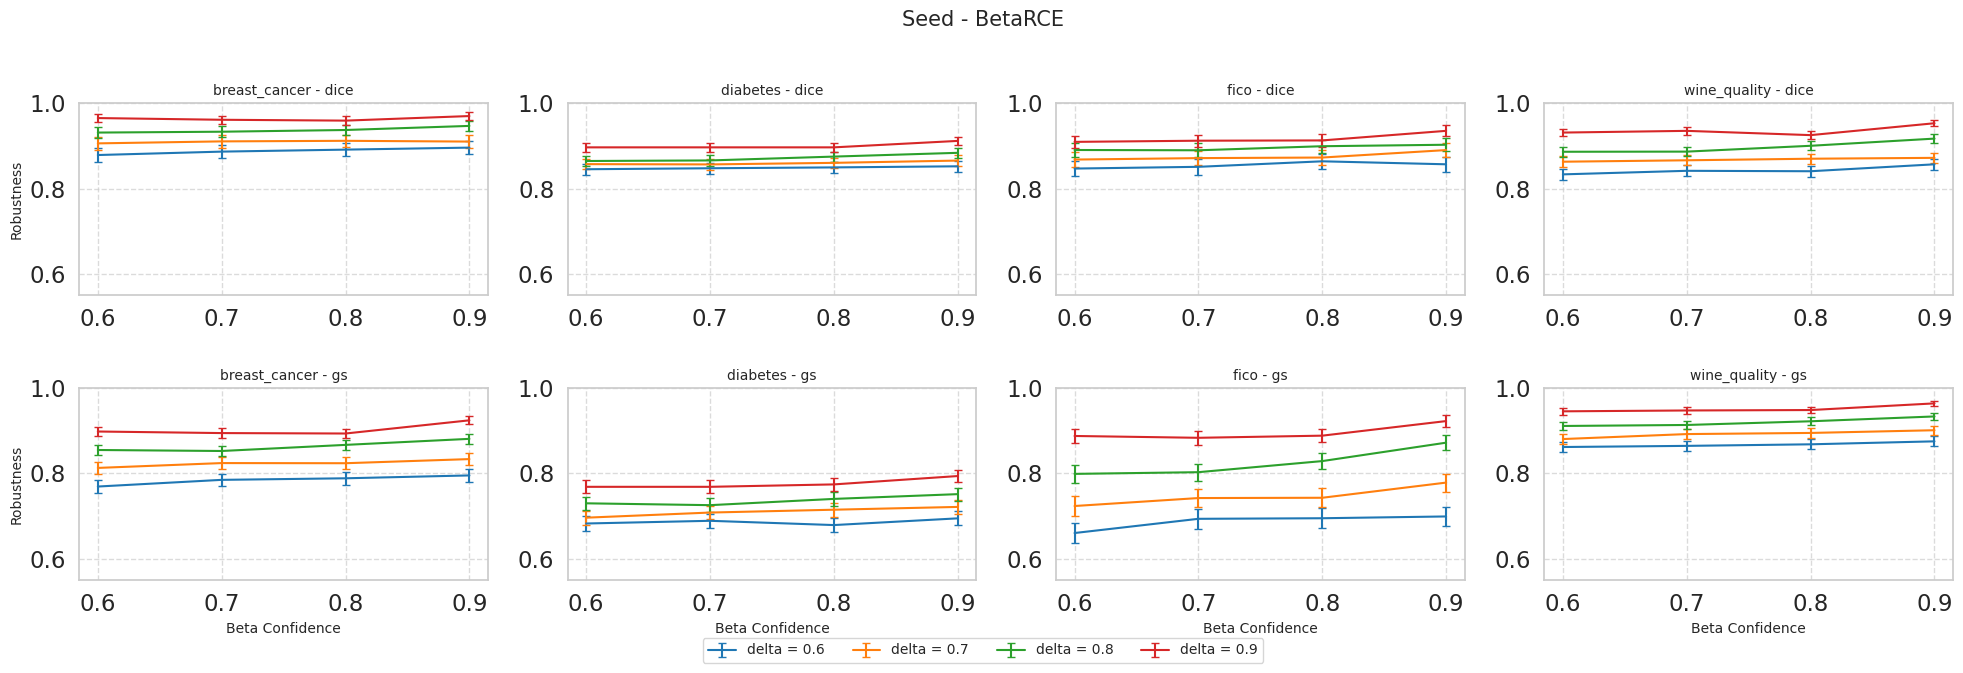

In [ ]:
subdir = "confidence_sweep"
os.makedirs(f"{images_dir}/{subdir}", exist_ok=True)

# Get unique values
datasets = brce_params_agg_df["dataset_name"].unique()
base_methods = brce_params_agg_df["base_cf_method"].unique()
experiment_types = brce_params_agg_df["experiment_type"].unique()
delta_robustness_values = sorted(brce_params_agg_df["delta_robustness"].unique())

# Set up the plot
n_rows = len(base_methods)
n_cols = len(datasets)

colors = {l: c for l, c in zip(delta_robustness_values, colors_discrete)}

for exp_type in experiment_types:
    fig, axs = plt.subplots(
        n_rows, n_cols, figsize=(5 * n_cols, 3 * n_rows), squeeze=False
    )
    for i, base_method in enumerate(base_methods):
        for j, dataset in enumerate(datasets):
            ax = axs[i, j]
            for k, delta_rob in enumerate(delta_robustness_values):
                df_subset = brce_params_agg_df[
                    (brce_params_agg_df["dataset_name"] == dataset)
                    & (brce_params_agg_df["base_cf_method"] == base_method)
                    & (brce_params_agg_df["experiment_type"] == exp_type)
                    & (brce_params_agg_df["delta_robustness"] == delta_rob)
                ]

                if not df_subset.empty:
                    ax.errorbar(
                        df_subset["beta_confidence"],
                        df_subset["robustness"],
                        yerr=Z_SCORE
                        * df_subset["robustness_std"]
                        / np.sqrt(df_subset["n"]),
                        label=f"delta = {delta_rob}",
                        color=colors[delta_rob],
                        capsize=3,
                    )

            ax.set_xticks(sorted(df_subset["beta_confidence"].unique()))
            ax.set_title(f"{dataset} - {base_method}", fontsize=10)
            if j == 0:  # Only set ylabel for the leftmost column
                ax.set_ylabel("Robustness", fontsize=10)
            if i == n_rows - 1:  # Only set xlabel for the bottom row
                ax.set_xlabel("Beta Confidence", fontsize=10)

            ax.set_ylim(0.55, 1)  # Assuming robustness is between 0 and 1
            ax.grid(True, linestyle="--", alpha=0.7)

    # Create a single legend for the entire figure
    handles, labels = axs[0, 0].get_legend_handles_labels()
    fig.legend(
        handles,
        labels,
        loc="lower center",
        ncol=len(experiment_types) * len(delta_robustness_values),
        bbox_to_anchor=(0.5, -0.1),
        fontsize=10,
    )

    plt.suptitle(f"{exp_type} - BetaRCE", fontsize=15, y=1)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.05)  # Adjust to make room for the legend
    plt.savefig(f"{images_dir}/{subdir}/{exp_type}.png", bbox_inches="tight", dpi=150)
    plt.show()

In [41]:
raw_df = betarce_df[betarce_df["this_is_generalization"] == False].copy()

In [42]:
raw_df[raw_df["base_cf_method"] == "face"][
    "base_counterfactual_validity_model2"
].value_counts()

1.0    42525
0.0    15878
Name: base_counterfactual_validity_model2, dtype: int64

<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[1] Does higher Beta lead to better empirical robustness?</div>

32    53003
Name: k_mlps_in_B, dtype: int64


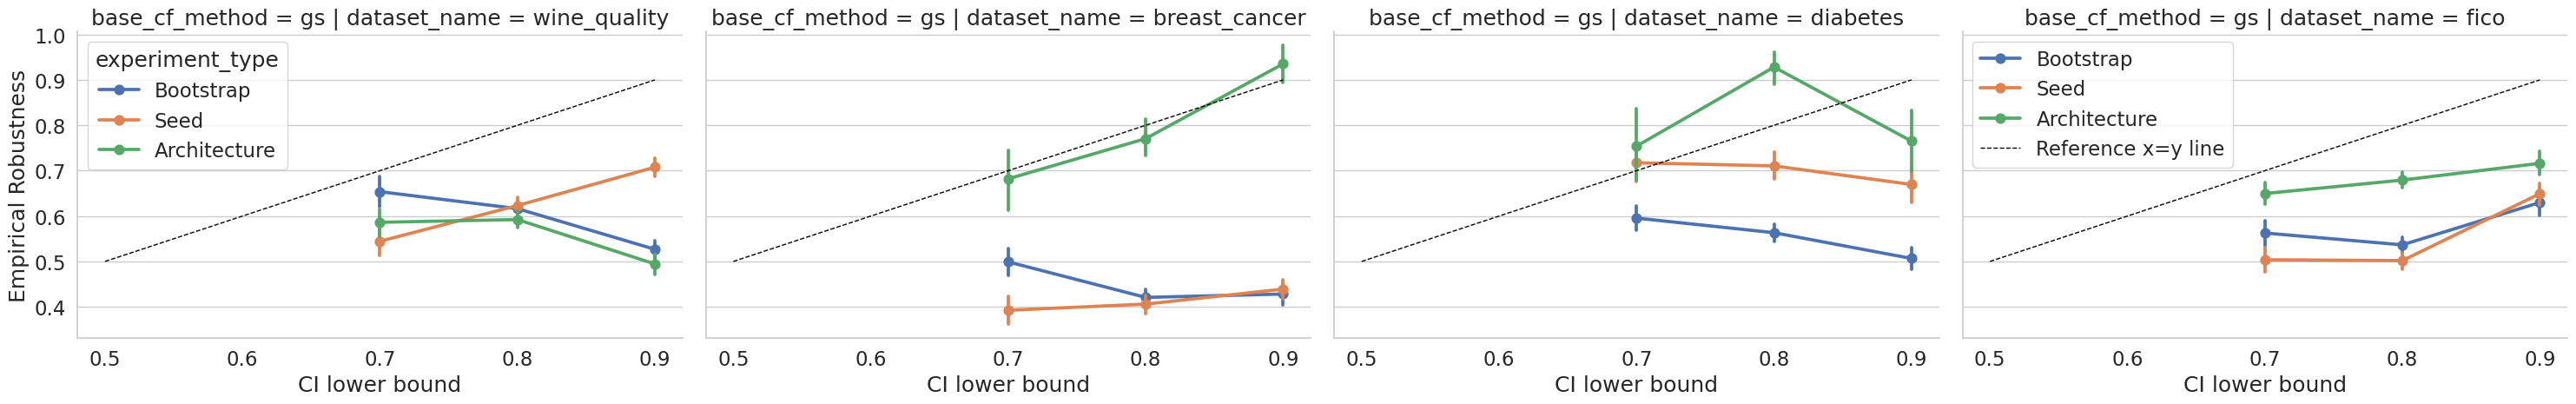

In [ ]:
subdir = "rob_vs_ci_lower_bound"
os.makedirs(f"{images_dir}/{subdir}", exist_ok=True)

# Split by expeirment type (hue) and dataset (col)
# x-axis: lower bound discretized
# y-axis: average empirical robustness

_tmp_df = raw_df[raw_df["base_cf_method"] == "gs"].copy()
lb_threshs = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
_tmp_df["CI lower bound"] = pd.cut(
    _tmp_df["lower_bound_beta"], bins=lb_threshs, labels=lb_threshs[:-1]
)
_tmp_df["CI midpoint"] = (_tmp_df["lower_bound_beta"] + _tmp_df["upper_bound_beta"]) / 2
_tmp_df["CI midpoint"] = pd.cut(
    _tmp_df["CI midpoint"], bins=lb_threshs, labels=lb_threshs[:-1]
)
_tmp_df["Empirical Robustness"] = _tmp_df["base_counterfactual_validity_model2"].astype(
    float
)

# Drop rows with NaN values in 'Empirical Robustness'
_tmp_df = _tmp_df.dropna(subset=["Empirical Robustness"])

# Print counts for each k_mlps_in_B
print(_tmp_df["k_mlps_in_B"].value_counts())

g = sns.catplot(
    data=_tmp_df,
    x="CI lower bound",
    y="Empirical Robustness",
    hue="experiment_type",
    col="dataset_name",
    row="base_cf_method",
    kind="point",
    # palette=colors_discrete,
    # markers=markers,
    height=5,
    aspect=1.5,
    legend_out=False,
)
for ax in g.axes.flat:
    ax.plot(
        list(range(5)),
        lb_threshs[:-1],
        color="black",
        linestyle="--",
        linewidth=1,
        label="Reference x=y line",
    )

plt.legend()
plt.savefig(
    f"{images_dir}/{subdir}/1_robustness_vs_ci_lower_bound.png",
    dpi=300,
    bbox_inches="tight",
)

In [44]:
nn_gs_df = raw_df[
    (raw_df["model_type_to_use"] == "neural_network")
    & (raw_df["base_cf_method"] == "gs")
]
nn_dice_df = raw_df[
    (raw_df["model_type_to_use"] == "neural_network")
    & (raw_df["base_cf_method"] == "dice")
]
nn_face_df = raw_df[
    (raw_df["model_type_to_use"] == "neural_network")
    & (raw_df["base_cf_method"] == "face")
]
nn_df = raw_df[raw_df["model_type_to_use"] == "neural_network"]
dt_gs_df = raw_df[
    (raw_df["model_type_to_use"] == "DecisionTree")
    & (raw_df["base_cf_method"] == "GrowingSpheres")
]
dt_dice_df = raw_df[
    (raw_df["model_type_to_use"] == "DecisionTree")
    & (raw_df["base_cf_method"] == "Dice")
]
dt_df = raw_df[raw_df["model_type_to_use"] == "DecisionTree"]

print(
    f"Lengths of the dataframes: NN GS: {len(nn_gs_df)}, NN Dice: {len(nn_dice_df)}, NN Face: {len(nn_face_df)}, NN: {len(nn_df)}, DT GS: {len(dt_gs_df)}, DT Dice: {len(dt_dice_df)}, DT: {len(dt_df)}"
)

Lengths of the dataframes: NN GS: 53003, NN Dice: 59602, NN Face: 58403, NN: 171008, DT GS: 0, DT Dice: 0, DT: 0


<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[2] Is the empirical validity δ-Robust?</div>

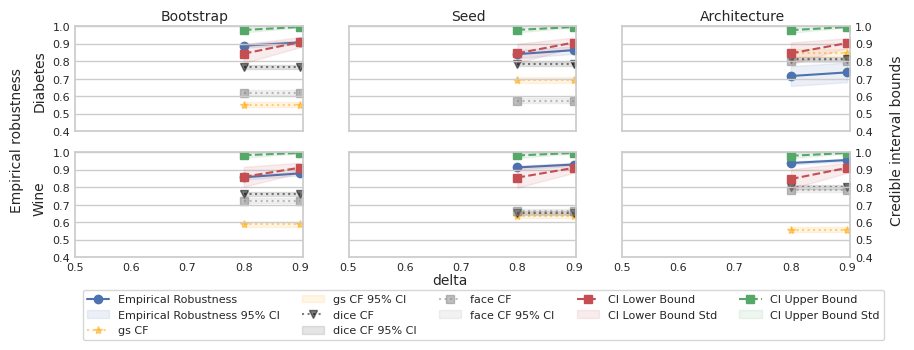

In [45]:
# Use only matplotlib
# x-axis: delta_robsutness
# y-axis: empirical robustness
# twin y-axis: CI lower and upper bounds
# row: dataset
# col: experiment type

_tmp_df = nn_df.copy()
method = "gs"

# datasets = ['wine_quality', 'diabetes', 'fico', 'breast_cancer']
# rename_Datasets = ['Wine', 'Diabetes', 'Heloc', 'Br. Cancer']

datasets = ["diabetes", "wine_quality"]
rename_Datasets = ["Diabetes", "Wine"]
_tmp_df["dataset_name"] = _tmp_df["dataset_name"].replace(
    dict(zip(datasets, rename_Datasets))
)
datasets = rename_Datasets

experiment_types = _tmp_df["experiment_type"].unique()
delta_robustness = _tmp_df["delta_robustness"].unique().tolist()
delta_robustness.sort()
# Set fontsize to 11
rows = max(2, len(datasets))
cols = max(2, len(experiment_types))
fig, axes = plt.subplots(
    nrows=rows, ncols=cols, figsize=(10, 3), sharex=True, sharey=True
)


for i, dataset in enumerate(datasets):
    for j, experiment_type in enumerate(experiment_types):
        _df_fil = _tmp_df[
            (_tmp_df["dataset_name"] == dataset)
            & (_tmp_df["experiment_type"] == experiment_type)
        ]
        _df = _df_fil[_df_fil["base_cf_method"] == method]

        data = _df.groupby("delta_robustness")[
            "robust_counterfactual_validity_model2"
        ].mean()

        ax = axes[i, j]
        ax.plot(
            delta_robustness,
            data,
            marker="o",
            linestyle="-",
            color="b",
            label="Empirical Robustness",
        )
        emprob_ci = (
            1.96
            * _df.groupby("delta_robustness")[
                "robust_counterfactual_validity_model2"
            ].std()
            / np.sqrt(
                _df.groupby("delta_robustness")[
                    "robust_counterfactual_validity_model2"
                ].count()
            )
        )
        ax.fill_between(
            delta_robustness,
            data - emprob_ci,
            data + emprob_ci,
            color="b",
            alpha=0.1,
            label="Empirical Robustness 95% CI",
        )

        # ax.set_title(f'{dataset} \n{experiment_type}')

        data_lower = _df.groupby("delta_robustness")["lower_bound_beta"].mean()
        data_upper = _df.groupby("delta_robustness")["upper_bound_beta"].mean()

        ax2 = ax.twinx()

        ax2.plot(
            delta_robustness,
            data_lower,
            marker="s",
            linestyle="--",
            color="r",
            label="CI Lower Bound",
        )
        # add yerr for lower bound
        lb_std = _df.groupby("delta_robustness")["lower_bound_beta"].std()
        ax2.fill_between(
            delta_robustness,
            data_lower - lb_std,
            data_lower + lb_std,
            color="r",
            alpha=0.1,
            label="CI Lower Bound Std",
        )

        ax2.plot(
            delta_robustness,
            data_upper,
            marker="s",
            linestyle="--",
            color="g",
            label="CI Upper Bound",
        )
        # add yerr
        ub_std = _df.groupby("delta_robustness")["upper_bound_beta"].std()
        ax2.fill_between(
            delta_robustness,
            data_upper - ub_std,
            data_upper + ub_std,
            color="g",
            alpha=0.1,
            label="CI Upper Bound Std",
        )

        # Plot baseline
        linestyles = [":", ":", ":"]
        markers = ["*", "v", "s"]
        for k, (m, color) in enumerate(
            zip(["gs", "dice", "face"], ["orange", "black", "gray"])
        ):
            __df = _df_fil[_df_fil["base_cf_method"] == m]
            base = __df["base_counterfactual_validity_model2"].mean()
            base_std = __df["base_counterfactual_validity_model2"].std()
            base_ci = (
                1.96
                * base_std
                / np.sqrt(__df["base_counterfactual_validity_model2"].count())
            )
            ax.plot(
                delta_robustness,
                [base] * len(delta_robustness),
                color=color,
                linestyle=linestyles[k],
                label=f"{m} CF",
                marker=markers[k],
                alpha=0.5,
            )
            ax.fill_between(
                delta_robustness,
                base - base_ci,
                base + base_ci,
                color=color,
                alpha=0.1,
                label=f"{m} CF 95% CI",
            )

        l = 0.4
        ax.set_ylim(l, 1)
        ax2.set_ylim(l, 1)
        ax.set_xticks([0.5, 0.6, 0.7, 0.8, 0.9])
        ax.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
        ax2.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

        # Decrease font size of the labels
        ax.tick_params(axis="both", which="major", labelsize=10)
        ax2.tick_params(axis="both", which="major", labelsize=10)

        # Turn off label ticks for ax2 on the plots that are not on the right
        if j != len(experiment_types) - 1:
            ax2.set_yticklabels([])

        # Remove the outline of the plot
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)
        ax.spines["bottom"].set_visible(False)

        ax.tick_params(axis="both", which="both", length=0)
        ax2.tick_params(axis="both", which="both", length=0)

        # Change ticks fontsize
        ax.tick_params(axis="both", which="major", labelsize=8)
        ax2.tick_params(axis="both", which="major", labelsize=8)

        # Remove grid
        ax.grid(False)

        handles, labels = ax.get_legend_handles_labels()
        handles_2, labels_2 = ax2.get_legend_handles_labels()

        handles_combined = handles + handles_2
        labels_combined = labels + labels_2

fig.text(0.5, 0.02, "delta", ha="center", fontsize=10)
fig.text(
    0.06, 0.5, "Empirical robustness", va="center", rotation="vertical", fontsize=10
)
fig.text(
    0.94, 0.5, "Credible interval bounds", va="center", rotation="vertical", fontsize=10
)
# Create one legend for the entire figure
fig.legend(
    handles_combined, labels_combined, bbox_to_anchor=(0.94, 0.02), ncol=5, fontsize=8
)

# Set titles for the rows with the dataset names
for ax, row in zip(axes[:, 0], datasets):
    rowlen = len(row)
    fig.text(
        ax.get_position().x0 - 0.035,
        ax.get_position().y0 + 0.6 * (1 / rowlen),
        row,
        ha="center",
        rotation="vertical",
        fontsize=10,
    )

# Set titles for the columns
for ax, col in zip(axes[0], experiment_types):
    fig.text(
        ax.get_position().x0 + 0.12,
        ax.get_position().y1 + 0.02,
        col,
        ha="center",
        fontsize=10,
    )


plt.savefig(
    f"{images_dir}/{subdir}2_empirical_robustness_ci_bounds_paper.png",
    dpi=300,
    bbox_inches="tight",
)

# plt.tight_layout()
plt.show()


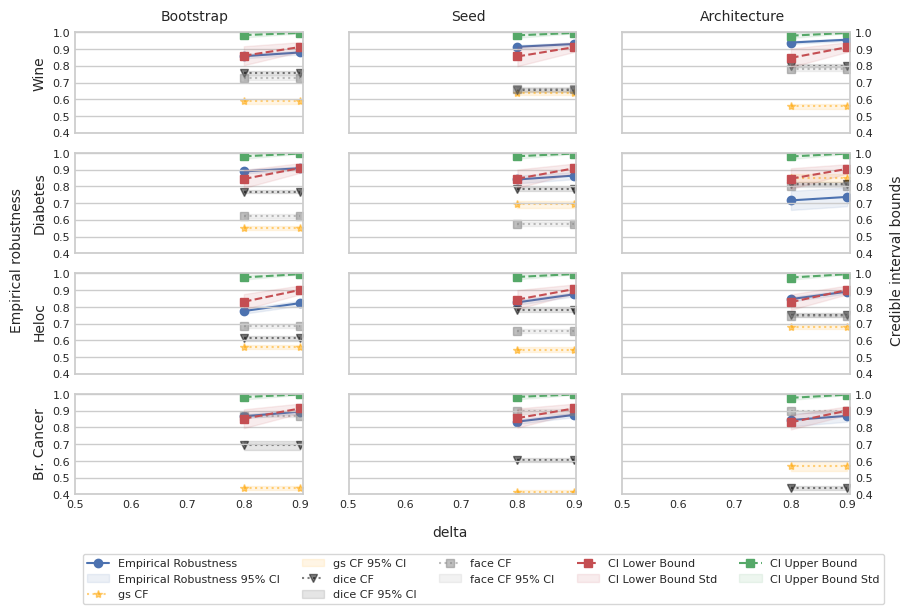

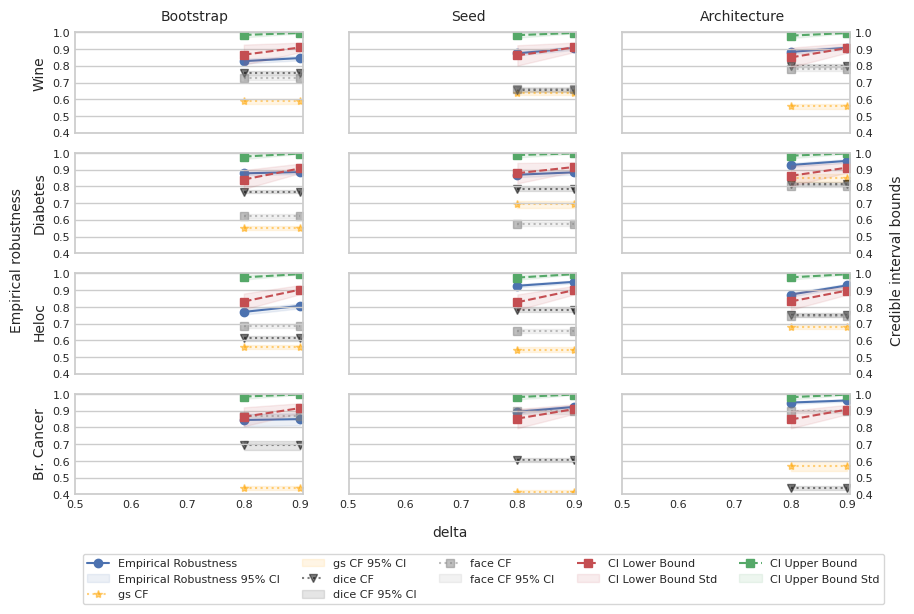

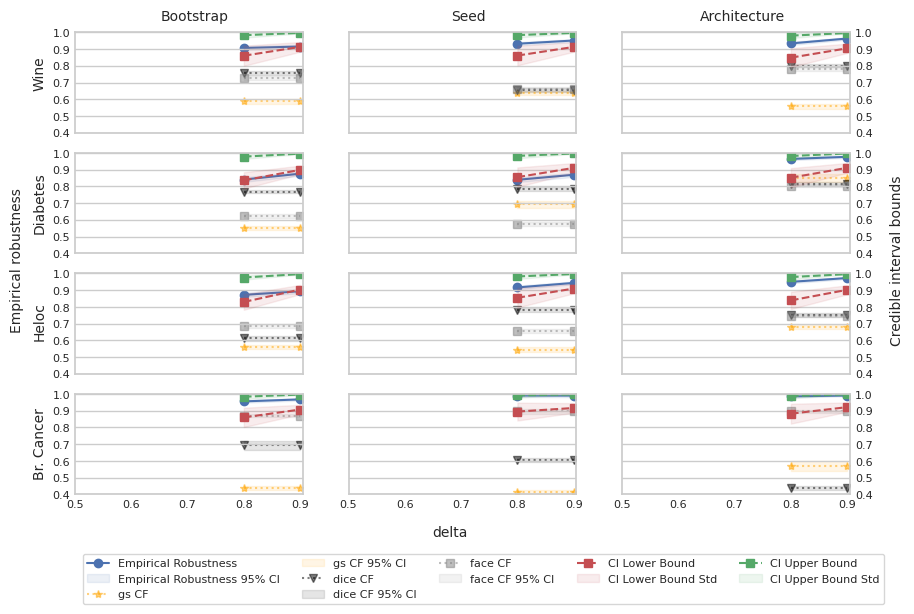

In [ ]:
# Use only matplotlib
# x-axis: delta_robsutness
# y-axis: empirical robustness
# twin y-axis: CI lower and upper bounds
# row: dataset
# col: experiment type

_tmp_df = nn_df.copy()

datasets = ["wine_quality", "diabetes", "fico", "breast_cancer"]
rename_Datasets = ["Wine", "Diabetes", "Heloc", "Br. Cancer"]

_tmp_df["dataset_name"] = _tmp_df["dataset_name"].replace(
    dict(zip(datasets, rename_Datasets))
)
datasets = rename_Datasets

experiment_types = _tmp_df["experiment_type"].unique()
delta_robustness = _tmp_df["delta_robustness"].unique().tolist()
delta_robustness.sort()
# Set fontsize to 11
rows = max(2, len(datasets))
cols = max(2, len(experiment_types))


for method in ["gs", "dice", "face"]:
    fig, axes = plt.subplots(
        nrows=rows, ncols=cols, figsize=(10, 6), sharex=True, sharey=True
    )

    for i, dataset in enumerate(datasets):
        for j, experiment_type in enumerate(experiment_types):
            _df_fil = _tmp_df[
                (_tmp_df["dataset_name"] == dataset)
                & (_tmp_df["experiment_type"] == experiment_type)
            ]
            _df = _df_fil[_df_fil["base_cf_method"] == method]

            data = _df.groupby("delta_robustness")[
                "robust_counterfactual_validity_model2"
            ].mean()

            ax = axes[i, j]
            ax.plot(
                delta_robustness,
                data,
                marker="o",
                linestyle="-",
                color="b",
                label="Empirical Robustness",
            )
            emprob_ci = (
                1.96
                * _df.groupby("delta_robustness")[
                    "robust_counterfactual_validity_model2"
                ].std()
                / np.sqrt(
                    _df.groupby("delta_robustness")[
                        "robust_counterfactual_validity_model2"
                    ].count()
                )
            )
            ax.fill_between(
                delta_robustness,
                data - emprob_ci,
                data + emprob_ci,
                color="b",
                alpha=0.1,
                label="Empirical Robustness 95% CI",
            )

            # ax.set_title(f'{dataset} \n{experiment_type}')

            data_lower = _df.groupby("delta_robustness")["lower_bound_beta"].mean()
            data_upper = _df.groupby("delta_robustness")["upper_bound_beta"].mean()

            ax2 = ax.twinx()

            ax2.plot(
                delta_robustness,
                data_lower,
                marker="s",
                linestyle="--",
                color="r",
                label="CI Lower Bound",
            )
            # add yerr for lower bound
            lb_std = _df.groupby("delta_robustness")["lower_bound_beta"].std()
            ax2.fill_between(
                delta_robustness,
                data_lower - lb_std,
                data_lower + lb_std,
                color="r",
                alpha=0.1,
                label="CI Lower Bound Std",
            )

            ax2.plot(
                delta_robustness,
                data_upper,
                marker="s",
                linestyle="--",
                color="g",
                label="CI Upper Bound",
            )
            # add yerr
            ub_std = _df.groupby("delta_robustness")["upper_bound_beta"].std()
            ax2.fill_between(
                delta_robustness,
                data_upper - ub_std,
                data_upper + ub_std,
                color="g",
                alpha=0.1,
                label="CI Upper Bound Std",
            )

            # Plot baseline
            linestyles = [":", ":", ":"]
            markers = ["*", "v", "s"]
            for k, (m, color) in enumerate(
                zip(["gs", "dice", "face"], ["orange", "black", "gray"])
            ):
                __df = _df_fil[_df_fil["base_cf_method"] == m]
                base = __df["base_counterfactual_validity_model2"].mean()
                base_std = __df["base_counterfactual_validity_model2"].std()
                base_ci = (
                    1.96
                    * base_std
                    / np.sqrt(__df["base_counterfactual_validity_model2"].count())
                )
                ax.plot(
                    delta_robustness,
                    [base] * len(delta_robustness),
                    color=color,
                    linestyle=linestyles[k],
                    label=f"{m} CF",
                    marker=markers[k],
                    alpha=0.5,
                )
                ax.fill_between(
                    delta_robustness,
                    base - base_ci,
                    base + base_ci,
                    color=color,
                    alpha=0.1,
                    label=f"{m} CF 95% CI",
                )

            l = 0.4
            ax.set_ylim(l, 1)
            ax2.set_ylim(l, 1)
            ax.set_xticks([0.5, 0.6, 0.7, 0.8, 0.9])
            ax.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
            ax2.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

            # Decrease font size of the labels
            ax.tick_params(axis="both", which="major", labelsize=10)
            ax2.tick_params(axis="both", which="major", labelsize=10)

            # Turn off label ticks for ax2 on the plots that are not on the right
            if j != len(experiment_types) - 1:
                ax2.set_yticklabels([])

            # Remove the outline of the plot
            ax.spines["top"].set_visible(False)
            ax.spines["right"].set_visible(False)
            ax.spines["left"].set_visible(False)
            ax.spines["bottom"].set_visible(False)

            ax.tick_params(axis="both", which="both", length=0)
            ax2.tick_params(axis="both", which="both", length=0)

            # Change ticks fontsize
            ax.tick_params(axis="both", which="major", labelsize=8)
            ax2.tick_params(axis="both", which="major", labelsize=8)

            # Remove grid
            ax.grid(False)

            handles, labels = ax.get_legend_handles_labels()
            handles_2, labels_2 = ax2.get_legend_handles_labels()

            handles_combined = handles + handles_2
            labels_combined = labels + labels_2

    fig.text(0.5, 0.04, "delta", ha="center", fontsize=10)
    fig.text(
        0.06, 0.5, "Empirical robustness", va="center", rotation="vertical", fontsize=10
    )
    fig.text(
        0.94,
        0.5,
        "Credible interval bounds",
        va="center",
        rotation="vertical",
        fontsize=10,
    )
    # Create one legend for the entire figure
    fig.legend(
        handles_combined,
        labels_combined,
        bbox_to_anchor=(0.94, 0.02),
        ncol=5,
        fontsize=8,
    )

    # Set titles for the rows with the dataset names
    for ax, row in zip(axes[:, 0], datasets):
        rowlen = len(row)
        fig.text(
            ax.get_position().x0 - 0.035,
            ax.get_position().y0 + 0.3 * (1 / rowlen),
            row,
            ha="center",
            rotation="vertical",
            fontsize=10,
        )

    # Set titles for the columns
    for ax, col in zip(axes[0], experiment_types):
        fig.text(
            ax.get_position().x0 + 0.12,
            ax.get_position().y1 + 0.02,
            col,
            ha="center",
            fontsize=10,
        )

    plt.savefig(
        f"{images_dir}/2_empirical_robustness_ci_bounds_{method}.png",
        dpi=300,
        bbox_inches="tight",
    )

    # plt.tight_layout()
    plt.show()
    plt.close()

<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[3] Comparision to RobX</div>

In [46]:
robx_raw_df = robx_df.copy()

In [47]:
robx_raw_df.head(3)

Unnamed: 0 base_cf_method model_type_to_use experiment_type  dataset_name  \
0           0             gs    neural_network       Bootstrap  wine_quality   
1           1             gs    neural_network       Bootstrap  wine_quality   
2           2             gs    neural_network       Bootstrap  wine_quality   

   just_base_cf  k_mlps_in_B  fold_i experiment_generalization_type  \
0         False           32       1                      Bootstrap   
1         False           32       1                      Bootstrap   
2         False           32       1                      Bootstrap   

   beta_confidence  delta_robustness model2_name  \
0              0.4              0.01    Model2_1   
1              0.4              0.01    Model2_2   
2              0.4              0.01    Model2_3   

                                       x_test_sample  y_test_sample  \
0  [0.28333333 0.472      0.15662651 0.04715128 0...              0   
1  [0.28333333 0.472      0.15662651 0.04715128 0...              0   
2  [0.28333333 0.472      0.15662651 0.04715128 0...              0   

   model1_pred_proba  model1_pred_crisp  model2_pred_proba  model2_pred_crisp  \
0           0.241079                  0           0.196259                  0   
1           0.241079                  0           0.276227                  0   
2           0.241079                  0           0.027361                  0   

                                 base_counterfactual  \
0  [0.30043924 0.4076634  0.10792961 0.04065591 0...   
1  [0.30043924 0.4076634  0.10792961 0.04065591 0...   
2  [0.30043924 0.4076634  0.10792961 0.04065591 0...   

   base_counterfactual_model1_pred_proba  \
0                                 0.6027   
1                                 0.6027   
2                                 0.6027   

   base_counterfactual_model1_pred_crisp  \
0                                    1.0   
1                                    1.0   
2                                    1.0   

   base_counterfactual_model2_pred_proba  \
0                               0.397901   
1                               0.639136   
2                               0.037830   

   base_counterfactual_model2_pred_crisp  base_counterfactual_validity  \
0                                    0.0                           1.0   
1                                    1.0                           1.0   
2                                    0.0                           1.0   

   base_counterfactual_proximityL1  base_counterfactual_proximityL2  \
0                         0.283886                         0.109673   
1                         0.283886                         0.109673   
2                         0.283886                         0.109673   

   base_counterfactual_plausibility  base_counterfactual_discriminative_power  \
0                          0.370831                                       0.4   
1                          0.370831                                       0.4   
2                          0.370831                                       0.4   

   base_counterfactual_validity_model2  base_counterfactual_time  \
0                                  0.0                  0.003646   
1                                  1.0                  0.003646   
2                                  0.0                  0.003646   

                               robust_counterfactual  \
0  [0.30804275 0.28787001 0.24929805 0.07499801 0...   
1  [0.30708453 0.30296668 0.23148244 0.07067013 0...   
2  [0.30708453 0.30296668 0.23148244 0.07067013 0...   

   robust_counterfactual_model1_pred_proba  \
0                                 0.866763   
1                                 0.843937   
2                                 0.843937   

   robust_counterfactual_model1_pred_crisp  \
0                                      1.0   
1                                      1.0   
2                                      1.0   

   robust_counterfactual_model2_pred_proba  \
0

In [48]:
robx_raw_df.rename(
    columns={"beta_confidence": "tau", "delta_robustness": "variance"}, inplace=True
)
robx_raw_df.head()

Unnamed: 0 base_cf_method model_type_to_use experiment_type  dataset_name  \
0           0             gs    neural_network       Bootstrap  wine_quality   
1           1             gs    neural_network       Bootstrap  wine_quality   
2           2             gs    neural_network       Bootstrap  wine_quality   
3           3             gs    neural_network       Bootstrap  wine_quality   
4           4             gs    neural_network       Bootstrap  wine_quality   

   just_base_cf  k_mlps_in_B  fold_i experiment_generalization_type  tau  \
0         False           32       1                      Bootstrap  0.4   
1         False           32       1                      Bootstrap  0.4   
2         False           32       1                      Bootstrap  0.4   
3         False           32       1                      Bootstrap  0.4   
4         False           32       1                      Bootstrap  0.4   

   variance model2_name                                      x_test_sample  \
0      0.01    Model2_1  [0.28333333 0.472      0.15662651 0.04715128 0...   
1      0.01    Model2_2  [0.28333333 0.472      0.15662651 0.04715128 0...   
2      0.01    Model2_3  [0.28333333 0.472      0.15662651 0.04715128 0...   
3      0.01    Model2_4  [0.28333333 0.472      0.15662651 0.04715128 0...   
4      0.01    Model2_5  [0.28333333 0.472      0.15662651 0.04715128 0...   

   y_test_sample  model1_pred_proba  model1_pred_crisp  model2_pred_proba  \
0              0           0.241079                  0           0.196259   
1              0           0.241079                  0           0.276227   
2              0           0.241079                  0           0.027361   
3              0           0.241079                  0           0.076917   
4              0           0.241079                  0           0.009665   

   model2_pred_crisp                                base_counterfactual  \
0                  0  [0.30043924 0.4076634  0.10792961 0.04065591 0...   
1                  0  [0.30043924 0.4076634  0.10792961 0.04065591 0...   
2                  0  [0.30043924 0.4076634  0.10792961 0.04065591 0...   
3                  0  [0.30043924 0.4076634  0.10792961 0.04065591 0...   
4                  0  [0.30043924 0.4076634  0.10792961 0.04065591 0...   

   base_counterfactual_model1_pred_proba  \
0                                 0.6027   
1                                 0.6027   
2                                 0.6027   
3                                 0.6027   
4                                 0.6027   

   base_counterfactual_model1_pred_crisp  \
0                                    1.0   
1                                    1.0   
2                                    1.0   
3                                    1.0   
4                                    1.0   

   base_counterfactual_model2_pred_proba  \
0                               0.397901   
1                               0.639136   
2                               0.037830   
3                               0.133258   
4                               0.130403   

   base_counterfactual_model2_pred_crisp  base_counterfactual_validity  \
0                                    0.0                           1.0   
1                                    1.0                           1.0   
2                                    0.0                           1.0   
3                                    0.0                           1.0   
4                                    0.0                           1.0   

   base_counterfactual_proximityL1  base_counterfactual_proximityL2  \
0                         0.283886                         0.109673   
1                         0.283886                         0.109673   
2                         0.283886                         0.109673   
3                         0.283886                         0.109673   
4                         0.283886                         0.109673   

   base_counter

In [49]:
robx_nn_gs_df = robx_raw_df[
    (robx_raw_df["model_type_to_use"] == "neural_network")
    & (robx_raw_df["base_cf_method"] == "gs")
]
robx_nn_dice_df = robx_raw_df[
    (robx_raw_df["model_type_to_use"] == "neural_network")
    & (robx_raw_df["base_cf_method"] == "dice")
]
robx_nn_face_df = robx_raw_df[
    (robx_raw_df["model_type_to_use"] == "neural_network")
    & (robx_raw_df["base_cf_method"] == "face")
]
robx_nn_df = robx_raw_df[robx_raw_df["model_type_to_use"] == "neural_network"]
robx_dt_gs_df = robx_raw_df[
    (robx_raw_df["model_type_to_use"] == "DecisionTree")
    & (robx_raw_df["base_cf_method"] == "gs")
]
robx_dt_dice_df = robx_raw_df[
    (robx_raw_df["model_type_to_use"] == "DecisionTree")
    & (robx_raw_df["base_cf_method"] == "dice")
]
robx_dt_df = robx_raw_df[robx_raw_df["model_type_to_use"] == "DecisionTree"]

print(
    f"Lengths of the dataframes: NN GS: {len(robx_nn_gs_df)}, NN Dice: {len(robx_nn_dice_df)}, NN Face: {len(robx_nn_face_df)}, NN: {len(robx_nn_df)}, DT GS: {len(robx_dt_gs_df)}, DT Dice: {len(robx_dt_dice_df)}, DT: {len(robx_dt_df)}"
)

Lengths of the dataframes: NN GS: 302400, NN Dice: 302400, NN Face: 302400, NN: 907200, DT GS: 0, DT Dice: 0, DT: 0


In [50]:
_robx_df = robx_nn_dice_df.copy()
_betarob_df = nn_dice_df.copy()
_method_df = just_base_df.copy()

columns_to_keep = [
    "dataset_name",
    "experiment_type",
    "method_name",
    "robust_counterfactual_validity_model2",
    "robust_counterfactual_L1_distance_from_base_cf",
    "robust_counterfactual_proximityL1",
    "robust_counterfactual_proximityL2",
    "robust_counterfactual_plausibility",
    "robust_counterfactual_discriminative_power",
    "robust_counterfactual_time",
]

columns_to_keep_bs = [
    "dataset_name",
    "experiment_type",
    "method_name",
    "base_counterfactual_validity_model2",
    "robust_counterfactual_L1_distance_from_base_cf",
    "base_counterfactual_proximityL1",
    "base_counterfactual_proximityL2",
    "base_counterfactual_plausibility",
    "base_counterfactual_discriminative_power",
    "base_counterfactual_time",
]

rename_names = [
    "Dataset",
    "Experiment Type",
    "Method",
    "Empirical Robustness",
    "Distance to Base",
    "Proximity L1",
    "Proximity L2",
    "Plausibility",
    "Discriminative Power",
    "Time (s)",
]

# Process the dataframes
_robx_df["method_name"] = (
    "RobX"
    + "("
    + _robx_df["tau"].astype(str)
    + ","
    + _robx_df["variance"].astype(str)
    + ")"
)
_robx_df = _robx_df[columns_to_keep].rename(
    columns=dict(zip(columns_to_keep, rename_names))
)

_betarob_df["method_name"] = (
    "BetaRCE"
    + "("
    + _betarob_df["delta_robustness"].astype(str)
    + ","
    + _betarob_df["beta_confidence"].astype(str)
    + ")"
)
_betarob_df = _betarob_df[columns_to_keep].rename(
    columns=dict(zip(columns_to_keep, rename_names))
)

_method_df["method_name"] = _method_df["base_cf_method"]
_method_df = _method_df[columns_to_keep_bs].rename(
    columns=dict(zip(columns_to_keep_bs, rename_names))
)

datasets = _robx_df["Dataset"].unique()
experiment_types = _robx_df["Experiment Type"].unique()

In [51]:
_method_df.head()

Dataset Experiment Type Method  Empirical Robustness  Distance to Base  \
0    fico            Seed   dice                   0.0               NaN   
1    fico            Seed   dice                   0.0               NaN   
2    fico            Seed   dice                   1.0               NaN   
3    fico            Seed   dice                   1.0               NaN   
4    fico            Seed   dice                   0.0               NaN   

   Proximity L1  Proximity L2  Plausibility  Discriminative Power  Time (s)  
0       1.79026      1.274563      1.040331                   0.6  0.391882  
1       1.79026      1.274563      1.040331                   0.6  0.391882  
2       1.79026      1.274563      1.040331                   0.6  0.391882  
3       1.79026      1.274563      1.040331                   0.6  0.391882  
4       1.79026      1.274563      1.040331                   0.6  0.391882

In [ ]:
metrics = [
    "Distance to Base",
    "Proximity L1",
    "Proximity L2",
    "Plausibility",
    "Discriminative Power",
    "Time (s)",
]

groupby = ["Dataset", "Experiment Type", "Method"]
groupby_metrics = ["Dataset", "Method"]
# keep_robx = ['RobX(0.5,0.01)', 'RobX(0.5,0.1)', 'RobX(0.7,0.01)', 'RobX(0.7,0.1)']
# baselines = ['GrowingSpheres', 'Dice']
# keepRCE = ['BetaRCE(0.6,0.95)', 'BetaRCE(0.7,0.95)', 'BetaRCE(0.8,0.95)', 'BetaRCE(0.9,0.95)']


# -- ROBX --
robx_grouped = _robx_df.groupby(groupby).mean(numeric_only=False)
# robx_grouped = robx_grouped[robx_grouped.index.get_level_values('Method')]

print(robx_grouped)


# Empirical
robx_grouped_emp = robx_grouped.unstack(level=-2)["Empirical Robustness"]
# Metrics
robx_grouped_method = robx_grouped.groupby(groupby_metrics)[metrics].mean(
    numeric_only=False
)
robx_grouped_method["Experiment Type"] = ["-"] * len(robx_grouped_method)
robx_grouped_method = robx_grouped_method.set_index(["Experiment Type"], append=True)
robx_grouped_method = robx_grouped_method.reorder_levels([0, 2, 1])


# -- Baselines --
method_grouped = _method_df.groupby(groupby)
method_grouped = method_grouped.mean(numeric_only=False)
# method_grouped = method_grouped[method_grouped.index.get_level_values('Method').isin(baselines)]
# Empirical
method_grouped_emp = method_grouped.unstack(level=-2)["Empirical Robustness"]
# Metrics
method_grouped_method = method_grouped.groupby(groupby_metrics)[metrics].mean(
    numeric_only=False
)
method_grouped_method["Experiment Type"] = ["-"] * len(method_grouped_method)
method_grouped_method = method_grouped_method.set_index(
    ["Experiment Type"], append=True
)
method_grouped_method = method_grouped_method.reorder_levels([0, 2, 1])

# -- RCE --
rce_grouped = _betarob_df.groupby(groupby)
rce_grouped = rce_grouped.mean(numeric_only=False)
# rce_grouped = rce_grouped[rce_grouped.index.get_level_values('Method').isin(keepRCE)]
# Empirical
rce_grouped_emp = rce_grouped.unstack(level=-2)["Empirical Robustness"]
# Metrics
rce_grouped_method = rce_grouped[metrics]
# rce_grouped_method = rce_grouped_method.loc[(slice(None), slice(None), keepRCE), :]


# CONCAT
all_emp = pd.concat([method_grouped_emp, robx_grouped_emp, rce_grouped_emp]).sort_index(
    level=0, sort_remaining=False
)
all_emp.to_csv(f"{images_dir}/all_emp.csv")
met_emp = pd.concat(
    [method_grouped_method, robx_grouped_method, rce_grouped_method]
).sort_index(level=0)
met_emp.to_csv(f"{images_dir}/all_met.csv")

                                              Empirical Robustness  \
Dataset       Experiment Type Method                                 
breast_cancer Architecture    RobX(0.4,0.01)              0.842000   
                              RobX(0.5,0.01)              0.904222   
                              RobX(0.6,0.01)              0.955333   
                              RobX(0.7,0.01)              0.981250   
                              RobX(0.8,0.01)              0.989333   
              Bootstrap       RobX(0.4,0.01)              0.822000   
                              RobX(0.5,0.01)              0.891333   
                              RobX(0.6,0.01)              0.951556   
                              RobX(0.7,0.01)              0.979583   
                              RobX(0.8,0.01)              0.991111   
              Seed            RobX(0.4,0.01)              0.798000   
                              RobX(0.5,0.01)              0.873111   
                    

In [50]:
all_emp

Experiment Type                 Architecture  Bootstrap      Seed
Dataset       Method                                             
breast_cancer dice                  0.559053   0.595610  0.505336
              face                  0.929926   0.867852  0.904815
              gs                    0.542963   0.537407  0.472222
              rbr                   0.376598   0.342551  0.352209
              roar                  0.386481   0.384156  0.378230
              RobX(0.4,0.01)        0.842000   0.822000  0.798000
              RobX(0.5,0.01)        0.904222   0.891333  0.873111
              RobX(0.6,0.01)        0.955333   0.951556  0.918889
              RobX(0.7,0.01)        0.981250   0.979583  0.958611
              RobX(0.8,0.01)        0.989333   0.991111  0.972444
              BetaRCE(0.8,0.9)      0.948889   0.844875  0.893704
              BetaRCE(0.9,0.9)      0.961481   0.850000  0.922593
diabetes      dice                  0.866475   0.699583  0.745083
              face                  0.864131   0.691555  0.726132
              gs                    0.726296   0.639444  0.552222
              rbr                   0.605598   0.593986  0.569274
              roar                  0.346029   0.359547  0.345947
              RobX(0.4,0.01)        0.938000   0.707333  0.754000
              RobX(0.5,0.01)        0.982222   0.764889  0.816444
              RobX(0.6,0.01)        0.996222   0.822889  0.873333
              RobX(0.7,0.01)        0.999444   0.892639  0.940694
              RobX(0.8,0.01)        0.999778   0.930667  0.976503
              BetaRCE(0.8,0.9)      0.928333   0.878148  0.870065
              BetaRCE(0.9,0.9)      0.952778   0.886296  0.884343
fico          dice                  0.601893   0.559616  0.588519
              face                  0.825617   0.712407  0.707284
              gs                    0.543333   0.556296  0.466667
              rbr                   0.759095   0.664239  0.633306
              roar                  0.349979   0.369465  0.364733
              RobX(0.4,0.01)        0.761333   0.634000  0.660667
              RobX(0.5,0.01)        0.918889   0.762000  0.858667
              RobX(0.6,0.01)        0.987333   0.886222  0.965778
              RobX(0.7,0.01)        0.999167   0.955417  0.994444
              RobX(0.8,0.01)        1.000000   0.992661  0.998667
              BetaRCE(0.8,0.9)      0.874074   0.770370  0.926667
              BetaRCE(0.9,0.9)      0.928889   0.806667  0.950000
wine_quality  dice                  0.781358   0.719012  0.748889
              face                  0.780483   0.747460  0.783489
              gs                    0.538889   0.526296  0.524815
              rbr                   0.749273   0.729712  0.763759
              roar                  0.734321   0.754856  0.726749
              RobX(0.4,0.01)        0.897556   0.840000  0.883556
              RobX(0.5,0.01)        0.934889   0.901778  0.924222
              RobX(0.6,0.01)        0.949778   0.930667  0.967778
              RobX(0.7,0.01)        0.974444   0.946250  0.974028
              RobX(0.8,0.01)        0.990000   0.966056  0.936444
              BetaRCE(0.8,0.9)      0.883704   0.828519  0.874815
              BetaRCE(0.9,0.9)      0.908519   0.847037  0.906296

In [51]:
met_emp.head(20)

Distance to Base  \
Dataset       Experiment Type Method                               
breast_cancer -               RobX(0.4,0.01)            1.007887   
                              RobX(0.5,0.01)            1.365227   
                              RobX(0.6,0.01)            1.758416   
                              RobX(0.7,0.01)            2.251234   
                              RobX(0.8,0.01)            2.777678   
                              dice                           NaN   
                              face                           NaN   
                              gs                             NaN   
                              rbr                            NaN   
                              roar                           NaN   
              Architecture    BetaRCE(0.8,0.9)          2.625825   
                              BetaRCE(0.9,0.9)          3.000382   
              Bootstrap       BetaRCE(0.8,0.9)          0.886341   
                              BetaRCE(0.9,0.9)          1.015460   
              Seed            BetaRCE(0.8,0.9)          1.419544   
                              BetaRCE(0.9,0.9)          1.712309   
diabetes      -               RobX(0.4,0.01)            0.078297   
                              RobX(0.5,0.01)            0.199605   
                              RobX(0.6,0.01)            0.349337   
                              RobX(0.7,0.01)            0.552518   

                                                Proximity L1  Proximity L2  \
Dataset       Experiment Type Method                                         
breast_cancer -               RobX(0.4,0.01)        2.103288      0.883174   
                              RobX(0.5,0.01)        2.321113      0.867657   
                              RobX(0.6,0.01)        2.555973      0.852696   
                              RobX(0.7,0.01)        2.898257      0.862930   
                              RobX(0.8,0.01)        3.203473      0.867760   
                              dice                  1.623368      1.015631   
                              face                  3.426513      0.784767   
                              gs                    3.086172      0.700842   
                              rbr                   2.652616      0.616906   
                              roar                  9.270563      2.057257   
              Architecture    BetaRCE(0.8,0.9)      3.845259      1.182586   
                              BetaRCE(0.9,0.9)      4.189648      1.228390   
              Bootstrap       BetaRCE(0.8,0.9)      2.503079      1.014804   
                              BetaRCE(0.9,0.9)      2.620200      1.028895   
              Seed            BetaRCE(0.8,0.9)      3.086573      1.128606   
                              BetaRCE(0.9,0.9)      3.361547      1.157396   
diabetes      -               RobX(0.4,0.01)        0.845733      0.633700   
                              RobX(0.5,0.01)        0.915581      0.632044   
                              RobX(0.6,0.01)        1.009201      0.638846   
                              RobX(0.7,0.01)        1.143025      0.659156   

                                                Plausibility  \
Dataset       Experiment Type Method                           
breast_cancer -               RobX(0.4,0.01)        0.852650   
                              RobX(0.5,0.01)        0.799731   
                              RobX(0.6,0.01)        0.740387   
                              RobX(0.7,0.01)        0.687782   
                              RobX(0.8,0.01)        0.616056   
                              dice                  1.055858   
                              face                  0.416166   
                              gs                    0.852513   
                              rbr                   0.546673   
                              roar                  1.517054   
              Architecture    BetaRCE(0.8,0.9)      1.186685   
  

In [ ]:
metrics = [
    "Distance to Base",
    "Proximity L1",
    "Proximity L2",
    "Plausibility",
    "Discriminative Power",
    "Time (s)",
]

groupby = ["Dataset", "Experiment Type", "Method"]
groupby_metrics = ["Dataset", "Method"]
# keep_robx = ['RobX(0.5,0.01)', 'RobX(0.5,0.1)', 'RobX(0.6,0.01)', 'RobX(0.6,0.1)']
# baselines = ['GrowingSpheres', 'Dice']
# keepRCE = ['BetaRCE(0.6,0.95)', 'BetaRCE(0.7,0.95)', 'BetaRCE(0.8,0.95)', 'BetaRCE(0.9,0.95)']


# -- ROBX --
robx_grouped = _robx_df.groupby(groupby)
robx_grouped = robx_grouped.std(numeric_only=False) / np.sqrt(robx_grouped.count())
# robx_grouped = robx_grouped[robx_grouped.index.get_level_values('Method').isin(keep_robx)]
# Empirical
robx_grouped_emp = robx_grouped.unstack(level=-2)["Empirical Robustness"]
# Metrics
robx_grouped_method = robx_grouped.groupby(groupby_metrics)[metrics]
robx_grouped_method = robx_grouped_method.std(numeric_only=False) / np.sqrt(
    robx_grouped_method.count()
)
robx_grouped_method["Experiment Type"] = ["-"] * len(robx_grouped_method)
robx_grouped_method = robx_grouped_method.set_index(["Experiment Type"], append=True)
robx_grouped_method = robx_grouped_method.reorder_levels([0, 2, 1])


# -- Baselines --
method_grouped = _method_df.groupby(groupby)
method_grouped = method_grouped.std(numeric_only=False) / np.sqrt(
    method_grouped.count()
)
# method_grouped = method_grouped[method_grouped.index.get_level_values('Method').isin(baselines)]
# Empirical
method_grouped_emp = method_grouped.unstack(level=-2)["Empirical Robustness"]
# Metrics
method_grouped_method = method_grouped.groupby(groupby_metrics)[metrics]
method_grouped_method = method_grouped_method.std(numeric_only=False) / np.sqrt(
    method_grouped_method.count()
)
method_grouped_method["Experiment Type"] = ["-"] * len(method_grouped_method)
method_grouped_method = method_grouped_method.set_index(
    ["Experiment Type"], append=True
)
method_grouped_method = method_grouped_method.reorder_levels([0, 2, 1])

# -- RCE --
rce_grouped = _betarob_df.groupby(groupby)
rce_grouped = rce_grouped.std(numeric_only=False) / np.sqrt(rce_grouped.count())
# rce_grouped = rce_grouped[rce_grouped.index.get_level_values('Method').isin(keepRCE)]
# Empirical
rce_grouped_emp = rce_grouped.unstack(level=-2)["Empirical Robustness"]
# Metrics
rce_grouped_method = rce_grouped[metrics]
# rce_grouped_method = rce_grouped_method.loc[(slice(None), slice(None), keepRCE), :]


# CONCAT
all_emp_std = pd.concat(
    [method_grouped_emp, robx_grouped_emp, rce_grouped_emp]
).sort_index(level=0, sort_remaining=False)
all_emp_std.to_csv(f"{images_dir}/all_emp_std.csv")
met_emp_std = pd.concat(
    [method_grouped_method, robx_grouped_method, rce_grouped_method]
).sort_index(level=0)
met_emp_std.to_csv(f"{images_dir}/all_met_std.csv")

In [ ]:
all_comprehensive = (
    all_emp.round(3).astype(str) + " +- " + all_emp_std.round(3).astype(str)
)

to_drop = [
    "RobX(0.4,0.01)",
    "RobX(0.7,0.01)",
    "RobX(0.8,0.01)",
]

all_comprehensive = all_comprehensive.drop(to_drop, level="Method")

all_comprehensive.to_csv(f"{images_dir}/all_with_se.csv")
all_comprehensive

Experiment Type                   Architecture       Bootstrap            Seed
Dataset       Method                                                          
breast_cancer dice              0.559 +- 0.002  0.596 +- 0.002  0.505 +- 0.002
              face               0.93 +- 0.002  0.868 +- 0.003  0.905 +- 0.003
              gs                 0.543 +- 0.01   0.537 +- 0.01   0.472 +- 0.01
              rbr               0.377 +- 0.002  0.343 +- 0.002  0.352 +- 0.002
              roar              0.386 +- 0.002  0.384 +- 0.002  0.378 +- 0.002
              RobX(0.5,0.01)    0.904 +- 0.004  0.891 +- 0.005  0.873 +- 0.005
              RobX(0.6,0.01)    0.955 +- 0.003  0.952 +- 0.003  0.919 +- 0.004
              BetaRCE(0.8,0.9)  0.949 +- 0.004  0.845 +- 0.019  0.894 +- 0.006
              BetaRCE(0.9,0.9)  0.961 +- 0.004   0.85 +- 0.019  0.923 +- 0.005
diabetes      dice              0.866 +- 0.001    0.7 +- 0.002  0.745 +- 0.002
              face              0.864 +- 0.003  0.692 +- 0.004  0.726 +- 0.004
              gs                0.726 +- 0.009  0.639 +- 0.011   0.552 +- 0.01
              rbr               0.606 +- 0.002  0.594 +- 0.002  0.569 +- 0.002
              roar              0.346 +- 0.002   0.36 +- 0.002  0.346 +- 0.002
              RobX(0.5,0.01)    0.982 +- 0.002  0.765 +- 0.006  0.816 +- 0.006
              RobX(0.6,0.01)    0.996 +- 0.001  0.823 +- 0.006  0.873 +- 0.005
              BetaRCE(0.8,0.9)  0.928 +- 0.006  0.878 +- 0.006   0.87 +- 0.008
              BetaRCE(0.9,0.9)  0.953 +- 0.005  0.886 +- 0.006  0.884 +- 0.007
fico          dice              0.602 +- 0.002   0.56 +- 0.002  0.589 +- 0.002
              face              0.826 +- 0.003  0.712 +- 0.004  0.707 +- 0.004
              gs                 0.543 +- 0.01   0.556 +- 0.01   0.467 +- 0.01
              rbr               0.759 +- 0.002  0.664 +- 0.002  0.633 +- 0.002
              roar               0.35 +- 0.002  0.369 +- 0.002  0.365 +- 0.002
              RobX(0.5,0.01)    0.919 +- 0.004  0.762 +- 0.006  0.859 +- 0.005
              RobX(0.6,0.01)    0.987 +- 0.002  0.886 +- 0.005  0.966 +- 0.003
              BetaRCE(0.8,0.9)  0.874 +- 0.006   0.77 +- 0.008  0.927 +- 0.005
              BetaRCE(0.9,0.9)  0.929 +- 0.005  0.807 +- 0.008   0.95 +- 0.004
wine_quality  dice              0.781 +- 0.002  0.719 +- 0.002  0.749 +- 0.002
              face               0.78 +- 0.003  0.747 +- 0.003  0.783 +- 0.003
              gs                 0.539 +- 0.01   0.526 +- 0.01   0.525 +- 0.01
              rbr               0.749 +- 0.002   0.73 +- 0.002  0.764 +- 0.002
              roar              0.734 +- 0.002  0.755 +- 0.002  0.727 +- 0.002
              RobX(0.5,0.01)    0.935 +- 0.004  0.902 +- 0.004  0.924 +- 0.004
              RobX(0.6,0.01)     0.95 +- 0.003  0.931 +- 0.004  0.968 +- 0.003
              BetaRCE(0.8,0.9)  0.884 +- 0.006  0.829 +- 0.007  0.875 +- 0.006
              BetaRCE(0.9,0.9)  0.909 +- 0.006  0.847 +- 0.007  0.906 +- 0.006

In [ ]:
all_metrics_comprehensive = (
    met_emp.round(3).astype(str) + " +- " + met_emp_std.round(3).astype(str)
)

to_drop = [
    "RobX(0.4,0.01)",
    "RobX(0.7,0.01)",
    "RobX(0.8,0.01)",
]

all_metrics_comprehensive = all_metrics_comprehensive.drop(to_drop, level="Method")

drop_cols = ["Time (s)", "Discriminative Power"]

all_metrics_comprehensive = all_metrics_comprehensive[
    all_metrics_comprehensive.columns.difference(drop_cols)
]

all_metrics_comprehensive.to_csv(f"{images_dir}/all_metrics_with_se.csv")
all_metrics_comprehensive.head(100)

Distance to Base  \
Dataset       Experiment Type Method                              
breast_cancer -               RobX(0.5,0.01)       1.365 +- 0.0   
                              RobX(0.6,0.01)       1.758 +- 0.0   
                              dice                   nan +- nan   
                              face                   nan +- nan   
                              gs                     nan +- nan   
                              rbr                    nan +- nan   
                              roar                   nan +- nan   
              Architecture    BetaRCE(0.8,0.9)   2.626 +- 0.047   
                              BetaRCE(0.9,0.9)     3.0 +- 0.049   
              Bootstrap       BetaRCE(0.8,0.9)   0.886 +- 0.048   
                              BetaRCE(0.9,0.9)   1.015 +- 0.052   
              Seed            BetaRCE(0.8,0.9)    1.42 +- 0.025   
                              BetaRCE(0.9,0.9)   1.712 +- 0.028   
diabetes      -               RobX(0.5,0.01)         0.2 +- 0.0   
                              RobX(0.6,0.01)       0.349 +- 0.0   
                              dice                   nan +- nan   
                              face                   nan +- nan   
                              gs                     nan +- nan   
                              rbr                    nan +- nan   
                              roar                   nan +- nan   
              Architecture    BetaRCE(0.8,0.9)   0.415 +- 0.011   
                              BetaRCE(0.9,0.9)    0.49 +- 0.012   
              Bootstrap       BetaRCE(0.8,0.9)   0.571 +- 0.011   
                              BetaRCE(0.9,0.9)   0.735 +- 0.013   
              Seed            BetaRCE(0.8,0.9)   0.222 +- 0.007   
                              BetaRCE(0.9,0.9)   0.287 +- 0.009   
fico          -               RobX(0.5,0.01)       0.754 +- 0.0   
                              RobX(0.6,0.01)       1.446 +- 0.0   
                              dice                   nan +- nan   
                              face                   nan +- nan   
                              gs                     nan +- nan   
                              rbr                    nan +- nan   
                              roar                   nan +- nan   
              Architecture    BetaRCE(0.8,0.9)    1.05 +- 0.018   
                              BetaRCE(0.9,0.9)   1.608 +- 0.026   
              Bootstrap       BetaRCE(0.8,0.9)   1.521 +- 0.025   
                              BetaRCE(0.9,0.9)     2.0 +- 0.029   
              Seed            BetaRCE(0.8,0.9)   1.452 +- 0.031   
                              BetaRCE(0.9,0.9)   2.054 +- 0.041   
wine_quality  -               RobX(0.5,0.01)       0.398 +- 0.0   
                              RobX(0.6,0.01)       0.559 +- 0.0   
                              dice                   nan +- nan   
                              face                   nan +- nan   
                              gs                     nan +- nan   
                              rbr                    nan +- nan   
                              roar                   nan +- nan   
              Architecture    BetaRCE(0.8,0.9)   0.219 +- 0.005   
                              BetaRCE(0.9,0.9)   0.319 +- 0.007   
              Bootstrap       BetaRCE(0.8,0.9)   0.181 +- 0.006   
                              BetaRCE(0.9,0.9)   0.243 +- 0.007   
              Seed            BetaRCE(0.8,0.9)   0.398 +- 0.011   
                              BetaRCE(0.9,0.9)   0.505 +- 0.013   

                                                  Plausibility  \
Dataset       Experiment Type Method                             
breast_cancer -               RobX(0.5,0.01)        0.8 +- 0.0   
                              RobX(0.6,0.01)       0.74 +- 0.0   
                              dice                1.056 +- 0.0   
                              face                0.416 +- 0.0   
                              gs

Histograms with distance

In [ ]:
# methods_to_use = ['RobX-0.5-0.01','RobX-0.5-0.1', '\u0394-RCE-0.8-0.95', '\u0394-RCE-0.9-0.95', 'GrowingSpheres', 'Dice']
methods_to_use = [
    "RobX-0.5-0.01",
    "RobX-0.5-0.1",
    "RobX-0.6-0.01",
    "RobX-0.6-0.1",
    "\u0394-RCE-0.8-0.95",
    "\u0394-RCE-0.9-0.95",
]

tmp_rce = nn_gs_df.copy().dropna()
tmp_rce["Method"] = (
    "\u0394-RCE"
    + "-"
    + tmp_rce["delta_robustness"].astype(str)
    + "-"
    + tmp_rce["beta_confidence"].astype(str)
)

tmp_robx = robx_nn_gs_df.copy().dropna()
tmp_robx["Method"] = (
    "RobX" + "-" + tmp_robx["tau"].astype(str) + "-" + tmp_robx["variance"].astype(str)
)

tmp = pd.concat([tmp_robx, tmp_rce], axis=0, ignore_index=True)

columns = {
    "robust_counterfactual_validity_model2": "Empirical Robustness",
    "robust_counterfactual_L1_distance_from_base_cf": "Distance to Base",
    "robust_counterfactual_proximityL1": "Proximity L1",
    "robust_counterfactual_plausibility": "Plausibility",
    "robust_counterfactual_discriminative_power": "Discriminative Power",
    "dataset_name": "Dataset",
    "experiment_type": "Experiment Type",
    "Method": "Method",
}


column = "Distance to Base"
color_by = "Method"


tmp = tmp.rename(columns=columns)
tmp = tmp[list(columns.values())]
tmp = tmp[tmp["Method"].isin(methods_to_use)]


for dataset in tmp["Dataset"].unique():
    _tmp = tmp[tmp["Dataset"] == dataset]
    # tmp = tmp[tmp['Experiment Type'] == experiment_type]
    sns.displot(
        data=_tmp, x=column, hue=color_by, kind="hist", alpha=0.7, col="Experiment Type"
    )
    plt.suptitle(f"Histogram of {column} for {dataset}", x=0.5, y=1.05)
    plt.savefig(
        f"{images_dir}/histogram_{column}_{dataset}.png", dpi=300, bbox_inches="tight"
    )


<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[4_1] Ablation (k mlps sweep)</div>

In [ ]:
conf_sweep_results_path = results_path + "/confidence"
conf_sweep_raw_df = process_results(conf_sweep_results_path)

No config file found in aaai_experiments/results_aaai//confidence


In [ ]:
conf_sweep_raw_df["beta_confidence"].value_counts()

0.70    14400
0.80    14400
0.90    14282
0.95    14220
Name: beta_confidence, dtype: int64

In [ ]:
conf_sweep_raw_df["delta_robustness"].value_counts()

0.7    19131
0.8    19091
0.9    19080
Name: delta_robustness, dtype: int64

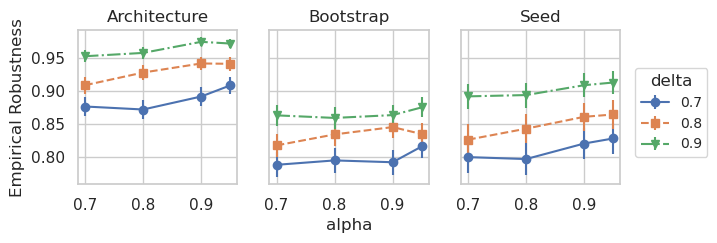

In [ ]:
experiments = conf_sweep_raw_df["experiment_type"].unique()

figwidth = 7
fig, axes = plt.subplots(
    ncols=len(experiments), figsize=(figwidth, 2), sharex=True, sharey=True
)

markers = ["o", "s", "v", "D"]
linestyles = ["-", "--", "-.", ":"]

for i, experiment in enumerate(experiments):
    ax = axes[i] if len(experiments) > 1 else axes

    tmp_conf_df = conf_sweep_raw_df.copy()
    tmp_conf_df = tmp_conf_df[tmp_conf_df["experiment_type"] == experiment]

    for j, delta in enumerate(tmp_conf_df["delta_robustness"].unique()):
        tmp_delta_df = tmp_conf_df[tmp_conf_df["delta_robustness"] == delta]
        # sns.lineplot(data=tmp_delta_df, x='beta_confidence', y='robust_counterfactual_validity_model2', ax=ax, label=f'delta={delta}')

        data = tmp_delta_df.groupby("beta_confidence")[
            "robust_counterfactual_validity_model2"
        ].mean()
        std = tmp_delta_df.groupby("beta_confidence")[
            "robust_counterfactual_validity_model2"
        ].std()
        cnt = tmp_delta_df.groupby("beta_confidence")[
            "robust_counterfactual_validity_model2"
        ].count()

        ax.errorbar(
            data.index,
            data,
            yerr=1.96 * std / np.sqrt(cnt),
            label=f"{delta}",
            marker=markers[j],
            linestyle=linestyles[j],
        )

    ax.set_title(experiment)
    if i == 1:
        ax.set_xlabel("alpha")
    if i == 0:
        ax.set_ylabel("Empirical Robustness")

plt.legend(
    title="delta", bbox_to_anchor=(1.05, 0.8), loc="upper left", ncol=1, fontsize=10
)

plt.savefig(
    f"{images_dir}/4_1_empirical_robustness_vs_beta_confidence_and_delta.png",
    dpi=300,
    bbox_inches="tight",
)

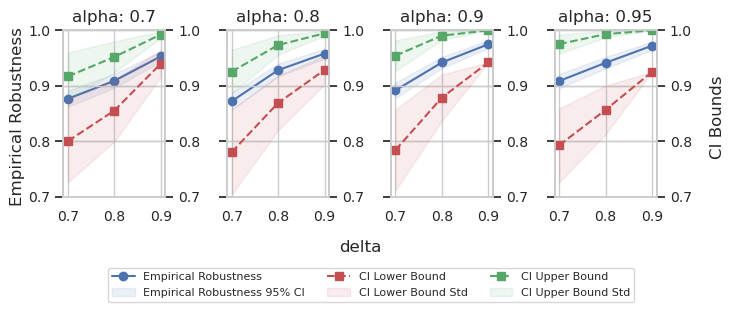

In [ ]:
# Use only matplotlib
# x-axis: delta_robsutness
# y-axis: empirical robustness
# twin y-axis: CI lower and upper bounds
# row: dataset
# col: experiment type

_tmp_df = conf_sweep_raw_df.copy()
_tmp_df = _tmp_df[_tmp_df["experiment_type"] == "Architecture"]
method = "GrowingSpheres"

conf = sorted(_tmp_df["beta_confidence"].unique().tolist())
delta_robustness = _tmp_df["delta_robustness"].unique().tolist()
delta_robustness.sort()
# Set fontsize to 11
plt.close()
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(7, 2.5), sharex=True, sharey=True)
axes = axes.flatten()


for i, c in enumerate(conf):
    _df = _tmp_df[(_tmp_df["beta_confidence"] == c)]

    data = _df.groupby("delta_robustness")[
        "robust_counterfactual_validity_model2"
    ].mean()
    ax = axes[i]
    ax.plot(
        delta_robustness,
        data,
        marker="o",
        linestyle="-",
        color="b",
        label="Empirical Robustness",
    )
    emprob_ci = (
        1.96
        * _df.groupby("delta_robustness")["robust_counterfactual_validity_model2"].std()
        / np.sqrt(
            _df.groupby("delta_robustness")[
                "robust_counterfactual_validity_model2"
            ].count()
        )
    )
    ax.fill_between(
        delta_robustness,
        data - emprob_ci,
        data + emprob_ci,
        color="b",
        alpha=0.1,
        label="Empirical Robustness 95% CI",
    )

    ax.set_title(f"alpha: {c}")

    data_lower = _df.groupby("delta_robustness")["lower_bound_beta"].mean()
    data_upper = _df.groupby("delta_robustness")["upper_bound_beta"].mean()

    ax2 = ax.twinx()

    ax2.plot(
        delta_robustness,
        data_lower,
        marker="s",
        linestyle="--",
        color="r",
        label="CI Lower Bound",
    )
    # add yerr for lower bound
    lb_std = _df.groupby("delta_robustness")["lower_bound_beta"].std()
    ax2.fill_between(
        delta_robustness,
        data_lower - lb_std,
        data_lower + lb_std,
        color="r",
        alpha=0.1,
        label="CI Lower Bound Std",
    )

    ax2.plot(
        delta_robustness,
        data_upper,
        marker="s",
        linestyle="--",
        color="g",
        label="CI Upper Bound",
    )
    # add yerr
    ub_std = _df.groupby("delta_robustness")["upper_bound_beta"].std()
    ax2.fill_between(
        delta_robustness,
        data_upper - ub_std,
        data_upper + ub_std,
        color="g",
        alpha=0.1,
        label="CI Upper Bound Std",
    )

    l = 0.7
    ax.set_ylim(l, 1)
    ax2.set_ylim(l, 1)
    ax.set_xticks([0.7, 0.8, 0.9])
    ax.set_yticks([0.7, 0.8, 0.9, 1])
    ax2.set_yticks([0.7, 0.8, 0.9, 1])

    # Decrease font size of the labels
    ax.tick_params(axis="both", which="major", labelsize=10)
    ax2.tick_params(axis="both", which="major", labelsize=10)

    # Turn off label ticks for ax2 on the plots that are not on the right
    if j != len(experiment_types) - 1:
        ax2.set_yticklabels([])

    handles, labels = ax.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()

    handles_combined = handles + handles2
    labels_combined = labels + labels2


# Add one xlabel for all the plots
fig.text(0.5, -0.04, "delta", ha="center")
fig.text(0.00, 0.5, "Empirical Robustness", va="center", rotation="vertical")
fig.text(1.0, 0.5, "CI Bounds", va="center", rotation="vertical")

fig.legend(
    bbox_to_anchor=(0.9, -0.08),
    handles=handles_combined,
    labels=labels_combined,
    ncol=3,
    fontsize=8,
)

plt.tight_layout()
plt.savefig(
    f"{images_dir}/4_1_empirical_robustness_ci_bounds_vs_confidence.png",
    dpi=300,
    bbox_inches="tight",
)

plt.show()


<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[4_2] Ablation (k)</div>

In [ ]:
k_sweep_results_path = results_path + "/k"
k_raw_df = process_results(k_sweep_results_path)

Reading results: 100%|██████████| 3/3 [00:03<00:00,  1.22s/it]


In [ ]:
k_raw_df["delta_robustness"].value_counts()

0.7    26263
0.8    26220
0.9    26220
Name: delta_robustness, dtype: int64

In [ ]:
k_raw_df["k_mlps_in_B"].value_counts()

8     16200
16    16200
24    10801
48    10800
40    10800
32    10800
56     3102
Name: k_mlps_in_B, dtype: int64

In [ ]:
# Drop where k=56 as this run crashed
k_raw_df = k_raw_df[k_raw_df["k_mlps_in_B"] != 56]

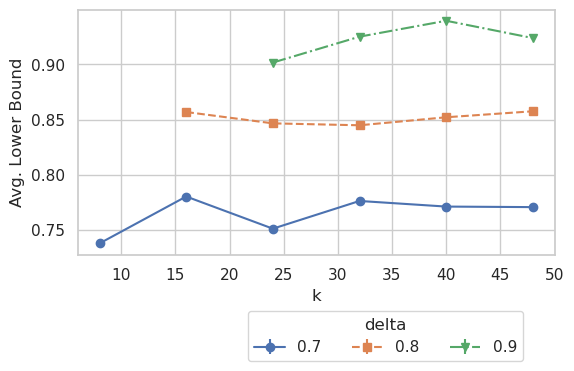

In [ ]:
fig, axes = plt.subplots(figsize=(6, 4))

markers = ["o", "s", "v"]
linestyles = ["-", "--", "-."]

for i, delta in enumerate(k_raw_df["delta_robustness"].unique()):
    _df = k_raw_df[k_raw_df["delta_robustness"] == delta]
    data = _df.groupby("k_mlps_in_B")["lower_bound_beta"].mean()
    std = _df.groupby("k_mlps_in_B")["lower_bound_beta"].std()
    cnt = _df.groupby("k_mlps_in_B")["lower_bound_beta"].count()

    axes.errorbar(
        data.index,
        data,
        yerr=1.96 * std / np.sqrt(cnt),
        label=f"{delta}",
        marker=markers[i],
        linestyle=linestyles[i],
    )

plt.legend(title="delta", bbox_to_anchor=(0.95, -0.2), ncol=5)
plt.xlabel("k")
plt.ylabel("Avg. Lower Bound")
plt.tight_layout()

plt.savefig(f"{images_dir}/4_2_lb_beta_vs_k_mlps.png", dpi=300, bbox_inches="tight")

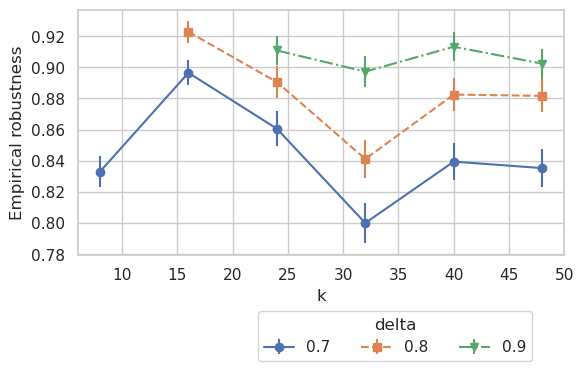

In [ ]:
fig, axes = plt.subplots(figsize=(6, 4))

markers = ["o", "s", "v"]
linestyles = ["-", "--", "-."]

for i, delta in enumerate(k_raw_df["delta_robustness"].unique()):
    _df = k_raw_df[k_raw_df["delta_robustness"] == delta]
    data = _df.groupby("k_mlps_in_B")["robust_counterfactual_validity_model2"].mean()
    std = _df.groupby("k_mlps_in_B")["robust_counterfactual_validity_model2"].std()
    cnt = _df.groupby("k_mlps_in_B")["robust_counterfactual_validity_model2"].count()

    axes.errorbar(
        data.index,
        data,
        yerr=1.96 * std / np.sqrt(cnt),
        label=f"{delta}",
        marker=markers[i],
        linestyle=linestyles[i],
    )

plt.legend(title="delta", bbox_to_anchor=(0.95, -0.2), ncol=5)
plt.xlabel("k")
plt.ylabel("Empirical robustness")
plt.tight_layout()

plt.savefig(f"{images_dir}/4_2_ER_vs_k_mlps.png", dpi=300, bbox_inches="tight")

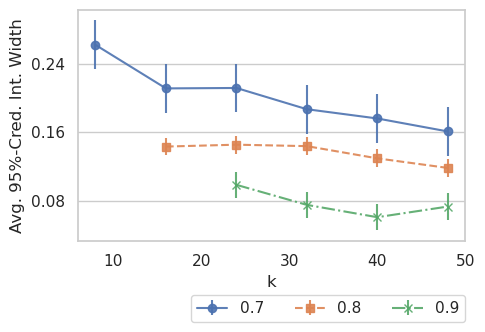

In [ ]:
from matplotlib.ticker import FormatStrFormatter

_tmp_df = k_raw_df.copy()
_tmp_df = _tmp_df[_tmp_df["experiment_type"] == "Architecture"]

fig, ax = plt.subplots(figsize=(5, 3))

_tmp_df["lb-ub"] = _tmp_df["upper_bound_beta"] - _tmp_df["lower_bound_beta"]
delts = _tmp_df["delta_robustness"].unique()
ks = sorted(_tmp_df["k_mlps_in_B"].unique())
av_ci_width = (
    _tmp_df.groupby(["k_mlps_in_B", "delta_robustness"])["lb-ub"].mean().reset_index()
)

markers = ["o", "s", "x", "d", "^"]
linestyles = ["-", "--", "-.", ":", "-"]

for i, delta in enumerate(delts):
    data = av_ci_width[av_ci_width["delta_robustness"] == delta]
    plt.errorbar(
        data["k_mlps_in_B"],
        data["lb-ub"],
        marker=markers[i],
        linestyle=linestyles[i],
        label=f"{delta}",
        yerr=1.96 * data["lb-ub"].std() / np.sqrt(data["lb-ub"].count()),
        alpha=0.9,
    )

# format y-axis to round to 2 decimal places
ax.yaxis.set_major_formatter(FormatStrFormatter("%.2f"))

# leave only 4 ticks on the y-axis
ax.yaxis.set_major_locator(plt.MaxNLocator(4))

# Remove vertical gridlines
ax.grid(axis="x")

plt.legend(bbox_to_anchor=(1.02, -0.2), ncol=5)
plt.xlabel("k")
plt.ylabel("Avg. 95%-Cred. Int. Width")
# plt.tight_layout()

plt.savefig(f"{images_dir}/4_2_ci_width_vs_k_mlps.png", dpi=300, bbox_inches="tight")

/tmp/ipykernel_110164/2229295343.py:109: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


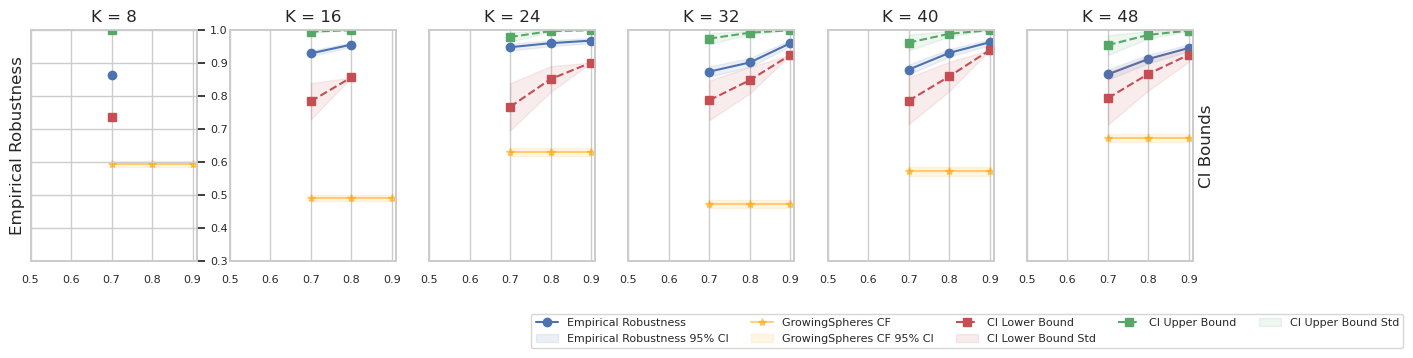

In [ ]:
# Use only matplotlib
# x-axis: delta_robsutness
# y-axis: empirical robustness
# twin y-axis: CI lower and upper bounds
# row: dataset
# col: experiment type

_tmp_df = k_raw_df.copy()
_tmp_df = _tmp_df[_tmp_df["experiment_type"] == "Architecture"]
method = "GrowingSpheres"

ks = sorted(_tmp_df["k_mlps_in_B"].unique().tolist())
delta_robustness = _tmp_df["delta_robustness"].unique().tolist()
delta_robustness.sort()
# Set fontsize to 11

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15, 3), sharex=True, sharey=True)
axes = axes.flatten()


for i, k in enumerate(ks):
    _df = _tmp_df[(_tmp_df["k_mlps_in_B"] == k)]

    data = _df.groupby("delta_robustness")[
        "robust_counterfactual_validity_model2"
    ].mean()
    ax = axes[i]
    ax.plot(
        delta_robustness,
        data,
        marker="o",
        linestyle="-",
        color="b",
        label="Empirical Robustness",
    )
    emprob_ci = (
        1.96
        * _df.groupby("delta_robustness")["robust_counterfactual_validity_model2"].std()
        / np.sqrt(
            _df.groupby("delta_robustness")[
                "robust_counterfactual_validity_model2"
            ].count()
        )
    )
    ax.fill_between(
        delta_robustness,
        data - emprob_ci,
        data + emprob_ci,
        color="b",
        alpha=0.1,
        label="Empirical Robustness 95% CI",
    )

    ax.set_title(f"K = {k}")

    if i == 0:
        ax.set_ylabel("Empirical Robustness")

    data_lower = _df.groupby("delta_robustness")["lower_bound_beta"].mean()
    data_upper = _df.groupby("delta_robustness")["upper_bound_beta"].mean()

    ax2 = ax.twinx()

    ax2.plot(
        delta_robustness,
        data_lower,
        marker="s",
        linestyle="--",
        color="r",
        label="CI Lower Bound",
    )
    # add yerr for lower bound
    lb_std = _df.groupby("delta_robustness")["lower_bound_beta"].std()
    ax2.fill_between(
        delta_robustness,
        data_lower - lb_std,
        data_lower + lb_std,
        color="r",
        alpha=0.1,
        label="CI Lower Bound Std",
    )

    ax2.plot(
        delta_robustness,
        data_upper,
        marker="s",
        linestyle="--",
        color="g",
        label="CI Upper Bound",
    )
    # add yerr
    ub_std = _df.groupby("delta_robustness")["upper_bound_beta"].std()
    ax2.fill_between(
        delta_robustness,
        data_upper - ub_std,
        data_upper + ub_std,
        color="g",
        alpha=0.1,
        label="CI Upper Bound Std",
    )

    if i == len(ks) - 1:
        ax2.set_ylabel("CI Bounds")

    # Plot baseline
    for m, color in zip(["GrowingSpheres"], ["orange"]):
        __df = _df[_df["base_cf_method"] == m]
        base = __df["base_counterfactual_validity_model2"].mean()
        base_std = __df["base_counterfactual_validity_model2"].std()
        base_ci = (
            1.96
            * base_std
            / np.sqrt(__df["base_counterfactual_validity_model2"].count())
        )
        ax.plot(
            delta_robustness,
            [base] * len(delta_robustness),
            color=color,
            linestyle="-",
            label=f"{m} CF",
            marker="*",
            alpha=0.5,
        )
        ax.fill_between(
            delta_robustness,
            base - base_ci,
            base + base_ci,
            color=color,
            alpha=0.1,
            label=f"{m} CF 95% CI",
        )

    l = 0.3
    ax.set_ylim(l, 1)
    ax2.set_ylim(l, 1)
    ax.set_xticks([0.5, 0.6, 0.7, 0.8, 0.9])
    # Make x-axis labels more coarse i.e. only show rounded to tenths

    # ax_lim = ax.get_xlim()
    # ax.set_xticks(np.arange(ax_lim[0], ax_lim[1], 0.1).round(1))

    if i == 4:
        ax_legend_handles, ax_legend_labels = ax.get_legend_handles_labels()
        ax2_legend_handles, ax2_legend_labels = ax2.get_legend_handles_labels()

        ax.legend(
            ax_legend_handles + ax2_legend_handles,
            ax_legend_labels + ax2_legend_labels,
            ncol=5,
            loc="lower right",
            bbox_to_anchor=(3.5, -0.4),
            fontsize=8,
        )

    # Decrease font size of the labels
    ax.tick_params(axis="both", which="major", labelsize=8)
    ax2.tick_params(axis="both", which="major", labelsize=8)

    # Turn off label ticks for ax2 on the plots that are not on the right

    if i != 0:
        ax2.set_yticklabels([])
        ax2.set_yticks([])
        ax.set_yticks([])
        ax.set_yticklabels([])


dataset = _tmp_df["dataset_name"].unique()[0]
experiment_type = _tmp_df["experiment_type"].unique()[0]
# plt.suptitle(f'Empirical Robustness vs K MLPs in B (Dataset: {dataset}, Experiment Type: {experiment_type})')
plt.savefig(
    f"{images_dir}/4_2_empirical_robustness_ci_bounds_vs_k.png",
    dpi=300,
    bbox_inches="tight",
)

plt.tight_layout()
plt.show()


<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[4_3] Ablation (generalizations)</div>

In [ ]:
generalization_results_path = results_path + "/generalization"
gen_raw_df = process_results(generalization_results_path)

Reading results: 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]


In [ ]:
gen_raw_df["experiment_type"].value_counts()

Architecture    10301
Name: experiment_type, dtype: int64

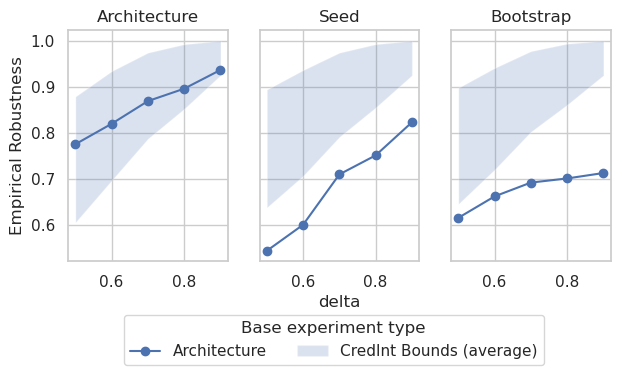

In [ ]:
generalizations = gen_raw_df["experiment_generalization_type"].unique()
experiments = gen_raw_df["experiment_type"].unique()

fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(7, 3), sharex=True, sharey=True)
axes = axes.flatten()
for i, gen in enumerate(generalizations):
    for j, experiment in enumerate(experiments):
        tmp_gen_df = gen_raw_df.copy()
        tmp_gen_df = tmp_gen_df[
            (tmp_gen_df["experiment_type"] == experiment)
            & (tmp_gen_df["experiment_generalization_type"] == gen)
        ]

        lbs = tmp_gen_df["lower_bound_beta"]
        ubs = tmp_gen_df["upper_bound_beta"]

        tmp_grp = tmp_gen_df.groupby("delta_robustness")[
            "robust_counterfactual_validity_model2"
        ].mean()

        axes[i].plot(
            tmp_grp.index, tmp_grp, marker="o", linestyle="-", label=experiment
        )

        tmp_grp_lower = tmp_gen_df.groupby("delta_robustness")[
            "lower_bound_beta"
        ].mean()
        tmp_grp_upper = tmp_gen_df.groupby("delta_robustness")[
            "upper_bound_beta"
        ].mean()

        axes[i].fill_between(
            tmp_grp.index,
            tmp_grp_lower,
            tmp_grp_upper,
            alpha=0.2,
            label="CredInt Bounds (average)",
        )

        axes[i].set_title(gen)
        if i == 1:
            axes[i].set_xlabel("delta")

        if i == 0:
            axes[i].set_ylabel("Empirical Robustness")

        if i == 1:
            axes[i].legend(
                title="Base experiment type",
                loc="upper left",
                ncol=2,
                bbox_to_anchor=(-0.9, -0.2),
            )


# plt.tight_layout()

plt.savefig(
    f"{images_dir}/4_3_empirical_robustness_vs_delta_generalization.png",
    dpi=300,
    bbox_inches="tight",
)

<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[5] Time</div>

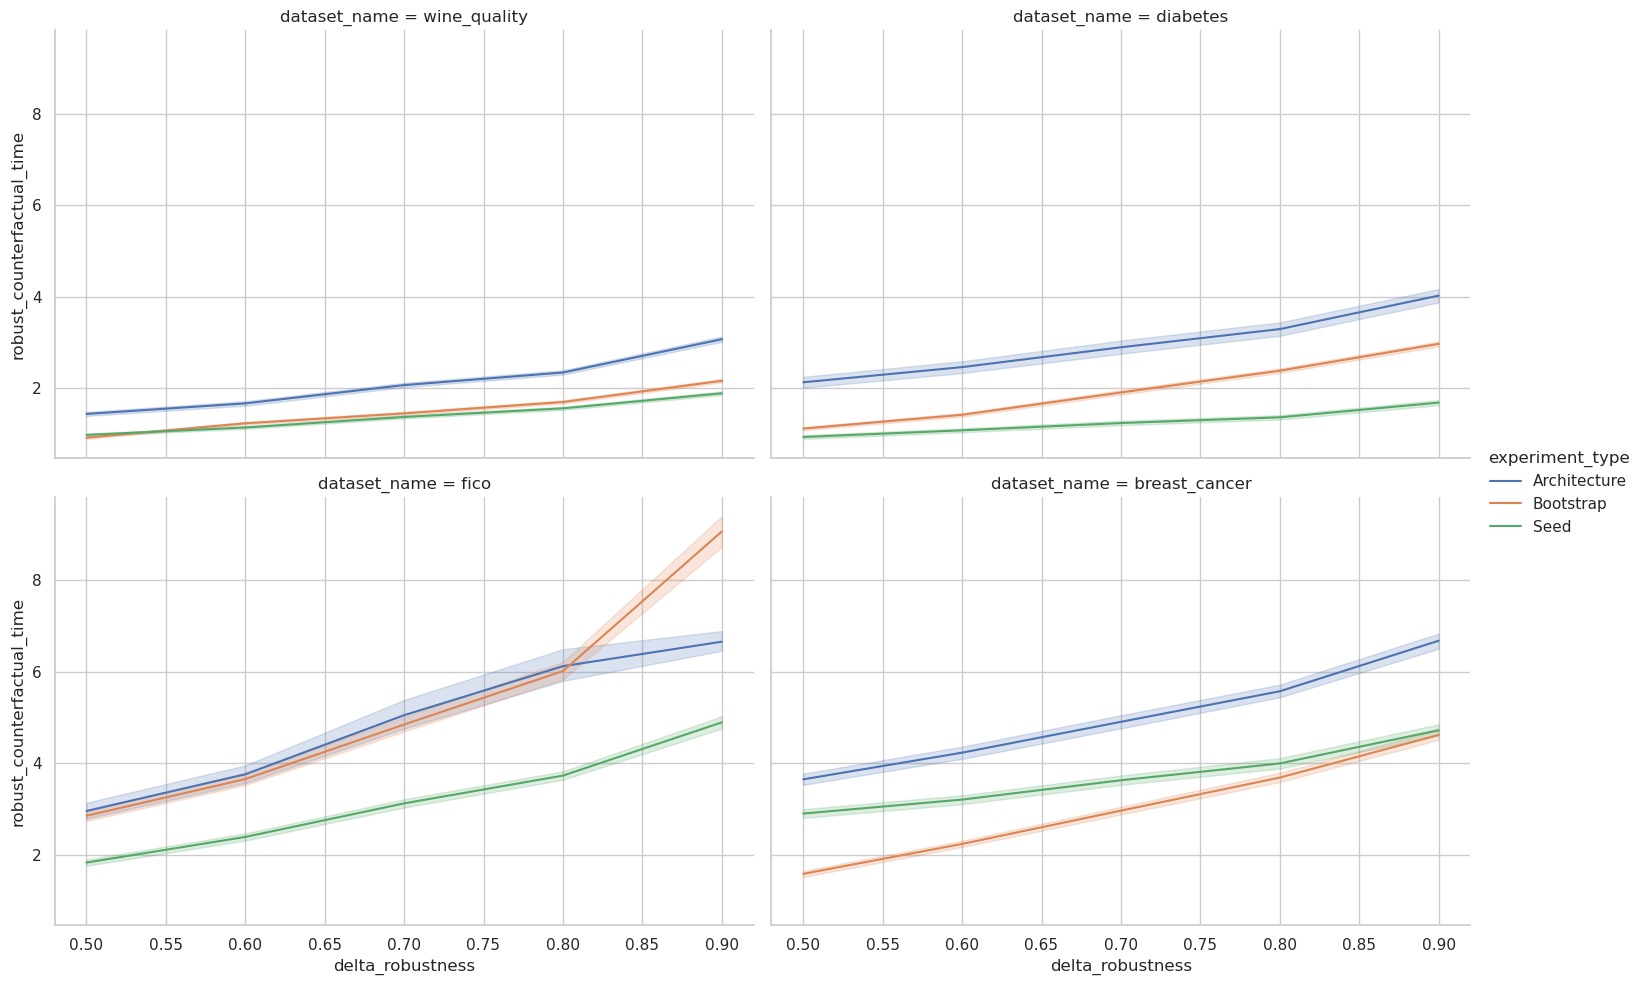

In [ ]:
sns.relplot(
    data=nn_gs_df,
    x="delta_robustness",
    y="robust_counterfactual_time",
    hue="experiment_type",
    col="dataset_name",
    kind="line",
    height=5,
    aspect=1.5,
    col_wrap=2,
)
# plt.xlabel('Delta Robustness')
# plt.ylabel('Robust CF generation time (s)')
plt.savefig(
    f"{images_dir}/5_1_robust_cf_generation_time_delta.png",
    dpi=300,
    bbox_inches="tight",
)

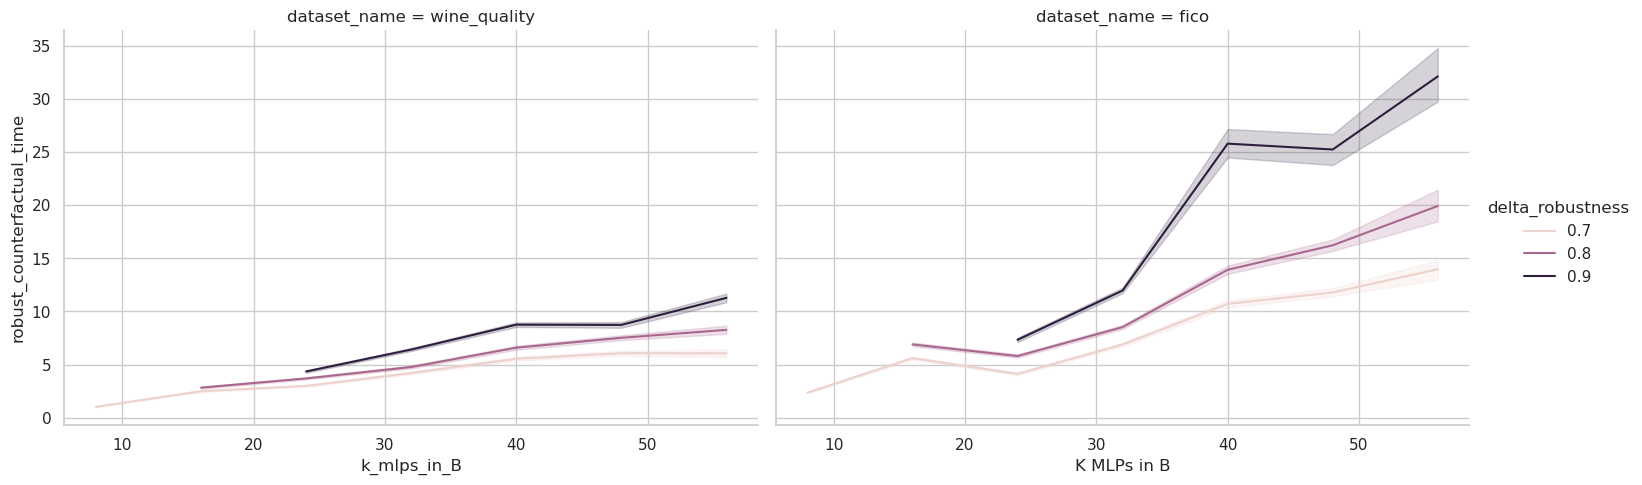

In [ ]:
sns.relplot(
    data=k_raw_df,
    x="k_mlps_in_B",
    y="robust_counterfactual_time",
    hue="delta_robustness",
    col="dataset_name",
    kind="line",
    height=5,
    aspect=1.5,
)
plt.xlabel("K MLPs in B")
plt.ylabel("Robust CF generation time (s)")
plt.savefig(
    f"{images_dir}/5_2_robust_cf_generation_time_k.png", dpi=300, bbox_inches="tight"
)

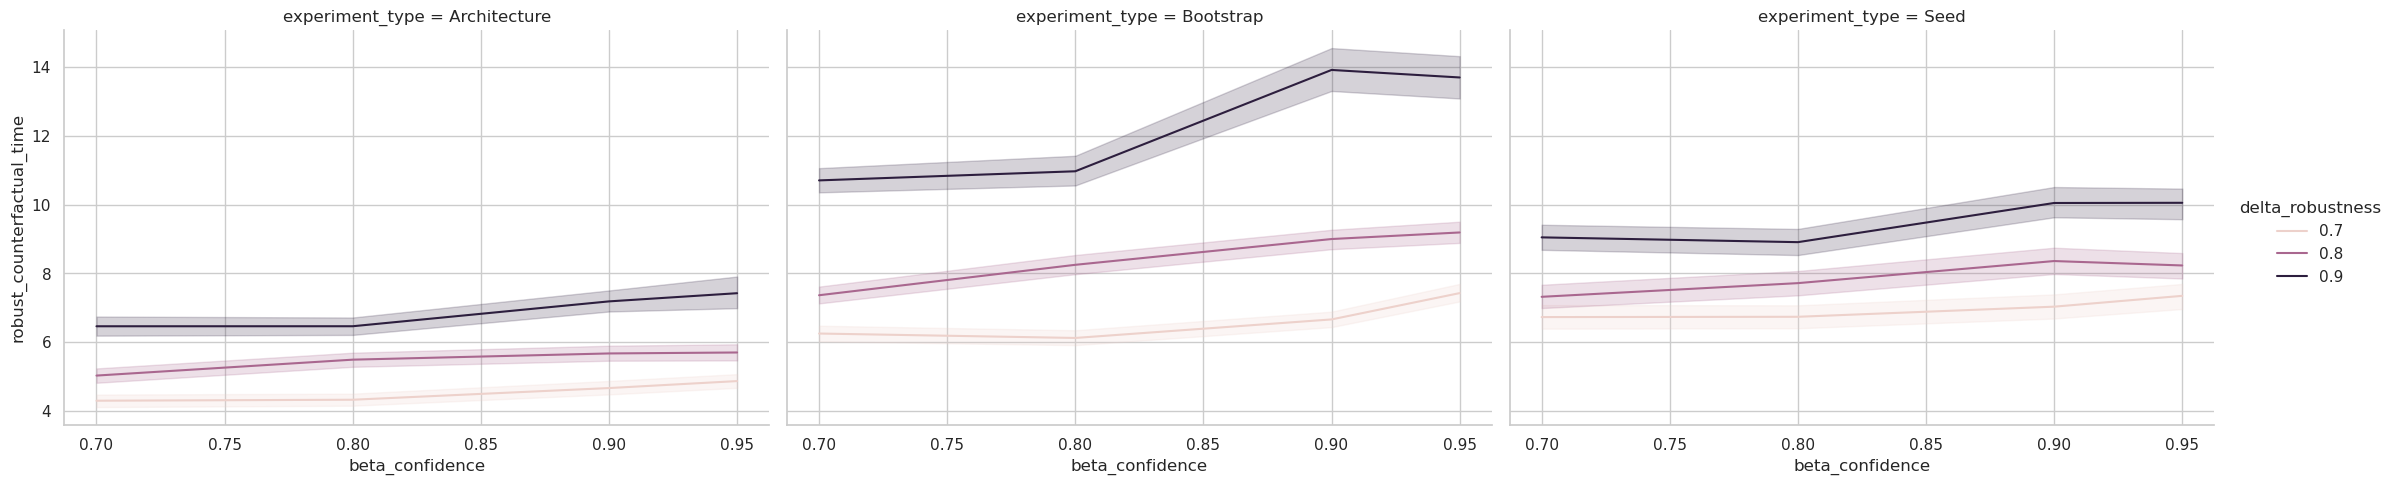

In [ ]:
sns.relplot(
    data=conf_sweep_raw_df,
    x="beta_confidence",
    y="robust_counterfactual_time",
    hue="delta_robustness",
    col="experiment_type",
    kind="line",
    height=5,
    aspect=1.5,
)
plt.savefig(
    f"{images_dir}/5_3_robust_cf_generation_time_beta_confidence.png",
    dpi=300,
    bbox_inches="tight",
)

In [ ]:
# Create a scatterplot time vs empirical robustness
cutoff_up = 0.8
cutoff_low = 0.2
exp = "Seed"

# Print average time for each experiment type
print("BetaROB Time")
tmp_beta = raw_df[raw_df["experiment_type"] == exp]
quantile80 = tmp_beta["robust_counterfactual_time"].quantile(cutoff_up)
quantile20 = tmp_beta["robust_counterfactual_time"].quantile(cutoff_low)
tmp_beta = tmp_beta[tmp_beta["robust_counterfactual_time"] < quantile80]
tmp_beta = tmp_beta[tmp_beta["robust_counterfactual_time"] > quantile20]
print(
    tmp_beta.groupby(["experiment_type", "dataset_name"])["robust_counterfactual_time"]
    .mean()
    .sort_index()
)

print("RobX Time")
tmp_robx = robx_raw_df[robx_raw_df["experiment_type"] == exp]
quantile80 = tmp_robx["robust_counterfactual_time"].quantile(cutoff_up)
quantile20 = tmp_robx["robust_counterfactual_time"].quantile(cutoff_low)
tmp_robx = tmp_robx[tmp_robx["robust_counterfactual_time"] < quantile80]
tmp_robx = tmp_robx[tmp_robx["robust_counterfactual_time"] > quantile20]
print(
    tmp_robx.groupby(["experiment_type", "dataset_name"])["robust_counterfactual_time"]
    .mean()
    .sort_index()
)

print("Base CF Time")
tmp_base = raw_df[raw_df["experiment_type"] == exp]
quntile80 = tmp_base["base_counterfactual_time"].quantile(cutoff_up)
quantile20 = tmp_base["base_counterfactual_time"].quantile(cutoff_low)
tmp_base = tmp_base[tmp_base["base_counterfactual_time"] < quantile80]
tmp_base = tmp_base[tmp_base["base_counterfactual_time"] > quantile20]
print(
    tmp_base.groupby(["experiment_type", "dataset_name"])["base_counterfactual_time"]
    .mean()
    .sort_index()
)

BetaROB Time
experiment_type  dataset_name 
Seed             breast_cancer    2.178209
                 diabetes         1.307726
                 fico             2.222163
                 wine_quality     1.326638
Name: robust_counterfactual_time, dtype: float64
RobX Time
experiment_type  dataset_name 
Seed             breast_cancer    0.572322
                 diabetes         0.278550
                 fico             0.740911
                 wine_quality     0.646489
Name: robust_counterfactual_time, dtype: float64
Base CF Time
experiment_type  dataset_name 
Seed             breast_cancer    0.099611
                 diabetes         0.047365
                 fico             0.077116
                 wine_quality     0.082889
Name: base_counterfactual_time, dtype: float64


In [ ]:
columns_to_keep = [
    # 'dataset_name',
    # 'experiment_type',
    # 'method_name',
    # 'base_counterfactual_validity_model2',
    # 'base_counterfactual_L1_distance_from_base_cf',
    "base_counterfactual_proximityL1",
    "base_counterfactual_proximityL2",
    "base_counterfactual_plausibility",
    "base_counterfactual_discriminative_power",
    "base_counterfactual_time",
]

grpd = supp_df.groupby(["base_cf_method", "dataset_name", "experiment_type"])[
    "base_counterfactual_validity_model2"
].mean()
# grpd.columns = ['Robustness', 'Prox L1', 'Prox L2', 'Plausibility', 'Discriminative Power', 'Time']
grpd.round(3)

base_cf_method  dataset_name  experiment_type
FACE            diabetes      Architecture       0.819
                              Bootstrap          0.744
                              Seed               0.677
                fico          Architecture       0.717
                              Bootstrap          0.681
                              Seed               0.687
RBR             diabetes      Architecture       0.566
                              Bootstrap          0.541
                              Seed               0.558
                fico          Architecture       0.707
                              Bootstrap          0.600
                              Seed               0.580
ROAR            diabetes      Architecture       0.264
                              Bootstrap          0.266
                              Seed               0.243
                fico          Architecture       0.026
                              Bootstrap          0.160
                   

In [ ]:
grpd = supp_df.groupby(["base_cf_method", "dataset_name"])[columns_to_keep].mean()
grpd.columns = ["Prox L1", "Prox L2", "Plausibility", "Discriminative Power", "Time"]
grpd.round(3)

Prox L1  Prox L2  Plausibility  \
base_cf_method dataset_name                                   
FACE           diabetes        0.802    0.371         0.250   
               fico            2.112    0.626         0.446   
RBR            diabetes        0.728    0.341         0.326   
               fico            1.640    0.490         0.469   
ROAR           diabetes        0.852    0.345         0.491   
               fico            0.229    0.049         0.512   

                             Discriminative Power   Time  
base_cf_method dataset_name                               
FACE           diabetes                     0.536  0.050  
               fico                         0.487  0.108  
RBR            diabetes                     0.597  0.275  
               fico                         0.490  0.232  
ROAR           diabetes                     0.785  0.036  
               fico                         0.670  0.025